<img src="banner.jpg" width=100%>

Welcome to the Midterm Project! Projects in DSC 10 are similar in format to homeworks, but are different in a few key ways. First, a project is comprehensive, meaning that it draws upon everything we've learned this quarter so far. Second, since problems can vary quite a bit in difficulty, some problems will be worth more points than others. Finally, in a project, the problems are more open-ended; they will usually ask for some result, but won't tell you what method should be used to get it. There might be several equally-valid approaches, and several steps might be necessary. This is closer to how data science is done in "real life."

It is important that you **start early** on the project! It will take the place of a homework in the week that it is due, but you should also expect it to take longer than a homework. You are especially encouraged to **find a partner** to work through the project with. If you work in a pair, you must follow the [Project Partner Guidelines](https://dsc10.com/project-partners/) on the course website. In particular, you must work together at the same time, and you are not allowed to split up the project and each work on certain problems. If you work with a partner, only one of you needs to upload your notebook to Gradescope; after uploading, you'll see an option to add the other partner to the submission.

**Important:** The `otter` tests don't usually tell you that your answer is correct. More often, they help catch basic mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged.

**Avoid looping through DataFrames unless instructed to do so. Do not import any packages.** Loops in Python are slow, and looping through DataFrames should usually be avoided in favor of the DataFrame methods we've learned in class, which are much faster. Please do not import any additional packages – you don't need them, and our autograder may not be able to run your code if you do.

As you work through this project, there are a few resources you may want to have open:
- [DSC 10 Reference Sheet](https://drive.google.com/file/d/1ky0Np67HS2O4LO913P-ing97SJG0j27n/view)
- [`babypandas` notes](https://notes.dsc10.com/front.html)
- [`babypandas` documentation](https://babypandas.readthedocs.io/en/latest/)
- Other links in the [Resources](https://dsc10.com/resources/) and [Debugging](https://dsc10.com/debugging/) tabs of the course website

Start early, good luck, and let's begin! 🏃

In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import numpy as np
import numbers
from IPython.display import HTML, display, IFrame, YouTubeVideo, Markdown, clear_output
import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import otter 
# grader = otter.Notebook()

import warnings
warnings.simplefilter('ignore')

def play_spotify(uri):
    code = uri[uri.rfind(':')+1:]
    src = f"https://open.spotify.com/embed/track/{code}"
    width = 400
    height = 75
    display(IFrame(src, width, height))

<a name='outline'></a>

### Outline 

The project is divided into seven sections, each of which contains several questions. Use the outline below to help you quickly navigate to the part of the project you're working on. Questions are worth one point each, unless they contain a ⭐️⭐️ next to them, in which case they are worth two points (e.g. **Question 1.3. ⭐️⭐️**). You can expect questions worth two points to be longer and more challenging than questions worth one point.

- [The Data 🎧](#thedata)
-  [Section 1: What's a Song? 🤔](#section1)  
-  [Section 2: The Sound of Music 🎶](#section2) 
-  [Section 3: Slow and Steady 🐢🐇](#section3)  
-  [Section 4: Crazy in Love 💕](#section4)  
-  [Section 5: The Test of Time ⌛️](#section5)  
-  [Section 6: Party in the USA 🎉](#section6) 
-  [Section 7: Encore 🔂](#section7)

There's also an [Emoji Quiz 💯](#emojiquiz) at the end of the project, just for fun. Try to identify songs and artists based on emoji descriptions, and see how many you can get!

<a name='thedata'></a>

## The Data 🎧

[Spotify](https://spotify.com), the world's popular music streaming service ([source](https://www.businessofapps.com/data/music-streaming-market/)), is known for keeping close tabs on what its subscribers listen to. They maintain an analytics site, called [Spotify Charts](https://charts.spotify.com), where they post the daily and weekly top 200 songs on Spotify in various countries and cities. 

In this project, we will work with a dataset containing **the top 200 songs on Spotify each week, from the week of February 4th, 2021 through the week of July 14th, 2022, in each of the United States, Canada, and Mexico**. A song is in the top 200 for a given week and country if it is one of the 200 most streamed songs during that week in that country.

Run the cell below to load in the dataset and save it to a DataFrame named `charts`.

In [2]:
charts = bpd.read_csv('weekly_charts.csv')
charts

week  rank              track_name  \
0      2021-02-04     1         drivers license   
1      2021-02-04     2               Good Days   
2      2021-02-04     3         Save Your Tears   
3      2021-02-04     4  Mood (feat. iann dior)   
4      2021-02-04     4  Mood (feat. iann dior)   
...           ...   ...                     ...   
70178  2022-07-14   196       Get Into It (Yuh)   
70179  2022-07-14   197              Fancy Like   
70180  2022-07-14   198            Stick Season   
70181  2022-07-14   199        Call Out My Name   
70182  2022-07-14   200               Good Days   

                                        uri release_date  streams  \
0      spotify:track:7lPN2DXiMsVn7XUKtOW1CS   2021-01-08  2054319   
1      spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   916516   
2      spotify:track:5QO79kh1waicV47BqGRL3g   2020-03-20   866067   
3      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
4      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
...                                     ...          ...      ...   
70178  spotify:track:0W6I02J9xcqK8MtSeosEXb   2021-06-25  1592100   
70179  spotify:track:58UKC45GPNTflCN6nwCUeF   2022-01-21  1590126   
70180  spotify:track:0GNVXNz7Jkicfk2mp5OyG5   2022-07-08  1583302   
70181  spotify:track:09mEdoA6zrmBPgTEN5qXmN   2018-03-30  1583235   
70182  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25  1579212   

              artist_names artist_individual  \
0           Olivia Rodrigo    Olivia Rodrigo   
1                      SZA               SZA   
2               The Weeknd        The Weeknd   
3      24kGoldn, iann dior          24kGoldn   
4      24kGoldn, iann dior         iann dior   
...                    ...               ...   
70178             Doja Cat          Doja Cat   
70179         Walker Hayes      Walker Hayes   
70180           Noah Kahan        Noah Kahan   
70181           The Weeknd        The Weeknd   
70182                  SZA               SZA   

                                   artist_id               artist_genre  ...  \
0      spotify:artist:1McMsnEElThX1knmY4oliG                        pop  ...   
1      spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   
2      spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
3      spotify:artist:6fWVd57NKTalqvmjRd2t8Z                   cali rap  ...   
4      spotify:artist:6ASri4ePR7RlsvIQgWPJpS                melodic rap  ...   
...                                      ...                        ...  ...   
70178  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                  dance pop  ...   
70179  spotify:artist:7sKxqpSqbIzphAKAhrqvlf        modern country rock  ...   
70180  spotify:artist:2RQXRUsr4IW1f3mKyKsy4B                        pop  ...   
70181  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
70182  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0        1    -8.761       0.0601        0.7210          0.000013    0.1050   
1        0    -8.370       0.0583        0.4990          0.000008    0.6880   
2        1    -5.487       0.0309        0.0212          0.000012    0.5430   
3        0    -3.558       0.0369        0.2210          0.000000    0.2720   
4        0    -3.558       0.0369        0.2210          0.000000    0.2720   
...    ...       ...          ...           ...               ...       ...   
70178    0    -6.029       0.1620        0.3150          0.000034    0.0894   
70179    1    -6.459       0.0600        0.1110          0.000000    0.3150   
70180    1    -6.935       0.0651        0.7990          0.000000    0.0966   
70181    1    -4.954       0.0356        0.1700          0.000000    0.3070   
70182    0    -8.370       0.0583        0.4990          0.000008    0.6880   

       valence    tempo  duration        country  
0        0.132  143.874    242014

`charts` has 24 columns.

In [3]:
charts.columns

Index(['week', 'rank', 'track_name', 'uri', 'release_date', 'streams',
       'artist_names', 'artist_individual', 'artist_id', 'artist_genre',
       'artist_img', 'danceability', 'energy', 'key', 'mode', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'country'],
      dtype='object')

Below, we describe some of the columns of `charts`.

| Column | Description |
|:---|:---|
| `'week'` | Week during which the song was in the top 200. |
| `'rank'` | The position of the song in the top 200, in the specified country. |
| `'track_name'` | The name of the song. |
| `'uri'` | The song's uniform resource indicator. This is an identfier that can be used to play the song on Spotify. |
| `'release_date'` | The date on which the song was released. |
| `'streams'` | The number of streams that the song received during the specified week in the specified country. |
| `'artist_names'` | All artists on the song. |
| `'artist_individual'` | One of the artists on the song. (If there are $n$ artists on the song, the song appears in $n$ rows of `charts` for each week and country it was in the top 200, once for each artist.) |
| `'artist_id'` | The individual artist's uniform resource indicator. |
| `'artist_genre'` | The individual artist's primary genre. |
| `'artist_img'` | A URL to the image of the individual artist. |
| `'duration'` | The length of the song, in milliseconds. |
| `'country'` | The country in which the song was in the top 200 in the specified week. | 

There are several columns – namely, `'danceability'`, `'energy'`, `'key'`, `'mode'`, `'loudness'`, `'speechiness'`, `'acousticness'`, `'instrumentalness'`, `'liveness'`, `'valence'`, and `'tempo'` – that we didn't describe above. These are all _audio features_, meaning they describe the musical content of songs, as opposed to the other columns, which describe metadata. Spotify provides [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) that describes what each audio feature means. We'll provide you a link to this documentation again right before Section 2, when you'll actually start using these columns.

As the table above mentions, we can use a song's `'uri'` to play it on Spotify. We've provided you with a function named `play_spotify` that takes in a `'uri'` and plays the song in your notebook. Run the cell below to see it in action!

In [4]:
# URI for Taylor Swift's "The Tortured Poets Department"
play_spotify('5jZhbVyA4j9MzLrBYKs35Z')

<a id='section1'></a>
## Section 1: What's a Song? 🤔

<small>(<a href="#outline">return to the outline</a>)</small>

Let's look at the first and last few rows of `charts` once again.

In [5]:
charts

week  rank              track_name  \
0      2021-02-04     1         drivers license   
1      2021-02-04     2               Good Days   
2      2021-02-04     3         Save Your Tears   
3      2021-02-04     4  Mood (feat. iann dior)   
4      2021-02-04     4  Mood (feat. iann dior)   
...           ...   ...                     ...   
70178  2022-07-14   196       Get Into It (Yuh)   
70179  2022-07-14   197              Fancy Like   
70180  2022-07-14   198            Stick Season   
70181  2022-07-14   199        Call Out My Name   
70182  2022-07-14   200               Good Days   

                                        uri release_date  streams  \
0      spotify:track:7lPN2DXiMsVn7XUKtOW1CS   2021-01-08  2054319   
1      spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   916516   
2      spotify:track:5QO79kh1waicV47BqGRL3g   2020-03-20   866067   
3      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
4      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
...                                     ...          ...      ...   
70178  spotify:track:0W6I02J9xcqK8MtSeosEXb   2021-06-25  1592100   
70179  spotify:track:58UKC45GPNTflCN6nwCUeF   2022-01-21  1590126   
70180  spotify:track:0GNVXNz7Jkicfk2mp5OyG5   2022-07-08  1583302   
70181  spotify:track:09mEdoA6zrmBPgTEN5qXmN   2018-03-30  1583235   
70182  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25  1579212   

              artist_names artist_individual  \
0           Olivia Rodrigo    Olivia Rodrigo   
1                      SZA               SZA   
2               The Weeknd        The Weeknd   
3      24kGoldn, iann dior          24kGoldn   
4      24kGoldn, iann dior         iann dior   
...                    ...               ...   
70178             Doja Cat          Doja Cat   
70179         Walker Hayes      Walker Hayes   
70180           Noah Kahan        Noah Kahan   
70181           The Weeknd        The Weeknd   
70182                  SZA               SZA   

                                   artist_id               artist_genre  ...  \
0      spotify:artist:1McMsnEElThX1knmY4oliG                        pop  ...   
1      spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   
2      spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
3      spotify:artist:6fWVd57NKTalqvmjRd2t8Z                   cali rap  ...   
4      spotify:artist:6ASri4ePR7RlsvIQgWPJpS                melodic rap  ...   
...                                      ...                        ...  ...   
70178  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                  dance pop  ...   
70179  spotify:artist:7sKxqpSqbIzphAKAhrqvlf        modern country rock  ...   
70180  spotify:artist:2RQXRUsr4IW1f3mKyKsy4B                        pop  ...   
70181  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
70182  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0        1    -8.761       0.0601        0.7210          0.000013    0.1050   
1        0    -8.370       0.0583        0.4990          0.000008    0.6880   
2        1    -5.487       0.0309        0.0212          0.000012    0.5430   
3        0    -3.558       0.0369        0.2210          0.000000    0.2720   
4        0    -3.558       0.0369        0.2210          0.000000    0.2720   
...    ...       ...          ...           ...               ...       ...   
70178    0    -6.029       0.1620        0.3150          0.000034    0.0894   
70179    1    -6.459       0.0600        0.1110          0.000000    0.3150   
70180    1    -6.935       0.0651        0.7990          0.000000    0.0966   
70181    1    -4.954       0.0356        0.1700          0.000000    0.3070   
70182    0    -8.370       0.0583        0.4990          0.000008    0.6880   

       valence    tempo  duration        country  
0        0.132  143.874    242014

You may notice that some songs, like `'Mood (feat. iaan dior)'`, appear multiple times. This happens for a few reasons. For one, songs that appear on the top 200 for multiple weeks will have separate rows for each week. Furthermore, for each week that a song appears on the top 200, there will be a separate row for each artist included on that song. Notice that the `'artist_names'` column has **all** artists that collaborated on a song, and the `'artist_individual'` has just one. In addition, `charts` contains the top 200 for each week for each of the United States, Canada, and Mexico. There could be other reasons why a song might appear in multiple rows of `charts`, as well.

In this first section of the project, we'll work towards understanding which rows of `charts` actually correspond to the same song.

**Question 1.1.** For now, we'll think of a song as being defined by its `'uri'`. How many distinct `'uri'`s actually appear in this dataset? Store your answer in a variable called ```unique_uris```.

In [6]:
unique_uris = len(charts.get('uri').unique())#.count()
unique_uris

2850

Although the dataset has over 70,000 rows, it contains far fewer songs.

It turns out that `'uri'` is not actually a unique indicator for each song. One song may appear on Spotify under various `'uri'`s if there are different versions of the song, such as an explicit version and a "clean" version, or a remix. Similarly, sometimes a song is released as a single, then as part of an album, and maybe years later as part of a "best-of" compilation album. 

**Question 1.2.** To illustrate this, let's look at the track named `'Astronaut In The Ocean'` by `'Masked Wolf'`. (You may be familiar with this song from TikTok – it starts with "What you know about rollin' down in the deep?") 

Set `astronaut_ocean_uris` to an array of all the unique `'uri'`s associated with the `'track_name'` `'Astronaut In The Ocean'`.

In [7]:
astronaut_ocean_df = charts[charts.get('track_name') == 'Astronaut In The Ocean']
astronaut_ocean_df

week  rank              track_name  \
161    2021-02-04   107  Astronaut In The Ocean   
343    2021-02-11    34  Astronaut In The Ocean   
610    2021-02-18    18  Astronaut In The Ocean   
892    2021-02-25    11  Astronaut In The Ocean   
1177   2021-03-04     4  Astronaut In The Ocean   
...           ...   ...                     ...   
59452  2021-10-28   160  Astronaut In The Ocean   
59776  2021-11-04   179  Astronaut In The Ocean   
60103  2021-11-11   199  Astronaut In The Ocean   
61237  2021-12-09   185  Astronaut In The Ocean   
62379  2022-01-06   194  Astronaut In The Ocean   

                                        uri release_date  streams  \
161    spotify:track:3Ofmpyhv5UAQ70mENzB277   2021-01-06   266994   
343    spotify:track:3Ofmpyhv5UAQ70mENzB277   2021-01-06   423362   
610    spotify:track:3VT8hOC5vuDXBsHrR53WFh   2019-06-07   549254   
892    spotify:track:3VT8hOC5vuDXBsHrR53WFh   2019-06-07   704538   
1177   spotify:track:3VT8hOC5vuDXBsHrR53WFh   2019-06-07   834765   
...                                     ...          ...      ...   
59452  spotify:track:6E90gq0KO6FYZVOXx8kCcC   2021-09-10  1561850   
59776  spotify:track:6E90gq0KO6FYZVOXx8kCcC   2021-09-10  1515072   
60103  spotify:track:6E90gq0KO6FYZVOXx8kCcC   2021-09-10  1489911   
61237  spotify:track:6E90gq0KO6FYZVOXx8kCcC   2021-09-10  1710003   
62379  spotify:track:6E90gq0KO6FYZVOXx8kCcC   2021-09-10  1374206   

      artist_names artist_individual                              artist_id  \
161    Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   
343    Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   
610    Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   
892    Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   
1177   Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   
...            ...               ...                                    ...   
59452  Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   
59776  Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   
60103  Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   
61237  Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   
62379  Masked Wolf       Masked Wolf  spotify:artist:1uU7g3DNSbsu0QjSEqZtEd   

             artist_genre  ... mode  loudness  speechiness  acousticness  \
161    australian hip hop  ...    0    -6.865       0.0913         0.175   
343    australian hip hop  ...    0    -6.865       0.0913         0.175   
610    australian hip hop  ...    0    -6.865       0.0913         0.175   
892    australian hip hop  ...    0    -6.865       0.0913         0.175   
1177   australian hip hop  ...    0    -6.865       0.0913         0.175   
...                   ...  ...  ...       ...          ...           ...   
59452  australian hip hop  ...    0    -6.865       0.0913         0.175   
59776  australian hip hop  ...    0    -6.865       0.0913         0.175   
60103  australian hip hop  ...    0    -6.865       0.0913         0.175   
61237  australian hip hop  ...    0    -6.865       0.0913         0.175   
62379  australian hip hop  ...    0    -6.865       0.0913         0.175   

       instrumentalness  liveness  valence    tempo  duration        country  
161                 0.0      0.15    0.472  149.996    132780         Canada  
343                 0.0      0.15    0.472  149.996    132780         Canada  
610                 0.0      0.15    0.472  149.996    132780         Canada  
892                 0.0      0.15    0.472  149.996    132780         Canada  
1177                0.0      0.15    0.472  149.996    132780         Canada  
...                 ...       ...      ...      ...       ...            ...  
59452               0.0      0.15    0.472  149.996    132780  United States  
59776               0.0      0.15    0.472  149.996    132780  United States 

In [8]:
astronaut_ocean_uris = astronaut_ocean_df.get('uri').unique()
astronaut_ocean_uris

array(['spotify:track:3Ofmpyhv5UAQ70mENzB277',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:0BGwAKW4u8kWOhWFflZxfl',
       'spotify:track:6E90gq0KO6FYZVOXx8kCcC'], dtype=object)

As we saw in the data description section, to play a song in our notebook, we call the function `play_spotify` on the song's `'uri'`. For example, the next cell plays a random song. Try running it a few times!

In [9]:
random_uri = np.random.choice(charts.get('uri')) # This line randomly selects a uri.
play_spotify(random_uri) # This line plays the song with that uri.

**Question 1.3.** Loop through all the `'uri'`s in `astronaut_ocean_uris` and play each song. Since you're using a loop, you should only have to call the function `play_spotify` one time! 

In [10]:
# Play the songs here.

for uri in astronaut_ocean_uris:
    play_spotify(uri)

<!-- END QUESTION -->



`'Astronaut In The Ocean'` is not the only song with multiple `'uri'`s. Let's take a look at how common it is to have multiple `'uri'`s for one `'track_name'`. 

**Question 1.4. ⭐️⭐️** Create a DataFrame, indexed by `'track_name'`, with just one column called `'uri_count'` containing the number of different `'uri'`s associated with each `'track_name'`. Sort the rows in descending order of `'uri_count'` and assign the resulting DataFrame to the variable `uris_per_track`.

In [11]:
charts

week  rank              track_name  \
0      2021-02-04     1         drivers license   
1      2021-02-04     2               Good Days   
2      2021-02-04     3         Save Your Tears   
3      2021-02-04     4  Mood (feat. iann dior)   
4      2021-02-04     4  Mood (feat. iann dior)   
...           ...   ...                     ...   
70178  2022-07-14   196       Get Into It (Yuh)   
70179  2022-07-14   197              Fancy Like   
70180  2022-07-14   198            Stick Season   
70181  2022-07-14   199        Call Out My Name   
70182  2022-07-14   200               Good Days   

                                        uri release_date  streams  \
0      spotify:track:7lPN2DXiMsVn7XUKtOW1CS   2021-01-08  2054319   
1      spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   916516   
2      spotify:track:5QO79kh1waicV47BqGRL3g   2020-03-20   866067   
3      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
4      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
...                                     ...          ...      ...   
70178  spotify:track:0W6I02J9xcqK8MtSeosEXb   2021-06-25  1592100   
70179  spotify:track:58UKC45GPNTflCN6nwCUeF   2022-01-21  1590126   
70180  spotify:track:0GNVXNz7Jkicfk2mp5OyG5   2022-07-08  1583302   
70181  spotify:track:09mEdoA6zrmBPgTEN5qXmN   2018-03-30  1583235   
70182  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25  1579212   

              artist_names artist_individual  \
0           Olivia Rodrigo    Olivia Rodrigo   
1                      SZA               SZA   
2               The Weeknd        The Weeknd   
3      24kGoldn, iann dior          24kGoldn   
4      24kGoldn, iann dior         iann dior   
...                    ...               ...   
70178             Doja Cat          Doja Cat   
70179         Walker Hayes      Walker Hayes   
70180           Noah Kahan        Noah Kahan   
70181           The Weeknd        The Weeknd   
70182                  SZA               SZA   

                                   artist_id               artist_genre  ...  \
0      spotify:artist:1McMsnEElThX1knmY4oliG                        pop  ...   
1      spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   
2      spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
3      spotify:artist:6fWVd57NKTalqvmjRd2t8Z                   cali rap  ...   
4      spotify:artist:6ASri4ePR7RlsvIQgWPJpS                melodic rap  ...   
...                                      ...                        ...  ...   
70178  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                  dance pop  ...   
70179  spotify:artist:7sKxqpSqbIzphAKAhrqvlf        modern country rock  ...   
70180  spotify:artist:2RQXRUsr4IW1f3mKyKsy4B                        pop  ...   
70181  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
70182  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0        1    -8.761       0.0601        0.7210          0.000013    0.1050   
1        0    -8.370       0.0583        0.4990          0.000008    0.6880   
2        1    -5.487       0.0309        0.0212          0.000012    0.5430   
3        0    -3.558       0.0369        0.2210          0.000000    0.2720   
4        0    -3.558       0.0369        0.2210          0.000000    0.2720   
...    ...       ...          ...           ...               ...       ...   
70178    0    -6.029       0.1620        0.3150          0.000034    0.0894   
70179    1    -6.459       0.0600        0.1110          0.000000    0.3150   
70180    1    -6.935       0.0651        0.7990          0.000000    0.0966   
70181    1    -4.954       0.0356        0.1700          0.000000    0.3070   
70182    0    -8.370       0.0583        0.4990          0.000008    0.6880   

       valence    tempo  duration        country  
0        0.132  143.874    242014

In [12]:
unique_uris_df = charts.groupby(['track_name', 'uri']).count().reset_index()
unique_uris_df

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2845                          ¿Por Qué Me Haces Llorar?   
2846                                   ¿Quién Te Crees?   
2847                                            Éxtasis   
2848                                            Éxtasis   
2849                                             Índigo   

                                       uri  week  rank  release_date  streams  \
0     spotify:track:4k3lPl8YTKuY8c1HelVnm3    24    24            24       24   
1     spotify:track:4xkOaSrkexMciUUogZKVTS   150   150           150      150   
2     spotify:track:5QTxFnGygVM4jFQiBovmRo     1     1             1        1   
3     spotify:track:2n1xrggQtAGEV1AgzvooGB     4     4             4        4   
4     spotify:track:0hvN2v6fAcB6xWyW7UaooA     9     9             9        9   
...                                    ...   ...   ...           ...      ...   
2845  spotify:track:68pE8830rWrd5LSSfKcRqn     1     1             1        1   
2846  spotify:track:2LXOSAYiSrTfIf8smheLaz    80    80            80       80   
2847  spotify:track:3NqbKUOgaU2LgIFRbu4B12    32    32            32       32   
2848  spotify:track:4xbMF8jx0msGGgrtJaAuXE    70    70            70       70   
2849  spotify:track:4knc1Fp3kbuq8bH2byOvLu    72    72            72       72   

      artist_names  artist_individual  artist_id  artist_genre  ...  mode  \
0               24                 24         24            24  ...    24   
1              150                150        150           150  ...   150   
2                1                  1          1             1  ...     1   
3                4                  4          4             4  ...     4   
4                9                  9          9             9  ...     9   
...            ...                ...        ...           ...  ...   ...   
2845             1                  1          1             1  ...     1   
2846            80                 80         80            80  ...    80   
2847            32                 32         32            32  ...    32   
2848            70                 70         70            70  ...    70   
2849            72                 72         72            72  ...    72   

      loudness  speechiness  acousticness  instrumentalness  liveness  \
0           24           24            24                24        24   
1          150          150           150               150       150   
2            1            1             1                 1         1   
3            4            4             4                 4         4   
4            9            9             9                 9         9   
...        ...          ...           ...               ...       ...   
2845         1            1             1                 1         1   
2846        80           80            80                80        80   
2847        32           32            32                32        32   
2848        70           70            70                70        70   
2849        72           72            72                72        72   

      valence  tempo  duration  country  
0          24     24        24       24  
1         150    150       150      150  
2           1      1         1        1  
3           4      4         4        4  
4           9      9         9        9  
...       ...    ...       ...      ...  
2845        1      1         1        1  
2846       80     80        80       80  
2847       32     32        32       32  
2848       70     70        70       70  
2849       72     72        72       72  

[2850 rows x 24 columns]

In [13]:
track_and_uri = unique_uris_df.get(['track_name', 'uri'])
grouped_track_and_uri = track_and_uri.groupby('track_name').count()
grouped_track_and_uri = grouped_track_and_uri.assign(uri_count = grouped_track_and_uri.get('uri')).drop(columns='uri')
uris_per_track = grouped_track_and_uri.sort_values(by='uri_count', ascending=False)
uris_per_track

uri_count
track_name                                                   
Toxic                                                       5
Astronaut In The Ocean                                      4
Memories                                                    4
As the World Caves In                                       4
Bonita                                                      3
...                                                       ...
Hello                                                       1
Hello (feat. A Boogie Wit da Hoodie)                        1
Here Comes Santa Claus (Right Down Santa Claus ...          1
Here Comes Santa Claus (Right Down Santa Claus ...          1
Índigo                                                      1

[2521 rows x 1 columns]

In [14]:
uris_per_track.get('uri_count').sum()

2850

**Question 1.5.** What's the average number of `'uri'`s per track? Store your answer in a variable called `avg_uri_count`.

In [15]:
avg_uri_count = uris_per_track.get('uri_count').mean()
avg_uri_count

1.1305037683458945

Let's look more closely at the song `'Toxic'`, which has more `'uri'`s than any other `'track_name'` in the dataset. Part of the reason it has so many `'uri'`s is that there are actually several different songs named `'Toxic'`, by different artists. 

**Question 1.6.** Create an array called `toxic_artists` containing all unique `'artist_names'` that have a song named `'Toxic'`.

In [16]:
toxic_songs = charts[charts.get('track_name')=='Toxic']
toxic_songs

week  rank track_name                                   uri  \
5890   2021-06-17    72      Toxic  spotify:track:3h3NKhcfHkr6GvEpC3FRI5   
12057  2021-11-04    74      Toxic  spotify:track:2gQPv5jvVPqU2a9HhMNO1v   
12128  2021-11-04   121      Toxic  spotify:track:6I9VzXrHxO9rA9A5euc8Ak   
12320  2021-11-11    45      Toxic  spotify:track:2gQPv5jvVPqU2a9HhMNO1v   
12670  2021-11-18    73      Toxic  spotify:track:2gQPv5jvVPqU2a9HhMNO1v   
...           ...   ...        ...                                   ...   
63716  2022-02-10    88      Toxic  spotify:track:2gQPv5jvVPqU2a9HhMNO1v   
64049  2022-02-17   113      Toxic  spotify:track:2gQPv5jvVPqU2a9HhMNO1v   
64341  2022-02-24   111      Toxic  spotify:track:2gQPv5jvVPqU2a9HhMNO1v   
64677  2022-03-03   136      Toxic  spotify:track:2gQPv5jvVPqU2a9HhMNO1v   
65647  2022-03-24   196      Toxic  spotify:track:2gQPv5jvVPqU2a9HhMNO1v   

      release_date  streams    artist_names artist_individual  \
5890    2021-06-11   359359          Polo G            Polo G   
12057   2021-10-29   323366      BoyWithUke        BoyWithUke   
12128   2003-11-13   257651  Britney Spears    Britney Spears   
12320   2021-10-29   427493      BoyWithUke        BoyWithUke   
12670   2021-10-29   423572      BoyWithUke        BoyWithUke   
...            ...      ...             ...               ...   
63716   2021-10-29  2159513      BoyWithUke        BoyWithUke   
64049   2021-10-29  2038534      BoyWithUke        BoyWithUke   
64341   2021-10-29  1938001      BoyWithUke        BoyWithUke   
64677   2021-10-29  1798006      BoyWithUke        BoyWithUke   
65647   2021-10-29  1538588      BoyWithUke        BoyWithUke   

                                   artist_id   artist_genre  ... mode  \
5890   spotify:artist:6AgTAQt8XS6jRWi4sX7w49    chicago rap  ...    0   
12057  spotify:artist:1Cd373x8qzC7SNUg5IToqp              0  ...    0   
12128  spotify:artist:26dSoYclwsYLMAKD3tpOr4  post-teen pop  ...    0   
12320  spotify:artist:1Cd373x8qzC7SNUg5IToqp              0  ...    0   
12670  spotify:artist:1Cd373x8qzC7SNUg5IToqp              0  ...    0   
...                                      ...            ...  ...  ...   
63716  spotify:artist:1Cd373x8qzC7SNUg5IToqp              0  ...    0   
64049  spotify:artist:1Cd373x8qzC7SNUg5IToqp              0  ...    0   
64341  spotify:artist:1Cd373x8qzC7SNUg5IToqp              0  ...    0   
64677  spotify:artist:1Cd373x8qzC7SNUg5IToqp              0  ...    0   
65647  spotify:artist:1Cd373x8qzC7SNUg5IToqp              0  ...    0   

       loudness  speechiness  acousticness  instrumentalness  liveness  \
5890     -8.666        0.291        0.5480             0.000     0.119   
12057    -6.627        0.363        0.8350             0.000     0.461   
12128    -3.914        0.114        0.0249             0.025     0.242   
12320    -6.627        0.363        0.8350             0.000     0.461   
12670    -6.627        0.363        0.8350             0.000     0.461   
...         ...          ...           ...               ...       ...   
63716    -6.627        0.363        0.8350             0.000     0.461   
64049    -6.627        0.363        0.8350             0.000     0.461   
64341    -6.627        0.363        0.8350             0.000     0.461   
64677    -6.627        0.363        0.8350             0.000     0.461   
65647    -6.627        0.363        0.8350             0.000     0.461   

       valence    tempo  duration        country  
5890     0.299  162.071    131968         Canada  
12057    0.687  179.629    168020         Canada  
12128    0.924  143.040    198800         Canada  
12320    0.687  179.629    168020         Canada  
12670    0.687  179.629    168020         Canada  
...        ...      ...       ...            ...  
63716    0.687  179.629    168020  United States  
64049    0.687  179.629    168020  United States  
64341    0.687  179.629    168020  United States  
64677    0.687  179.629    168020  United S

In [17]:
toxic_artists = toxic_songs.get('artist_names').unique()
toxic_artists

array(['Polo G', 'BoyWithUke', 'Britney Spears'], dtype=object)

If you did Question 1.6 correctly, you'll see that there are 3 different `'artist_names'` who have songs named `'Toxic'`. Let's try and redo our calculation for _all_ `'track_names'` in our dataset, not just `'Toxic'`.

**Question 1.7. ⭐️⭐️** Create a DataFrame of all `'track_name'`s that are associated with **multiple** `'artist_names'`. Your DataFrame should have two columns:
1. `'track_name'`, the name of a song. 
2. `'num_artists'`, the number of different artists (or groups of artists) that have songs by this name.

Save your DataFrame as `repeat_titles`.

In [18]:
tracks_and_artists = charts.get(['track_name', 'artist_names'])
tracks_and_artists = tracks_and_artists.sort_values(by='track_name')
tracks_and_artists

track_name              artist_names
22571  'Til You Can't              Cody Johnson
66413  'Til You Can't              Cody Johnson
20321  'Til You Can't              Cody Johnson
58832  'Til You Can't              Cody Johnson
68966  'Til You Can't              Cody Johnson
...               ...                       ...
40958          Índigo  Camilo, Evaluna Montaner
40959          Índigo  Camilo, Evaluna Montaner
36777          Índigo  Camilo, Evaluna Montaner
46837          Índigo  Camilo, Evaluna Montaner
45313          Índigo  Camilo, Evaluna Montaner

[70183 rows x 2 columns]

In [19]:
grouped_tracks_and_artists = tracks_and_artists.groupby(['track_name', 'artist_names']).count()
grouped_tracks_and_artists = grouped_tracks_and_artists.reset_index()
grouped_tracks_and_artists

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  
0                                Cody Johnson  
1                           Eminem, Nate Dogg  
2                            Blue Öyster Cult  
3                                   Kay Starr  
4                                  Perry Como  
...                                       ...  
2549                               Tate McRae  
2550                             Juan Gabriel  
2551                      MC Davo, Calibre 50  
2552  Millonario & W. Corona, Cartel De Santa  
2553                 Camilo, Evaluna Montaner  

[2554 rows x 2 columns]

In [20]:
grouped_tracks = grouped_tracks_and_artists.groupby('track_name').count()
grouped_tracks = grouped_tracks[grouped_tracks.get('artist_names') > 1]
grouped_tracks

artist_names
track_name                                   
All I Want for Christmas Is You             2
Amor Tumbado                                2
As the World Caves In                       2
Body                                        2
Bonita                                      2
...                                       ...
Toxic                                       3
Vaccine                                     2
White Christmas                             2
Winter Wonderland                           2
Y Si Se Quiere Ir                           2

[30 rows x 1 columns]

In [21]:
repeat_titles = grouped_tracks.reset_index()
repeat_titles = repeat_titles.assign(num_artists = repeat_titles.get('artist_names')).get(['track_name', 'num_artists'])
repeat_titles

track_name  num_artists
0   All I Want for Christmas Is You            2
1                      Amor Tumbado            2
2             As the World Caves In            2
3                              Body            2
4                            Bonita            2
..                              ...          ...
25                            Toxic            3
26                          Vaccine            2
27                  White Christmas            2
28                Winter Wonderland            2
29                Y Si Se Quiere Ir            2

[30 rows x 2 columns]

In [22]:
repeat_titles[repeat_titles.get('track_name')=='Memories']

track_name  num_artists
15   Memories            3

**Question 1.8. ⭐️⭐️** Add a column to `repeat_titles` called `'all_artists'`. Each entry of this column should be a string of all the `'artist_names'` associated with a given `'track_name'`, in any order. Format each string so that `'; '` appears between each of the `'artist_names'`.

For example, the `'track_name'` `'Memories'` is associated with the `'artist_names'` `'Maroon 5'`, `'dvsn, Ty Dolla $ign'`, and `'Conan Grey'`, so the value in the `'all_artists'` column for `'Memories'` could be `'Maroon 5; dvsn, Ty Dolla $ign; Conan Grey'`.

*Hint*: Start by defining a function, then `apply` this function to each `'track_name'`.

In [23]:
def get_artists(track):
    ### This line of code shows all rows where the track_name is the one given. By running it, we have a 
    ### dataframe with that track_name and all artists who played it
    shared_tracks = grouped_tracks_and_artists[grouped_tracks_and_artists.get('track_name') == track]
    
    ### This line will concatenate all strings in the artist_names column and separate each with a ;
    combined_artists = shared_tracks.get('artist_names').str.cat(sep='; ')
    return combined_artists #, shared_tracks

In [24]:
get_artists('Memories')

'Conan Gray; Maroon 5; dvsn, Ty Dolla $ign'

In [25]:
repeat_titles = repeat_titles.assign(all_artists = repeat_titles.get('track_name').apply(get_artists))
repeat_titles

track_name  num_artists  \
0   All I Want for Christmas Is You            2   
1                      Amor Tumbado            2   
2             As the World Caves In            2   
3                              Body            2   
4                            Bonita            2   
..                              ...          ...   
25                            Toxic            3   
26                          Vaccine            2   
27                  White Christmas            2   
28                Winter Wonderland            2   
29                Y Si Se Quiere Ir            2   

                                          all_artists  
0                         Mariah Carey; Michael Bublé  
1   Natanael Cano; Natanael Cano, Alejandro Fernández  
2                         Matt Maltese; Sarah Cothran  
3      Megan Thee Stallion; Russ Millions, Tion Wayne  
4                                 Jeeiph; Los Dorados  
..                                                ...  
25                 BoyWithUke; Britney Spears; Polo G  
26                                       Logic; Migos  
27  Amy Grant; Bing Crosby, Ken Darby Singers, Joh...  
28                         Darlene Love; Tony Bennett  
29             Hijos De Barron; Luis Angel "El Flaco"  

[30 rows x 3 columns]

So far, we've established that we can't use `'uri'` to identify a song, because some songs have multiple versions and hence multiple `'uri'`s. We also can't use `'track_name'` to identify a song, because different artists sometimes have songs with the same name.

However, it's a pretty safe assumption that no artist will have two different songs with the same name, so from here on, we will use both `'track_name'` and `'artist_names'` to identify a song. 

**Question 1.9.** If we define a song as a combination of `'track_name'` and `'artist_names'`, how many songs are in `charts`?  Store your answer in a variable called `num_songs`.

In [26]:
count_track_and_artist = charts.groupby(['track_name', 'artist_names']).count()
count_track_and_artist

week  \
track_name                                         artist_names                                    
'Til You Can't                                     Cody Johnson                               24   
'Till I Collapse                                   Eminem, Nate Dogg                         150   
(Don't Fear) The Reaper                            Blue Öyster Cult                            1   
(Everybody's Waitin' For) The Man With The Bag ... Kay Starr                                   4   
(There's No Place Like) Home for the Holidays -... Perry Como                                  9   
...                                                                                          ...   
you broke me first                                 Tate McRae                                108   
¿Por Qué Me Haces Llorar?                          Juan Gabriel                                1   
¿Quién Te Crees?                                   MC Davo, Calibre 50                        80   
Éxtasis                                            Millonario & W. Corona, Cartel De Santa   102   
Índigo                                             Camilo, Evaluna Montaner                   72   

                                                                                            rank  \
track_name                                         artist_names                                    
'Til You Can't                                     Cody Johnson                               24   
'Till I Collapse                                   Eminem, Nate Dogg                         150   
(Don't Fear) The Reaper                            Blue Öyster Cult                            1   
(Everybody's Waitin' For) The Man With The Bag ... Kay Starr                                   4   
(There's No Place Like) Home for the Holidays -... Perry Como                                  9   
...                                                                                          ...   
you broke me first                                 Tate McRae                                108   
¿Por Qué Me Haces Llorar?                          Juan Gabriel                                1   
¿Quién Te Crees?                                   MC Davo, Calibre 50                        80   
Éxtasis                                            Millonario & W. Corona, Cartel De Santa   102   
Índigo                                             Camilo, Evaluna Montaner                   72   

                                                                                            uri  \
track_name                                         artist_names                                   
'Til You Can't                                     Cody Johnson                              24   
'Till I Collapse                                   Eminem, Nate Dogg                        150   
(Don't Fear) The Reaper                            Blue Öyster Cult                           1   
(Everybody's Waitin' For) The Man With The Bag ... Kay Starr                                  4   
(There's No Place Like) Home for the Holidays -... Perry Como                                 9   
...                                                                                         ...   
you broke me first                                 Tate McRae                               108   
¿Por Qué Me Haces Llorar?                          Juan Gabriel                               1   
¿Quién Te Crees?                                   MC Davo, Calibre 50                       80   
Éxtasis                                            Millonario & W. Corona, Cartel De Santa  102   
Índigo                                             Camilo, Evaluna Montaner                  72   

                                                                                            release_date  \
track_name                                         artist_names                               

In [27]:
count_track_and_artist.loc['Toxic']

week  rank  uri  release_date  streams  artist_individual  \
artist_names                                                                
BoyWithUke        67    67   67            67       67                 67   
Britney Spears     2     2    2             2        2                  2   
Polo G             2     2    2             2        2                  2   

                artist_id  artist_genre  artist_img  danceability  ...  mode  \
artist_names                                                       ...         
BoyWithUke             67            67          67            67  ...    67   
Britney Spears          2             2           2             2  ...     2   
Polo G                  2             2           2             2  ...     2   

                loudness  speechiness  acousticness  instrumentalness  \
artist_names                                                            
BoyWithUke            67           67            67                67   
Britney Spears         2            2             2                 2   
Polo G                 2            2             2                 2   

                liveness  valence  tempo  duration  country  
artist_names                                                 
BoyWithUke            67       67     67        67       67  
Britney Spears         2        2      2         2        2  
Polo G                 2        2      2         2        2  

[3 rows x 22 columns]

In [28]:
num_songs = count_track_and_artist.shape[0]
num_songs

2554

Defining a song in this way means that multiple rows in `charts` correspond to the same song, for a variety of reasons we have already explored. If we want to make a DataFrame of just songs, we will need a way to handle discrepancies between the rows of `charts` that correspond to the same song. In each column where it makes sense to do so, we'll just take the median of all values corresponding to the same song.

**Question 1.10.** Create a DataFrame called `songs_on_charts` containing one row for each song that appears in `charts`. The first two columns should be `'track_name'` and `'artist_names'`. The remaining columns should be those listed below, and each column should contain the **median** value among all instances of the song.
- `'danceability'`
- `'energy'`
- `'key'`
- `'mode'`
- `'loudness'`
- `'speechiness'`
- `'acousticness'`
- `'instrumentalness'`
- `'liveness'`
- `'valence'`
- `'tempo'`
- `'duration'`

In [29]:
songs_on_charts = charts.groupby(['track_name', 'artist_names']).median().reset_index().drop(columns=['rank', 'streams'])
songs_on_charts

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  danceability  energy  key  \
0                                Cody Johnson         0.501   0.815  1.0   
1                           Eminem, Nate Dogg         0.548   0.847  1.0   
2                            Blue Öyster Cult         0.333   0.927  9.0   
3                                   Kay Starr         0.739   0.317  0.0   
4                                  Perry Como         0.478   0.341  5.0   
...                                       ...           ...     ...  ...   
2549                               Tate McRae         0.667   0.373  4.0   
2550                             Juan Gabriel         0.647   0.477  0.0   
2551                      MC Davo, Calibre 50         0.747   0.780  9.0   
2552  Millonario & W. Corona, Cartel De Santa         0.937   0.791  0.0   
2553                 Camilo, Evaluna Montaner         0.748   0.779  0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      1.0    -4.865       0.0436       0.05130          0.000000    0.1060   
1      1.0    -3.237       0.1860       0.06220          0.000000    0.0816   
2      0.0    -8.550       0.0733       0.00290          0.000208    0.2970   
3      1.0    -8.668       0.0905       0.39100          0.004870    0.2430   
4      1.0   -12.556       0.0511       0.89700          0.000000    0.2580   
...    ...       ...          ...           ...               ...       ...   
2549   1.0    -9.389       0.0500       0.78500          0.000000    0.0906   
2550   1.0    -8.157       0.0342       0.03740          0.000010    0.1270   
2551   0.0    -5.302       0.2160       0.05830          0.000000    0.1640   
2552   1.0    -5.242       0.0871       0.02050          0.000232    0.0433   
2553   1.0    -6.659       0.0342       0.00884          0.000040    0.1130   

      valence    tempo  duration  
0      0.4600  160.087  224213.0  
1      0.1000  171.447  297787.0  
2      0.3850  141.466  308120.0  
3      0.8060   71.165  162373.0  
4      0.4740  143.736  175893.0  
...       ...      ...       ...  
2549   0.0823  124.148  169266.0  
2550   0.7930  112.041  182880.0  
2551   0.5380   82.524  185493.0  
2552   0.9740  119.967  289013.0  
2553   0.9280  128.910  214933.0  

[2554 rows x 14 columns]

For the next few sections of the project, we'll use data from the `songs_on_charts` DataFrame to explore some of the audio features of these songs. As a reminder, Spotify provides [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) on what these features represent. Note that many of these features (such as `'valence'`) are defined and determined by Spotify. We have no way of knowing exactly how they determine the values of these audio features for each song, as their algorithms are proprietary.

<a id='section2'></a>
## Section 2: The Sound of Music 🎶

<small>(<a href="#outline">return to the outline</a>)</small>

We'll start this section by providing you with `songs`, a correct copy of the `songs_on_charts` DataFrame you produced in the last question of Section 1. We're providing you with a fresh copy of the data to prevent any earlier mistakes from creating a snowball effect. It's a good idea to verify that your `songs_on_charts` DataFrame and the provided `songs` DataFrame have the same number of rows, otherwise you certainly made a mistake in Section 1.

**And if you didn't complete Section 1, that's fine – you can start from Section 2 without using any results from Section 1.**

In [30]:
songs = bpd.read_csv('songs.csv')
songs

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  danceability  energy  key  \
0                                Cody Johnson         0.501   0.815  1.0   
1                           Eminem, Nate Dogg         0.548   0.847  1.0   
2                            Blue Öyster Cult         0.333   0.927  9.0   
3                                   Kay Starr         0.739   0.317  0.0   
4                                  Perry Como         0.478   0.341  5.0   
...                                       ...           ...     ...  ...   
2549                               Tate McRae         0.667   0.373  4.0   
2550                             Juan Gabriel         0.647   0.477  0.0   
2551                      MC Davo, Calibre 50         0.747   0.780  9.0   
2552  Millonario & W. Corona, Cartel De Santa         0.937   0.791  0.0   
2553                 Camilo, Evaluna Montaner         0.748   0.779  0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      1.0    -4.865       0.0436       0.05130          0.000000    0.1060   
1      1.0    -3.237       0.1860       0.06220          0.000000    0.0816   
2      0.0    -8.550       0.0733       0.00290          0.000208    0.2970   
3      1.0    -8.668       0.0905       0.39100          0.004870    0.2430   
4      1.0   -12.556       0.0511       0.89700          0.000000    0.2580   
...    ...       ...          ...           ...               ...       ...   
2549   1.0    -9.389       0.0500       0.78500          0.000000    0.0906   
2550   1.0    -8.157       0.0342       0.03740          0.000010    0.1270   
2551   0.0    -5.302       0.2160       0.05830          0.000000    0.1640   
2552   1.0    -5.242       0.0871       0.02050          0.000232    0.0433   
2553   1.0    -6.659       0.0342       0.00884          0.000040    0.1130   

      valence    tempo  duration  
0      0.4600  160.087  224213.0  
1      0.1000  171.447  297787.0  
2      0.3850  141.466  308120.0  
3      0.8060   71.165  162373.0  
4      0.4740  143.736  175893.0  
...       ...      ...       ...  
2549   0.0823  124.148  169266.0  
2550   0.7930  112.041  182880.0  
2551   0.5380   82.524  185493.0  
2552   0.9740  119.967  289013.0  
2553   0.9280  128.910  214933.0  

[2554 rows x 14 columns]

As a reminder, `songs` has one row for every song that appeared on the top 200 weekly charts during the period of data collection. The columns contain information about the audio features of songs, as mentioned at the end of Section 1.

Let's try and make some sense of these audio features!

**Question 2.1.** First, let's make the `'duration'` column more readable by changing the units from milliseconds to minutes. Add a new column to `songs` called `'duration_min'` that contains the duration of each track in minutes, without rounding, and drop the `'duration'` column.

In [31]:
songs_with_min = songs.assign(duration_min = songs.get('duration')/60000)
songs = songs_with_min.drop(columns=['duration'])
songs

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  danceability  energy  key  \
0                                Cody Johnson         0.501   0.815  1.0   
1                           Eminem, Nate Dogg         0.548   0.847  1.0   
2                            Blue Öyster Cult         0.333   0.927  9.0   
3                                   Kay Starr         0.739   0.317  0.0   
4                                  Perry Como         0.478   0.341  5.0   
...                                       ...           ...     ...  ...   
2549                               Tate McRae         0.667   0.373  4.0   
2550                             Juan Gabriel         0.647   0.477  0.0   
2551                      MC Davo, Calibre 50         0.747   0.780  9.0   
2552  Millonario & W. Corona, Cartel De Santa         0.937   0.791  0.0   
2553                 Camilo, Evaluna Montaner         0.748   0.779  0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      1.0    -4.865       0.0436       0.05130          0.000000    0.1060   
1      1.0    -3.237       0.1860       0.06220          0.000000    0.0816   
2      0.0    -8.550       0.0733       0.00290          0.000208    0.2970   
3      1.0    -8.668       0.0905       0.39100          0.004870    0.2430   
4      1.0   -12.556       0.0511       0.89700          0.000000    0.2580   
...    ...       ...          ...           ...               ...       ...   
2549   1.0    -9.389       0.0500       0.78500          0.000000    0.0906   
2550   1.0    -8.157       0.0342       0.03740          0.000010    0.1270   
2551   0.0    -5.302       0.2160       0.05830          0.000000    0.1640   
2552   1.0    -5.242       0.0871       0.02050          0.000232    0.0433   
2553   1.0    -6.659       0.0342       0.00884          0.000040    0.1130   

      valence    tempo  duration_min  
0      0.4600  160.087      3.736883  
1      0.1000  171.447      4.963117  
2      0.3850  141.466      5.135333  
3      0.8060   71.165      2.706217  
4      0.4740  143.736      2.931550  
...       ...      ...           ...  
2549   0.0823  124.148      2.821100  
2550   0.7930  112.041      3.048000  
2551   0.5380   82.524      3.091550  
2552   0.9740  119.967      4.816883  
2553   0.9280  128.910      3.582217  

[2554 rows x 14 columns]

In [32]:
'duration_min' in songs.columns and 'duration' not in songs.columns

True

In [33]:
songs.columns

Index(['track_name', 'artist_names', 'danceability', 'energy', 'key', 'mode',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_min'],
      dtype='object')

**Question 2.2.** What's the longest song, in minutes, in `songs`? Save the `'track_name'` of this song to the variable `longest_song_name`, save the `'artist_names'` of this song to the variable `longest_song_artist`, and save the length of this song (in minutes) to the variable `longest_song_minutes`.

In [34]:
sorted_duration = songs.sort_values(by='duration_min', ascending=False)
sorted_duration

track_name  \
1053                                    Jesus Lord pt 2   
125   All Too Well (10 Minute Version) (Taylor's Ver...   
1784  SWEET / I THOUGHT YOU WANTED TO DANCE (feat. B...   
1052                                         Jesus Lord   
1719            Residente: Bzrp Music Sessions, Vol. 49   
...                                                 ...   
253                                             Bezos I   
189                                             BLESSED   
575                                         Donda Chant   
836                                           Good News   
1026                                              Intro   

                                     artist_names  danceability  energy   key  \
1053                                   Kanye West         0.524  0.7260   8.0   
125                                  Taylor Swift         0.631  0.5180   0.0   
1784  Tyler, The Creator, Brent Faiyaz, Fana Hues         0.468  0.6520   0.0   
1052                                   Kanye West         0.477  0.7130   1.0   
1719                          Bizarrap, Residente         0.586  0.7400   1.0   
...                                           ...           ...     ...   ...   
253                                    Bo Burnham         0.694  0.9480   2.0   
189                            Tyler, The Creator         0.336  0.6130   8.0   
575                                    Kanye West         0.702  0.0474   3.0   
836                                     Pop Smoke         0.573  0.5040  10.0   
1026                                        Drake         0.193  0.0218   0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
1053   1.0    -6.628       0.0941       0.07050          0.019200    0.0877   
125    1.0    -8.771       0.0303       0.27400          0.000000    0.0880   
1784   1.0    -4.912       0.0722       0.33300          0.000318    0.5500   
1052   1.0    -6.805       0.1260       0.09840          0.008440    0.0879   
1719   0.0    -2.997       0.4040       0.55500          0.000000    0.1100   
...    ...       ...          ...           ...               ...       ...   
253    1.0    -5.307       0.0361       0.00936          0.000016    0.1390   
189    1.0    -7.869       0.1230       0.38900          0.000100    0.7650   
575    0.0   -15.198       0.5260       0.00516          0.000001    0.1470   
836    1.0    -8.116       0.2190       0.23600          0.000000    0.1200   
1026   0.0   -31.160       0.0389       0.95500          0.880000    0.1170   

      valence    tempo  duration_min  
1053    0.146  107.400     11.512200  
125     0.205   93.023     10.217117  
1784    0.390  140.223      9.802317  
1052    0.113  106.137      8.975617  
1719    0.697   71.378      8.654817  
...       ...      ...           ...  
253     0.705  115.044      0.969150  
189     0.741   40.319      0.961117  
575     0.175  102.983      0.867700  
836     0.526  126.655      0.783217  
1026    0.213  125.501      0.615583  

[2554 rows x 14 columns]

In [35]:
longest_song_name = sorted_duration.get('track_name').iloc[0]
longest_song_artist = sorted_duration.get('artist_names').iloc[0]
longest_song_minutes = sorted_duration.get('duration_min').iloc[0]

print('The longest song in the dataset is "' + longest_song_name + '" by ' + longest_song_artist + '.')
print('It lasts a whopping ' + str(round(longest_song_minutes, 1)) + ' minutes!')

The longest song in the dataset is "Jesus Lord pt 2" by Kanye West.
It lasts a whopping 11.5 minutes!


A [musical key](https://www.studybass.com/lessons/harmony/keys-in-music/) describes a certain set of pitches, and usually a song is played in a certain key. In music theory, the different keys are associated with integers from 0 to 11 using what's known as [pitch class notation](https://en.wikipedia.org/wiki/Pitch_class#Other_ways_to_label_pitch_classes). Often, the keys are represented on a clock-like diagram like the one below, which shows the pitches associated with each of the 12 different musical keys.

<center>
    <img src='./pitch-class.png' width=50%>
    (<a href="https://davidkulma.com/musictheory/integers">source</a>)
</center>

If you want to hear what each key sounds like, check out [this virtual piano 🎹](https://www.musicca.com/piano).

**Question 2.3.** Create an array of all the unique keys in the `songs` DataFrame. Save it as `unique_keys`.

In [36]:
unique_keys = songs.get('key').unique()
unique_keys

array([ 1. ,  9. ,  0. ,  5. ,  2. , 10. ,  6. ,  8. ,  7. ,  3. , 11. ,
        4. ,  2.5])

In [37]:
type(unique_keys)

numpy.ndarray

**Question 2.4.** If you answered Question 2.3 correctly, you'll notice that not all of the keys are integers. This doesn't quite make sense, given the explanation we provided you before Question 2.3.

Below, in two sentences, explain why not all of the keys in `songs` are integers.
    
*Hint*: Find the unique keys in the `charts` DataFrame.

#### Answer is below the following tests

In [38]:
unique_keys_charts = charts.get('key').unique()
unique_keys_charts

array([10,  1,  0,  7,  3,  6, 11,  2,  4,  8,  5,  9], dtype=int64)

In [39]:
by_key = songs.sort_values(by='key')
by_key

track_name                              artist_names  \
2553                    Índigo                  Camilo, Evaluna Montaner   
1430                      Nada             Cali Y El Dandee, Danna Paola   
1443                    Nevada                YoungBoy Never Broke Again   
1449                New Normal                                    Khalid   
1452            Ni Lo Intentes         Julión Álvarez y su Norteño Banda   
...                        ...                                       ...   
857                        HOT                     Daddy Yankee, Pitbull   
2290  Way Out (feat. Big Sean)                     Jack Harlow, Big Sean   
1366              Molly Hearts                              Trippie Redd   
1373              Monster Mash  Bobby "Boris" Pickett, The Crypt-Kickers   
277                       Body                 Russ Millions, Tion Wayne   

      danceability  energy   key  mode  loudness  speechiness  acousticness  \
2553         0.748   0.779   0.0   1.0    -6.659       0.0342       0.00884   
1430         0.684   0.808   0.0   1.0    -2.737       0.0610       0.05180   
1443         0.777   0.590   0.0   0.0    -8.741       0.2860       0.39700   
1449         0.390   0.534   0.0   1.0    -9.575       0.0709       0.08070   
1452         0.692   0.650   0.0   1.0    -4.858       0.0305       0.35200   
...            ...     ...   ...   ...       ...          ...           ...   
857          0.898   0.677  11.0   0.0    -6.422       0.2430       0.02230   
2290         0.945   0.582  11.0   0.0    -8.357       0.0719       0.11400   
1366         0.586   0.742  11.0   1.0    -3.829       0.0408       0.06370   
1373         0.541   0.504  11.0   0.0   -14.191       0.4570       0.37500   
277          0.889   0.705  11.0   0.0    -8.683       0.3920       0.38900   

      instrumentalness  liveness  valence    tempo  duration_min  
2553          0.000040    0.1130    0.928  128.910      3.582217  
1430          0.000010    0.0858    0.712  173.905      2.900450  
1443          0.000000    0.1690    0.238  147.978      2.595633  
1449          0.000000    0.1840    0.244   92.047      3.312750  
1452          0.000038    0.1240    0.962  149.882      3.276450  
...                ...       ...      ...      ...           ...  
857           0.000000    0.3500    0.578  130.027      2.574883  
2290          0.000000    0.1030    0.907  108.025      2.815100  
1366          0.000000    0.3020    0.658   80.977      2.716000  
1373          0.000000    0.4210    0.707   68.482      3.200667  
277           0.000010    0.0692    0.815  141.069      3.063833  

[2554 rows x 14 columns]

In [40]:
key_index = by_key.set_index('key')
key_index

track_name                              artist_names  \
key                                                                        
0.0                     Índigo                  Camilo, Evaluna Montaner   
0.0                       Nada             Cali Y El Dandee, Danna Paola   
0.0                     Nevada                YoungBoy Never Broke Again   
0.0                 New Normal                                    Khalid   
0.0             Ni Lo Intentes         Julión Álvarez y su Norteño Banda   
...                        ...                                       ...   
11.0                       HOT                     Daddy Yankee, Pitbull   
11.0  Way Out (feat. Big Sean)                     Jack Harlow, Big Sean   
11.0              Molly Hearts                              Trippie Redd   
11.0              Monster Mash  Bobby "Boris" Pickett, The Crypt-Kickers   
11.0                      Body                 Russ Millions, Tion Wayne   

      danceability  energy  mode  loudness  speechiness  acousticness  \
key                                                                     
0.0          0.748   0.779   1.0    -6.659       0.0342       0.00884   
0.0          0.684   0.808   1.0    -2.737       0.0610       0.05180   
0.0          0.777   0.590   0.0    -8.741       0.2860       0.39700   
0.0          0.390   0.534   1.0    -9.575       0.0709       0.08070   
0.0          0.692   0.650   1.0    -4.858       0.0305       0.35200   
...            ...     ...   ...       ...          ...           ...   
11.0         0.898   0.677   0.0    -6.422       0.2430       0.02230   
11.0         0.945   0.582   0.0    -8.357       0.0719       0.11400   
11.0         0.586   0.742   1.0    -3.829       0.0408       0.06370   
11.0         0.541   0.504   0.0   -14.191       0.4570       0.37500   
11.0         0.889   0.705   0.0    -8.683       0.3920       0.38900   

      instrumentalness  liveness  valence    tempo  duration_min  
key                                                               
0.0           0.000040    0.1130    0.928  128.910      3.582217  
0.0           0.000010    0.0858    0.712  173.905      2.900450  
0.0           0.000000    0.1690    0.238  147.978      2.595633  
0.0           0.000000    0.1840    0.244   92.047      3.312750  
0.0           0.000038    0.1240    0.962  149.882      3.276450  
...                ...       ...      ...      ...           ...  
11.0          0.000000    0.3500    0.578  130.027      2.574883  
11.0          0.000000    0.1030    0.907  108.025      2.815100  
11.0          0.000000    0.3020    0.658   80.977      2.716000  
11.0          0.000000    0.4210    0.707   68.482      3.200667  
11.0          0.000010    0.0692    0.815  141.069      3.063833  

[2554 rows x 13 columns]

In [41]:
key_index.loc[2.5]

track_name          34+35 Remix (feat. Doja Cat, Megan Thee Stalli...
artist_names             Ariana Grande, Doja Cat, Megan Thee Stallion
danceability                                                   0.7695
energy                                                          0.662
mode                                                              1.0
                                          ...                        
instrumentalness                                                  0.0
liveness                                                       0.2275
valence                                                         0.715
tempo                                                        109.9725
duration_min                                                 3.040633
Name: 2.5, Length: 13, dtype: object

In [42]:
half_key = charts[charts.get('track_name')=='34+35 Remix (feat. Doja Cat, Megan Thee Stallion) - Remix']
half_key

week  rank                                         track_name  \
165    2021-02-04   110  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   
166    2021-02-04   110  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   
167    2021-02-04   110  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   
515    2021-02-11   149  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   
516    2021-02-11   149  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   
...           ...   ...                                                ...   
49660  2021-03-11   135  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   
49661  2021-03-11   135  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   
49995  2021-03-18   173  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   
49996  2021-03-18   173  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   
49997  2021-03-18   173  34+35 Remix (feat. Doja Cat, Megan Thee Stalli...   

                                        uri release_date  streams  \
165    spotify:track:3jjBPF4NDMCU51psU8JPpR   2021-01-15   262331   
166    spotify:track:3jjBPF4NDMCU51psU8JPpR   2021-01-15   262331   
167    spotify:track:3jjBPF4NDMCU51psU8JPpR   2021-01-15   262331   
515    spotify:track:3jjBPF4NDMCU51psU8JPpR   2021-01-15   228639   
516    spotify:track:3jjBPF4NDMCU51psU8JPpR   2021-01-15   228639   
...                                     ...          ...      ...   
49660  spotify:track:2sQH02O2HBCPJCztBrCWNa   2021-02-19  1710812   
49661  spotify:track:2sQH02O2HBCPJCztBrCWNa   2021-02-19  1710812   
49995  spotify:track:2sQH02O2HBCPJCztBrCWNa   2021-02-19  1537744   
49996  spotify:track:2sQH02O2HBCPJCztBrCWNa   2021-02-19  1537744   
49997  spotify:track:2sQH02O2HBCPJCztBrCWNa   2021-02-19  1537744   

                                       artist_names    artist_individual  \
165    Ariana Grande, Doja Cat, Megan Thee Stallion        Ariana Grande   
166    Ariana Grande, Doja Cat, Megan Thee Stallion             Doja Cat   
167    Ariana Grande, Doja Cat, Megan Thee Stallion  Megan Thee Stallion   
515    Ariana Grande, Doja Cat, Megan Thee Stallion        Ariana Grande   
516    Ariana Grande, Doja Cat, Megan Thee Stallion             Doja Cat   
...                                             ...                  ...   
49660  Ariana Grande, Doja Cat, Megan Thee Stallion             Doja Cat   
49661  Ariana Grande, Doja Cat, Megan Thee Stallion  Megan Thee Stallion   
49995  Ariana Grande, Doja Cat, Megan Thee Stallion        Ariana Grande   
49996  Ariana Grande, Doja Cat, Megan Thee Stallion             Doja Cat   
49997  Ariana Grande, Doja Cat, Megan Thee Stallion  Megan Thee Stallion   

                                   artist_id artist_genre  ... mode  loudness  \
165    spotify:artist:66CXWjxzNUsdJxJ2JdwvnR          pop  ...    1    -5.766   
166    spotify:artist:5cj0lLjcoR7YOSnhnX0Po5    dance pop  ...    1    -5.766   
167    spotify:artist:181bsRPaVXVlUKXrxwZfHK   trap queen  ...    1    -5.766   
515    spotify:artist:66CXWjxzNUsdJxJ2JdwvnR    dance pop  ...    1    -5.766   
516    spotify:artist:5cj0lLjcoR7YOSnhnX0Po5    dance pop  ...    1    -5.766   
...                                      ...          ...  ...  ...       ...   
49660  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5          pop  ...    1    -5.768   
49661  spotify:artist:181bsRPaVXVlUKXrxwZfHK  houston rap  ...    1    -5.768   
49995  spotify:artist:66CXWjxzNUsdJxJ2JdwvnR          pop  ...    1    -5.768   
49996  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5          pop  ...    1    -5.768   
49997  spotify:artist:181bsRPaVXVlUKXrxwZfHK  houston rap  ...    1    -5.768   

       speechiness  acousticness  instrumentalness  liveness  valence  \
165          0.304         0.205               0.0     0.227    0.726   
166          0.304         0.205               0.0     0.227    0.726   
167          0.304         0.205               0.0     0.227    0.726   
515          0.304         0.205               0.0     0.227    0.726

In [43]:
half_key.get('track_name').unique()

array(['34+35 Remix (feat. Doja Cat, Megan Thee Stallion) - Remix'],
      dtype=object)

In [44]:
half_key.get('key').unique()

array([0, 5], dtype=int64)

We can see that a track has the key = 2.5 in the songs df and with it, we find out that it is the track '34+35 Remix (feat. Doja Cat, Megan Thee Stallion) - Remix', and we can see that it has two different keys: 0 and 5. Because of this, by doing groupby, it will make a mean of both values.

<!-- END QUESTION -->



**Question 2.5.** Create a visualization that shows the distribution of `'key'` in the `songs` DataFrame. Give your plot an appropriate title.

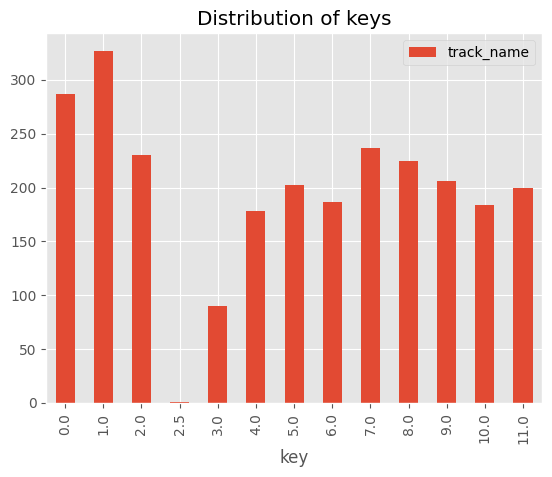

In [45]:
song_key_count = songs.groupby('key').count()#.get(['track_name'])
song_key_count.plot(kind='bar',y='track_name', title='Distribution of keys');
plt.show()

<!-- END QUESTION -->



<a id='section3'></a>
## Section 3: Slow and Steady 🐢🐇

<small>(<a href="#outline">return to the outline</a>)</small>

In music, there are Italian words that describe the tempo, or pace, of a song. In this section, we will analyze the relationship between a song's tempo and its other audio features. But before we do that, we will convert the tempo of each song to its corresponding Italian description. Use the following definitions of Italian tempo markings:

| Italian name | Corresponding tempo range, in beats per minute |
| :--- | :--- |
| Lento | [0, 60) |
| Adagio | [60, 90)
| Andante | [90, 110) |
| Moderato | [110, 120) |
| Allegro | [120, 160) |
| Vivace | [160, 180) |
| Presto | 180 or more |


**Question 3.1.** Add a new column to `songs` called `'tempo_name'` that contains the Italian tempo name for each song.

In [46]:
songs

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  danceability  energy  key  \
0                                Cody Johnson         0.501   0.815  1.0   
1                           Eminem, Nate Dogg         0.548   0.847  1.0   
2                            Blue Öyster Cult         0.333   0.927  9.0   
3                                   Kay Starr         0.739   0.317  0.0   
4                                  Perry Como         0.478   0.341  5.0   
...                                       ...           ...     ...  ...   
2549                               Tate McRae         0.667   0.373  4.0   
2550                             Juan Gabriel         0.647   0.477  0.0   
2551                      MC Davo, Calibre 50         0.747   0.780  9.0   
2552  Millonario & W. Corona, Cartel De Santa         0.937   0.791  0.0   
2553                 Camilo, Evaluna Montaner         0.748   0.779  0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      1.0    -4.865       0.0436       0.05130          0.000000    0.1060   
1      1.0    -3.237       0.1860       0.06220          0.000000    0.0816   
2      0.0    -8.550       0.0733       0.00290          0.000208    0.2970   
3      1.0    -8.668       0.0905       0.39100          0.004870    0.2430   
4      1.0   -12.556       0.0511       0.89700          0.000000    0.2580   
...    ...       ...          ...           ...               ...       ...   
2549   1.0    -9.389       0.0500       0.78500          0.000000    0.0906   
2550   1.0    -8.157       0.0342       0.03740          0.000010    0.1270   
2551   0.0    -5.302       0.2160       0.05830          0.000000    0.1640   
2552   1.0    -5.242       0.0871       0.02050          0.000232    0.0433   
2553   1.0    -6.659       0.0342       0.00884          0.000040    0.1130   

      valence    tempo  duration_min  
0      0.4600  160.087      3.736883  
1      0.1000  171.447      4.963117  
2      0.3850  141.466      5.135333  
3      0.8060   71.165      2.706217  
4      0.4740  143.736      2.931550  
...       ...      ...           ...  
2549   0.0823  124.148      2.821100  
2550   0.7930  112.041      3.048000  
2551   0.5380   82.524      3.091550  
2552   0.9740  119.967      4.816883  
2553   0.9280  128.910      3.582217  

[2554 rows x 14 columns]

In [47]:
def italian_name(tempo):
    if 0 <= tempo < 60:
        return 'Lento'
    elif 60 <= tempo < 90:
        return 'Adagio'
    elif 90 <= tempo < 110:
        return 'Andante'
    elif 110 <= tempo < 120:
        return 'Moderato'
    elif 120 <= tempo < 160:
        return 'Allegro'
    elif 160 <= tempo < 180:
        return 'Vivace'
    else:
        return 'Presto'

In [48]:
italian_name(songs.get('tempo').iloc[0])

'Vivace'

In [49]:
songs = songs.assign(tempo_name = songs.get('tempo').apply(italian_name))
songs

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  danceability  energy  key  \
0                                Cody Johnson         0.501   0.815  1.0   
1                           Eminem, Nate Dogg         0.548   0.847  1.0   
2                            Blue Öyster Cult         0.333   0.927  9.0   
3                                   Kay Starr         0.739   0.317  0.0   
4                                  Perry Como         0.478   0.341  5.0   
...                                       ...           ...     ...  ...   
2549                               Tate McRae         0.667   0.373  4.0   
2550                             Juan Gabriel         0.647   0.477  0.0   
2551                      MC Davo, Calibre 50         0.747   0.780  9.0   
2552  Millonario & W. Corona, Cartel De Santa         0.937   0.791  0.0   
2553                 Camilo, Evaluna Montaner         0.748   0.779  0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      1.0    -4.865       0.0436       0.05130          0.000000    0.1060   
1      1.0    -3.237       0.1860       0.06220          0.000000    0.0816   
2      0.0    -8.550       0.0733       0.00290          0.000208    0.2970   
3      1.0    -8.668       0.0905       0.39100          0.004870    0.2430   
4      1.0   -12.556       0.0511       0.89700          0.000000    0.2580   
...    ...       ...          ...           ...               ...       ...   
2549   1.0    -9.389       0.0500       0.78500          0.000000    0.0906   
2550   1.0    -8.157       0.0342       0.03740          0.000010    0.1270   
2551   0.0    -5.302       0.2160       0.05830          0.000000    0.1640   
2552   1.0    -5.242       0.0871       0.02050          0.000232    0.0433   
2553   1.0    -6.659       0.0342       0.00884          0.000040    0.1130   

      valence    tempo  duration_min tempo_name  
0      0.4600  160.087      3.736883     Vivace  
1      0.1000  171.447      4.963117     Vivace  
2      0.3850  141.466      5.135333    Allegro  
3      0.8060   71.165      2.706217     Adagio  
4      0.4740  143.736      2.931550    Allegro  
...       ...      ...           ...        ...  
2549   0.0823  124.148      2.821100    Allegro  
2550   0.7930  112.041      3.048000   Moderato  
2551   0.5380   82.524      3.091550     Adagio  
2552   0.9740  119.967      4.816883   Moderato  
2553   0.9280  128.910      3.582217    Allegro  

[2554 rows x 15 columns]

**Question 3.2.** Find the most common combination of `'tempo_name'` and `'key'` among all songs in `songs`. Save both answers in a list named `most_common_combo`. The `'tempo_name'` in the most common combination should come first. For example, your answer might look like `['Vivace', 3.0]`.

Similarly, find the least common combination of `'tempo_name'` and `'key'` among all songs in `songs` and save your answers in a `list` named `least_common_combo`, again with the `'tempo_name'` coming first.

In the case of a tie for most or least common, choose any of the combinations involved in the tie.

In [50]:
songs_grouped_by_tempo_and_key = songs.groupby(['tempo_name', 'key']).count().sort_values(by='track_name', ascending=False)
songs_grouped_by_tempo_and_key

track_name  artist_names  danceability  energy  mode  \
tempo_name key                                                          
Allegro    1.0          126           126           126     126   126   
           0.0          117           117           117     117   117   
           8.0           95            95            95      95    95   
           11.0          89            89            89      89    89   
           7.0           88            88            88      88    88   
...                     ...           ...           ...     ...   ...   
Presto     3.0            3             3             3       3     3   
           10.0           3             3             3       3     3   
Lento      8.0            2             2             2       2     2   
           9.0            1             1             1       1     1   
Andante    2.5            1             1             1       1     1   

                 loudness  speechiness  acousticness  instrumentalness  \
tempo_name key                                                           
Allegro    1.0        126          126           126               126   
           0.0        117          117           117               117   
           8.0         95           95            95                95   
           11.0        89           89            89                89   
           7.0         88           88            88                88   
...                   ...          ...           ...               ...   
Presto     3.0          3            3             3                 3   
           10.0         3            3             3                 3   
Lento      8.0          2            2             2                 2   
           9.0          1            1             1                 1   
Andante    2.5          1            1             1                 1   

                 liveness  valence  tempo  duration_min  
tempo_name key                                           
Allegro    1.0        126      126    126           126  
           0.0        117      117    117           117  
           8.0         95       95     95            95  
           11.0        89       89     89            89  
           7.0         88       88     88            88  
...                   ...      ...    ...           ...  
Presto     3.0          3        3      3             3  
           10.0         3        3      3             3  
Lento      8.0          2        2      2             2  
           9.0          1        1      1             1  
Andante    2.5          1        1      1             1  

[75 rows x 13 columns]

In [51]:
list(songs_grouped_by_tempo_and_key.index[0])

['Allegro', 1.0]

In [52]:
list(songs_grouped_by_tempo_and_key.index[-1])

['Andante', 2.5]

In [53]:
most_common_combo = list(songs_grouped_by_tempo_and_key.index[0])
least_common_combo = list(songs_grouped_by_tempo_and_key.index[-1])

print('The most common combination is a tempo of ' + most_common_combo[0] + ' and a key of ' + str(most_common_combo[1]) + '.')
print('The least common combination is a tempo of ' + least_common_combo[0] + ' and a key of ' + str(least_common_combo[1]) + '.')

The most common combination is a tempo of Allegro and a key of 1.0.
The least common combination is a tempo of Andante and a key of 2.5.


In [54]:
most_common_combo

['Allegro', 1.0]

In [55]:
most_common_combo[0]

'Allegro'

**Question 3.3.** Let's identify which songs have the `most_common_combo` of `'tempo_name'` and `'key'`. Starting with `songs`, create a DataFrame of only the songs with this most common `'tempo_name'` and `'key'` combination. Save the result as `common_songs`.

In [56]:
common_songs = songs[(songs.get('tempo_name') == most_common_combo[0]) & (songs.get('key') == most_common_combo[1])]
common_songs

track_name               artist_names  \
43              3G (feat. Lil Uzi Vert)         Yeat, Lil Uzi Vert   
51                                   5X                Don Toliver   
53                              7 rings              Ariana Grande   
63                    999 (with Camilo)       Selena Gomez, Camilo   
66                             A Keeper                      Drake   
...                                 ...                        ...   
2456  family ties (with Kendrick Lamar)  Baby Keem, Kendrick Lamar   
2491                 mainstream sellout          Machine Gun Kelly   
2498    moved to miami (feat. Lil Baby)      Roddy Ricch, Lil Baby   
2529              thought i was playing           Gunna, 21 Savage   
2531                           too easy              Gunna, Future   

      danceability  energy  key  mode  loudness  speechiness  acousticness  \
43           0.758   0.572  1.0   1.0    -8.087       0.2050      0.007730   
51           0.898   0.518  1.0   1.0    -6.991       0.2100      0.040200   
53           0.778   0.317  1.0   0.0   -10.732       0.3340      0.592000   
63           0.781   0.748  1.0   1.0    -4.604       0.2420      0.105000   
66           0.600   0.482  1.0   1.0   -11.596       0.0701      0.512000   
...            ...     ...  ...   ...       ...          ...           ...   
2456         0.711   0.611  1.0   1.0    -5.453       0.3300      0.005880   
2491         0.541   0.693  1.0   1.0    -4.252       0.0612      0.000209   
2498         0.717   0.444  1.0   1.0   -11.126       0.1800      0.019600   
2529         0.679   0.730  1.0   1.0    -7.483       0.0689      0.004210   
2531         0.798   0.574  1.0   1.0    -6.548       0.1570      0.024000   

      instrumentalness  liveness  valence    tempo  duration_min tempo_name  
43            0.000012    0.1520    0.152  135.984      2.844000    Allegro  
51            0.000000    0.1060    0.798  145.082      2.206633    Allegro  
53            0.000000    0.0881    0.327  140.048      2.977117    Allegro  
63            0.000000    0.1560    0.788  149.819      3.736133    Allegro  
66            0.000104    0.1150    0.323  121.909      2.884950    Allegro  
...                ...       ...      ...      ...           ...        ...  
2456          0.000000    0.2300    0.144  134.093      4.204367    Allegro  
2491          0.001030    0.0553    0.483  142.086      1.797483    Allegro  
2498          0.000315    0.1140    0.116  124.685      3.703750    Allegro  
2529          0.000000    0.0736    0.292  148.038      2.797333    Allegro  
2531          0.000000    0.1220    0.309  155.964      2.309783    Allegro  

[126 rows x 15 columns]

We want to listen to some of these `common_songs` to see if they have a similar sound. But we have a problem. In order to play a song, we need its `'uri'`, and `common_songs` doesn't have a `'uri'` column. The `charts` DataFrame does have a `'uri'` column so we should be able to bring in that information by merging the two DataFrames. Though `charts` contains `'uri'`, it also has a ton of information that we don't need, since all of the relevant information per song is already in `songs`. As a result, before we merge, we should prepare a smaller, simpler DataFrame from `charts` with only the new information we need.

**Question 3.4.** Create a DataFrame called `to_merge` from `charts`. The DataFrame `to_merge` should have one row for each song (defined as a combination of `'track_name'` and `'artist_names'`) and three columns: `'track_name'`, `'artist_names'`, and `'uri'`. For each song, the associated `'uri'` should be the **first alphabetically**, among all `'uri'`s associated with that song.

In [57]:
charts

week  rank              track_name  \
0      2021-02-04     1         drivers license   
1      2021-02-04     2               Good Days   
2      2021-02-04     3         Save Your Tears   
3      2021-02-04     4  Mood (feat. iann dior)   
4      2021-02-04     4  Mood (feat. iann dior)   
...           ...   ...                     ...   
70178  2022-07-14   196       Get Into It (Yuh)   
70179  2022-07-14   197              Fancy Like   
70180  2022-07-14   198            Stick Season   
70181  2022-07-14   199        Call Out My Name   
70182  2022-07-14   200               Good Days   

                                        uri release_date  streams  \
0      spotify:track:7lPN2DXiMsVn7XUKtOW1CS   2021-01-08  2054319   
1      spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   916516   
2      spotify:track:5QO79kh1waicV47BqGRL3g   2020-03-20   866067   
3      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
4      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
...                                     ...          ...      ...   
70178  spotify:track:0W6I02J9xcqK8MtSeosEXb   2021-06-25  1592100   
70179  spotify:track:58UKC45GPNTflCN6nwCUeF   2022-01-21  1590126   
70180  spotify:track:0GNVXNz7Jkicfk2mp5OyG5   2022-07-08  1583302   
70181  spotify:track:09mEdoA6zrmBPgTEN5qXmN   2018-03-30  1583235   
70182  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25  1579212   

              artist_names artist_individual  \
0           Olivia Rodrigo    Olivia Rodrigo   
1                      SZA               SZA   
2               The Weeknd        The Weeknd   
3      24kGoldn, iann dior          24kGoldn   
4      24kGoldn, iann dior         iann dior   
...                    ...               ...   
70178             Doja Cat          Doja Cat   
70179         Walker Hayes      Walker Hayes   
70180           Noah Kahan        Noah Kahan   
70181           The Weeknd        The Weeknd   
70182                  SZA               SZA   

                                   artist_id               artist_genre  ...  \
0      spotify:artist:1McMsnEElThX1knmY4oliG                        pop  ...   
1      spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   
2      spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
3      spotify:artist:6fWVd57NKTalqvmjRd2t8Z                   cali rap  ...   
4      spotify:artist:6ASri4ePR7RlsvIQgWPJpS                melodic rap  ...   
...                                      ...                        ...  ...   
70178  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                  dance pop  ...   
70179  spotify:artist:7sKxqpSqbIzphAKAhrqvlf        modern country rock  ...   
70180  spotify:artist:2RQXRUsr4IW1f3mKyKsy4B                        pop  ...   
70181  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
70182  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0        1    -8.761       0.0601        0.7210          0.000013    0.1050   
1        0    -8.370       0.0583        0.4990          0.000008    0.6880   
2        1    -5.487       0.0309        0.0212          0.000012    0.5430   
3        0    -3.558       0.0369        0.2210          0.000000    0.2720   
4        0    -3.558       0.0369        0.2210          0.000000    0.2720   
...    ...       ...          ...           ...               ...       ...   
70178    0    -6.029       0.1620        0.3150          0.000034    0.0894   
70179    1    -6.459       0.0600        0.1110          0.000000    0.3150   
70180    1    -6.935       0.0651        0.7990          0.000000    0.0966   
70181    1    -4.954       0.0356        0.1700          0.000000    0.3070   
70182    0    -8.370       0.0583        0.4990          0.000008    0.6880   

       valence    tempo  duration        country  
0        0.132  143.874    242014

In [58]:
not_ordered_merge = charts.get(['track_name', 'artist_names', 'uri']).groupby(['track_name', 'artist_names', 'uri']).count().reset_index()#.sort_values(by='uri')
ordered_merge = not_ordered_merge.sort_values(by=['track_name', 'artist_names'])
ordered_merge

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2845                          ¿Por Qué Me Haces Llorar?   
2846                                   ¿Quién Te Crees?   
2847                                            Éxtasis   
2848                                            Éxtasis   
2849                                             Índigo   

                                 artist_names  \
0                                Cody Johnson   
1                           Eminem, Nate Dogg   
2                            Blue Öyster Cult   
3                                   Kay Starr   
4                                  Perry Como   
...                                       ...   
2845                             Juan Gabriel   
2846                      MC Davo, Calibre 50   
2847  Millonario & W. Corona, Cartel De Santa   
2848  Millonario & W. Corona, Cartel De Santa   
2849                 Camilo, Evaluna Montaner   

                                       uri  
0     spotify:track:4k3lPl8YTKuY8c1HelVnm3  
1     spotify:track:4xkOaSrkexMciUUogZKVTS  
2     spotify:track:5QTxFnGygVM4jFQiBovmRo  
3     spotify:track:2n1xrggQtAGEV1AgzvooGB  
4     spotify:track:0hvN2v6fAcB6xWyW7UaooA  
...                                    ...  
2845  spotify:track:68pE8830rWrd5LSSfKcRqn  
2846  spotify:track:2LXOSAYiSrTfIf8smheLaz  
2847  spotify:track:3NqbKUOgaU2LgIFRbu4B12  
2848  spotify:track:4xbMF8jx0msGGgrtJaAuXE  
2849  spotify:track:4knc1Fp3kbuq8bH2byOvLu  

[2850 rows x 3 columns]

In [59]:
grouped_merge = ordered_merge.groupby(['track_name', 'artist_names']).count()
count_multiple_uris = grouped_merge[grouped_merge.get('uri') > 1]#== 1]
count_multiple_uris

uri
track_name                                        artist_names                                           
00:00                                             Siddhartha                                            2
10,000 Hours (with Justin Bieber)                 Dan + Shay, Justin Bieber                             2
100 Años                                          Carlos Rivera, Maluma                                 2
2 Veces                                           Los Plebes del Rancho de Ariel Camacho, Christi...    2
2/Catorce                                         Rauw Alejandro, Mr. Naisgai                           3
...                                                                                                   ...
t r a n s p a r e n t s o u l feat. Travis Barker WILLOW, Travis Barker                                 2
thought i was playing                             Gunna, 21 Savage                                      2
too easy                                          Gunna, Future                                         2
what would you do?                                Tate McRae                                            2
Éxtasis                                           Millonario & W. Corona, Cartel De Santa               2

[271 rows x 1 columns]

In [60]:
count_one_uris = grouped_merge[grouped_merge.get('uri') == 1]
count_one_uris

uri
track_name                                         artist_names                 
'Til You Can't                                     Cody Johnson                1
'Till I Collapse                                   Eminem, Nate Dogg           1
(Don't Fear) The Reaper                            Blue Öyster Cult            1
(Everybody's Waitin' For) The Man With The Bag ... Kay Starr                   1
(There's No Place Like) Home for the Holidays -... Perry Como                  1
...                                                                          ...
you & me                                           Gunna, Chlöe                1
you broke me first                                 Tate McRae                  1
¿Por Qué Me Haces Llorar?                          Juan Gabriel                1
¿Quién Te Crees?                                   MC Davo, Calibre 50         1
Índigo                                             Camilo, Evaluna Montaner    1

[2283 rows x 1 columns]

In [61]:
to_merge = ordered_merge.groupby(['track_name', 'artist_names']).min().reset_index()#sort_values(by='uri')#.iloc[0, 0]
to_merge

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  \
0                                Cody Johnson   
1                           Eminem, Nate Dogg   
2                            Blue Öyster Cult   
3                                   Kay Starr   
4                                  Perry Como   
...                                       ...   
2549                               Tate McRae   
2550                             Juan Gabriel   
2551                      MC Davo, Calibre 50   
2552  Millonario & W. Corona, Cartel De Santa   
2553                 Camilo, Evaluna Montaner   

                                       uri  
0     spotify:track:4k3lPl8YTKuY8c1HelVnm3  
1     spotify:track:4xkOaSrkexMciUUogZKVTS  
2     spotify:track:5QTxFnGygVM4jFQiBovmRo  
3     spotify:track:2n1xrggQtAGEV1AgzvooGB  
4     spotify:track:0hvN2v6fAcB6xWyW7UaooA  
...                                    ...  
2549  spotify:track:45bE4HXI0AwGZXfZtMp8JR  
2550  spotify:track:68pE8830rWrd5LSSfKcRqn  
2551  spotify:track:2LXOSAYiSrTfIf8smheLaz  
2552  spotify:track:3NqbKUOgaU2LgIFRbu4B12  
2553  spotify:track:4knc1Fp3kbuq8bH2byOvLu  

[2554 rows x 3 columns]

Notice that `'track_name'` and `'artist_names'` are columns names in the `common_songs` DataFrame and in the `to_merge` DataFrame. Further, they are the *only* column names that these DataFrames have in common. 

It turns out that when we merge two DataFrames without specifying which columns to merge on, `babypandas` will merge them on the set of shared column names, which means it will match up rows that have the same values in *all* shared columns. 

**Question 3.5.** Merge `common_songs` and `to_merge` on both `'track_name'` and `'artist_names'`. Save the resulting DataFrame as `common_songs_uri`. Think about why we want to merge on both columns in this case (i.e. why we _can't_ merge on just `'track_name'` or just `'artist_names'`).

In [62]:
common_songs_uri = common_songs.merge(to_merge)
common_songs_uri

track_name               artist_names  \
0              3G (feat. Lil Uzi Vert)         Yeat, Lil Uzi Vert   
1                                   5X                Don Toliver   
2                              7 rings              Ariana Grande   
3                    999 (with Camilo)       Selena Gomez, Camilo   
4                             A Keeper                      Drake   
..                                 ...                        ...   
121  family ties (with Kendrick Lamar)  Baby Keem, Kendrick Lamar   
122                 mainstream sellout          Machine Gun Kelly   
123    moved to miami (feat. Lil Baby)      Roddy Ricch, Lil Baby   
124              thought i was playing           Gunna, 21 Savage   
125                           too easy              Gunna, Future   

     danceability  energy  key  mode  loudness  speechiness  acousticness  \
0           0.758   0.572  1.0   1.0    -8.087       0.2050      0.007730   
1           0.898   0.518  1.0   1.0    -6.991       0.2100      0.040200   
2           0.778   0.317  1.0   0.0   -10.732       0.3340      0.592000   
3           0.781   0.748  1.0   1.0    -4.604       0.2420      0.105000   
4           0.600   0.482  1.0   1.0   -11.596       0.0701      0.512000   
..            ...     ...  ...   ...       ...          ...           ...   
121         0.711   0.611  1.0   1.0    -5.453       0.3300      0.005880   
122         0.541   0.693  1.0   1.0    -4.252       0.0612      0.000209   
123         0.717   0.444  1.0   1.0   -11.126       0.1800      0.019600   
124         0.679   0.730  1.0   1.0    -7.483       0.0689      0.004210   
125         0.798   0.574  1.0   1.0    -6.548       0.1570      0.024000   

     instrumentalness  liveness  valence    tempo  duration_min tempo_name  \
0            0.000012    0.1520    0.152  135.984      2.844000    Allegro   
1            0.000000    0.1060    0.798  145.082      2.206633    Allegro   
2            0.000000    0.0881    0.327  140.048      2.977117    Allegro   
3            0.000000    0.1560    0.788  149.819      3.736133    Allegro   
4            0.000104    0.1150    0.323  121.909      2.884950    Allegro   
..                ...       ...      ...      ...           ...        ...   
121          0.000000    0.2300    0.144  134.093      4.204367    Allegro   
122          0.001030    0.0553    0.483  142.086      1.797483    Allegro   
123          0.000315    0.1140    0.116  124.685      3.703750    Allegro   
124          0.000000    0.0736    0.292  148.038      2.797333    Allegro   
125          0.000000    0.1220    0.309  155.964      2.309783    Allegro   

                                      uri  
0    spotify:track:3O0XntET8Ee1nFI3rDTwOJ  
1    spotify:track:2OcbewDrWFNTYRqpSzJBCY  
2    spotify:track:6ocbgoVGwYJhOv1GgI9NsF  
3    spotify:track:0EtuSDTRJYUwlPf4y6coIz  
4    spotify:track:0nAZGkBGKQCXyaoSJfRhC1  
..                                    ...  
121  spotify:track:3QFInJAm9eyaho5vBzxInN  
122  spotify:track:0XugRTkCzcwTJ0ZZJbeVHO  
123  spotify:track:3rjwafyisDpLdoJ4RecHp6  
124  spotify:track:3XLbDUB5BX2WqL2qoAsvtb  
125  spotify:track:2Hph3X77ySNgBCIak5CMc6  

[126 rows x 16 columns]

**Question 3.6.** It would be great if we could listen to the songs in `common_songs_uri` to see if they sound alike, but there are too many songs to listen to them all. In an array called `certain_uris`, store the following `'uri'`s:
- the first alphabetical `'uri'` in `common_songs_uri`,
- then every 40th song thereafter, when the songs are ordered alphabetically by `'uri'`. 

Then, play all the songs whose `'uri'`s are stored in `certain_uris`. As in Question 1.3, you should only call the function `play_spotify` one time! 

In [63]:
ordered_uris = common_songs_uri.sort_values(by='uri')
ordered_uris

track_name  \
63                              Mr. Brightside   
70         No Hands (feat. Roscoe Dash & Wale)   
74                                POLTERGEIST!   
21                      Claymore (feat. Smino)   
71                          No Love (with SZA)   
..                                         ...   
111                          Took Her To The O   
13                                Belly Dancer   
60                                       MONEY   
53   Lemonade (feat. Gunna, Don Toliver & NAV)   
98                            Talk Of The Town   

                                artist_names  danceability  energy  key  mode  \
63                               The Killers         0.352   0.911  1.0   1.0   
70      Waka Flocka Flame, Roscoe Dash, Wale         0.760   0.595  1.0   1.0   
74                          CORPSE, OmenXIII         0.766   0.658  1.0   1.0   
21                      Isaiah Rashad, Smino         0.688   0.517  1.0   1.0   
71                        Summer Walker, SZA         0.707   0.618  1.0   0.0   
..                                       ...           ...     ...  ...   ...   
111                                 King Von         0.820   0.592  1.0   1.0   
13                             Imanbek, BYOR         0.845   0.797  1.0   1.0   
60                                      LISA         0.831   0.554  1.0   0.0   
53   Internet Money, Gunna, Don Toliver, NAV         0.800   0.658  1.0   0.0   
98                               Jack Harlow         0.577   0.448  1.0   1.0   

     loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
63     -5.230       0.0747       0.00121          0.000000    0.0995    0.236   
70     -6.366       0.0391       0.00544          0.000000    0.2410    0.361   
74     -7.014       0.2600       0.00192          0.000000    0.0919    0.476   
21    -10.374       0.1250       0.63200          0.000922    0.0887    0.679   
71     -5.825       0.1900       0.17000          0.000000    0.2930    0.517   
..        ...          ...           ...               ...       ...      ...   
111    -7.002       0.2900       0.01490          0.000005    0.1210    0.400   
13     -4.984       0.1390       0.05820          0.000006    0.1670    0.422   
60     -9.998       0.2180       0.16100          0.000061    0.1520    0.396   
53     -6.142       0.0790       0.25000          0.000000    0.1110    0.462   
98     -9.215       0.1890       0.39500          0.000000    0.6100    0.543   

       tempo  duration_min tempo_name                                   uri  
63   148.033      3.716217    Allegro  spotify:track:003vvx7Niy0yvhvHt4a68B  
70   131.497      4.396217    Allegro  spotify:track:03tqyYWC9Um2ZqU0ZN849H  
74   133.085      1.684217    Allegro  spotify:track:041sluNZwBxTCOuu766eNi  
21   141.287      3.102533    Allegro  spotify:track:051zam2WDIKOLdu4XYpCaA  
71   133.876      3.858300    Allegro  spotify:track:08SB2OtZkaliju77WYEKxk  
..       ...           ...        ...                                   ...  
111  159.980      3.269667    Allegro  spotify:track:7fEoXCZTZFosUFvFQg1BmW  
13   121.985      2.524583    Allegro  spotify:track:7fZBQnc0zXwVybgCIrQQil  
60   140.026      2.803800    Allegro  spotify:track:7hU3IHwjX150XLoTVmjD0q  
53   140.042      3.257150    Allegro  spotify:track:7hxHWCCAIIxFLCzvDgnQHX  
98   137.694      1.382117    Allegro  spotify:track:7qFtkIa3KfhJAlWLVE1GCI  

[126 rows x 16 columns]

In [64]:
ordered_uris.iloc[40]

track_name                                  too easy
artist_names                           Gunna, Future
danceability                                   0.798
energy                                         0.574
key                                              1.0
                                ...                 
valence                                        0.309
tempo                                        155.964
duration_min                                2.309783
tempo_name                                   Allegro
uri             spotify:track:2Hph3X77ySNgBCIak5CMc6
Name: 125, Length: 16, dtype: object

In [65]:
certain_uris = np.array([])

for i in np.arange(0, ordered_uris.shape[0], 40):
    certain_uris = np.append(certain_uris, ordered_uris.get('uri').iloc[i])
    
certain_uris    

# Play the songs here.
for uri in certain_uris:
    play_spotify(uri)

In [66]:
len(certain_uris)

4

In [67]:
np.arange(0, ordered_uris.shape[0], 40)

array([  0,  40,  80, 120])

**Question 3.7.** Now, let's categorize songs by their Italian tempo names. Specifically, find the mean of each numerical variable for each `'tempo_name'`. Store these means in a DataFrame indexed by `'tempo_name'` and sorted from slowest to fastest tempos. Save your DataFrame to the variable `song_means`. 

In [68]:
ordered_uris

track_name  \
63                              Mr. Brightside   
70         No Hands (feat. Roscoe Dash & Wale)   
74                                POLTERGEIST!   
21                      Claymore (feat. Smino)   
71                          No Love (with SZA)   
..                                         ...   
111                          Took Her To The O   
13                                Belly Dancer   
60                                       MONEY   
53   Lemonade (feat. Gunna, Don Toliver & NAV)   
98                            Talk Of The Town   

                                artist_names  danceability  energy  key  mode  \
63                               The Killers         0.352   0.911  1.0   1.0   
70      Waka Flocka Flame, Roscoe Dash, Wale         0.760   0.595  1.0   1.0   
74                          CORPSE, OmenXIII         0.766   0.658  1.0   1.0   
21                      Isaiah Rashad, Smino         0.688   0.517  1.0   1.0   
71                        Summer Walker, SZA         0.707   0.618  1.0   0.0   
..                                       ...           ...     ...  ...   ...   
111                                 King Von         0.820   0.592  1.0   1.0   
13                             Imanbek, BYOR         0.845   0.797  1.0   1.0   
60                                      LISA         0.831   0.554  1.0   0.0   
53   Internet Money, Gunna, Don Toliver, NAV         0.800   0.658  1.0   0.0   
98                               Jack Harlow         0.577   0.448  1.0   1.0   

     loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
63     -5.230       0.0747       0.00121          0.000000    0.0995    0.236   
70     -6.366       0.0391       0.00544          0.000000    0.2410    0.361   
74     -7.014       0.2600       0.00192          0.000000    0.0919    0.476   
21    -10.374       0.1250       0.63200          0.000922    0.0887    0.679   
71     -5.825       0.1900       0.17000          0.000000    0.2930    0.517   
..        ...          ...           ...               ...       ...      ...   
111    -7.002       0.2900       0.01490          0.000005    0.1210    0.400   
13     -4.984       0.1390       0.05820          0.000006    0.1670    0.422   
60     -9.998       0.2180       0.16100          0.000061    0.1520    0.396   
53     -6.142       0.0790       0.25000          0.000000    0.1110    0.462   
98     -9.215       0.1890       0.39500          0.000000    0.6100    0.543   

       tempo  duration_min tempo_name                                   uri  
63   148.033      3.716217    Allegro  spotify:track:003vvx7Niy0yvhvHt4a68B  
70   131.497      4.396217    Allegro  spotify:track:03tqyYWC9Um2ZqU0ZN849H  
74   133.085      1.684217    Allegro  spotify:track:041sluNZwBxTCOuu766eNi  
21   141.287      3.102533    Allegro  spotify:track:051zam2WDIKOLdu4XYpCaA  
71   133.876      3.858300    Allegro  spotify:track:08SB2OtZkaliju77WYEKxk  
..       ...           ...        ...                                   ...  
111  159.980      3.269667    Allegro  spotify:track:7fEoXCZTZFosUFvFQg1BmW  
13   121.985      2.524583    Allegro  spotify:track:7fZBQnc0zXwVybgCIrQQil  
60   140.026      2.803800    Allegro  spotify:track:7hU3IHwjX150XLoTVmjD0q  
53   140.042      3.257150    Allegro  spotify:track:7hxHWCCAIIxFLCzvDgnQHX  
98   137.694      1.382117    Allegro  spotify:track:7qFtkIa3KfhJAlWLVE1GCI  

[126 rows x 16 columns]

In [69]:
uris_grouped_by_name = ordered_uris.groupby('tempo_name').mean()
uris_grouped_by_name

danceability   energy  key      mode  loudness  speechiness  \
tempo_name                                                                
Allegro         0.710202  0.62044  1.0  0.714286  -6.64694     0.151246   

            acousticness  instrumentalness  liveness   valence       tempo  \
tempo_name                                                                   
Allegro         0.184964          0.010945   0.18602  0.463159  138.666623   

            duration_min  
tempo_name                
Allegro         3.225921

In [70]:
songs

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  danceability  energy  key  \
0                                Cody Johnson         0.501   0.815  1.0   
1                           Eminem, Nate Dogg         0.548   0.847  1.0   
2                            Blue Öyster Cult         0.333   0.927  9.0   
3                                   Kay Starr         0.739   0.317  0.0   
4                                  Perry Como         0.478   0.341  5.0   
...                                       ...           ...     ...  ...   
2549                               Tate McRae         0.667   0.373  4.0   
2550                             Juan Gabriel         0.647   0.477  0.0   
2551                      MC Davo, Calibre 50         0.747   0.780  9.0   
2552  Millonario & W. Corona, Cartel De Santa         0.937   0.791  0.0   
2553                 Camilo, Evaluna Montaner         0.748   0.779  0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      1.0    -4.865       0.0436       0.05130          0.000000    0.1060   
1      1.0    -3.237       0.1860       0.06220          0.000000    0.0816   
2      0.0    -8.550       0.0733       0.00290          0.000208    0.2970   
3      1.0    -8.668       0.0905       0.39100          0.004870    0.2430   
4      1.0   -12.556       0.0511       0.89700          0.000000    0.2580   
...    ...       ...          ...           ...               ...       ...   
2549   1.0    -9.389       0.0500       0.78500          0.000000    0.0906   
2550   1.0    -8.157       0.0342       0.03740          0.000010    0.1270   
2551   0.0    -5.302       0.2160       0.05830          0.000000    0.1640   
2552   1.0    -5.242       0.0871       0.02050          0.000232    0.0433   
2553   1.0    -6.659       0.0342       0.00884          0.000040    0.1130   

      valence    tempo  duration_min tempo_name  
0      0.4600  160.087      3.736883     Vivace  
1      0.1000  171.447      4.963117     Vivace  
2      0.3850  141.466      5.135333    Allegro  
3      0.8060   71.165      2.706217     Adagio  
4      0.4740  143.736      2.931550    Allegro  
...       ...      ...           ...        ...  
2549   0.0823  124.148      2.821100    Allegro  
2550   0.7930  112.041      3.048000   Moderato  
2551   0.5380   82.524      3.091550     Adagio  
2552   0.9740  119.967      4.816883   Moderato  
2553   0.9280  128.910      3.582217    Allegro  

[2554 rows x 15 columns]

In [71]:
songs_grouped_by_name = songs.groupby('tempo_name').mean()
songs_grouped_by_name

danceability    energy       key      mode   loudness  \
tempo_name                                                          
Adagio          0.621284  0.559786  5.140704  0.625628  -7.147053   
Allegro         0.681836  0.613450  5.152151  0.631689  -6.842650   
Andante         0.704633  0.634094  5.306588  0.576014  -6.452064   
Lento           0.382000  0.363000  8.333333  0.666667 -13.754667   
Moderato        0.698731  0.616624  5.129151  0.619926  -6.774517   
Presto          0.513000  0.600714  5.116883  0.688312  -6.845909   
Vivace          0.622379  0.637733  5.192308  0.615385  -6.232313   

            speechiness  acousticness  instrumentalness  liveness   valence  \
tempo_name                                                                    
Adagio         0.144588      0.318340          0.012825  0.182341  0.478925   
Allegro        0.112475      0.249058          0.010604  0.180571  0.506538   
Andante        0.102016      0.263806          0.013010  0.171431  0.544834   
Lento          0.065867      0.529333          0.012967  0.342033  0.684333   
Moderato       0.081015      0.276549          0.014388  0.187421  0.544509   
Presto         0.139118      0.306433          0.009172  0.149688  0.526116   
Vivace         0.166024      0.241861          0.012375  0.185906  0.548454   

                 tempo  duration_min  
tempo_name                            
Adagio       80.822819      3.381803  
Allegro     136.898663      3.319493  
Andante      98.818757      3.408258  
Lento        45.251667      2.423483  
Moderato    115.489395      3.353159  
Presto      187.764870      3.587768  
Vivace      170.314977      3.362829

In [72]:
song_means = songs_grouped_by_name.sort_values(by='tempo')
song_means

danceability    energy       key      mode   loudness  \
tempo_name                                                          
Lento           0.382000  0.363000  8.333333  0.666667 -13.754667   
Adagio          0.621284  0.559786  5.140704  0.625628  -7.147053   
Andante         0.704633  0.634094  5.306588  0.576014  -6.452064   
Moderato        0.698731  0.616624  5.129151  0.619926  -6.774517   
Allegro         0.681836  0.613450  5.152151  0.631689  -6.842650   
Vivace          0.622379  0.637733  5.192308  0.615385  -6.232313   
Presto          0.513000  0.600714  5.116883  0.688312  -6.845909   

            speechiness  acousticness  instrumentalness  liveness   valence  \
tempo_name                                                                    
Lento          0.065867      0.529333          0.012967  0.342033  0.684333   
Adagio         0.144588      0.318340          0.012825  0.182341  0.478925   
Andante        0.102016      0.263806          0.013010  0.171431  0.544834   
Moderato       0.081015      0.276549          0.014388  0.187421  0.544509   
Allegro        0.112475      0.249058          0.010604  0.180571  0.506538   
Vivace         0.166024      0.241861          0.012375  0.185906  0.548454   
Presto         0.139118      0.306433          0.009172  0.149688  0.526116   

                 tempo  duration_min  
tempo_name                            
Lento        45.251667      2.423483  
Adagio       80.822819      3.381803  
Andante      98.818757      3.408258  
Moderato    115.489395      3.353159  
Allegro     136.898663      3.319493  
Vivace      170.314977      3.362829  
Presto      187.764870      3.587768

**Question 3.8.** One `'tempo_name'` category has far fewer songs than the others. Since there are too few songs of this `'tempo_name'` for us to draw any meaningful conclusions from, let's create a version of `song_means` without this row. Save the resulting DataFrame in `song_means_modified`.

In [73]:
count_by_tempo = songs.groupby('tempo_name').count().sort_values(by='track_name')
count_by_tempo

track_name  artist_names  danceability  energy  key  mode  \
tempo_name                                                              
Lento                3             3             3       3    3     3   
Presto              77            77            77      77   77    77   
Vivace             260           260           260     260  260   260   
Moderato           271           271           271     271  271   271   
Adagio             398           398           398     398  398   398   
Andante            592           592           592     592  592   592   
Allegro            953           953           953     953  953   953   

            loudness  speechiness  acousticness  instrumentalness  liveness  \
tempo_name                                                                    
Lento              3            3             3                 3         3   
Presto            77           77            77                77        77   
Vivace           260          260           260               260       260   
Moderato         271          271           271               271       271   
Adagio           398          398           398               398       398   
Andante          592          592           592               592       592   
Allegro          953          953           953               953       953   

            valence  tempo  duration_min  
tempo_name                                
Lento             3      3             3  
Presto           77     77            77  
Vivace          260    260           260  
Moderato        271    271           271  
Adagio          398    398           398  
Andante         592    592           592  
Allegro         953    953           953

In [74]:
test_remove_rows = count_by_tempo.iloc[1:]
test_remove_rows

track_name  artist_names  danceability  energy  key  mode  \
tempo_name                                                              
Presto              77            77            77      77   77    77   
Vivace             260           260           260     260  260   260   
Moderato           271           271           271     271  271   271   
Adagio             398           398           398     398  398   398   
Andante            592           592           592     592  592   592   
Allegro            953           953           953     953  953   953   

            loudness  speechiness  acousticness  instrumentalness  liveness  \
tempo_name                                                                    
Presto            77           77            77                77        77   
Vivace           260          260           260               260       260   
Moderato         271          271           271               271       271   
Adagio           398          398           398               398       398   
Andante          592          592           592               592       592   
Allegro          953          953           953               953       953   

            valence  tempo  duration_min  
tempo_name                                
Presto           77     77            77  
Vivace          260    260           260  
Moderato        271    271           271  
Adagio          398    398           398  
Andante         592    592           592  
Allegro         953    953           953

In [75]:
song_means_modified = song_means[song_means.get('tempo') >= 60] 
### we can get where the mean is greater or equal to 60 because every other tempo_name has a tempo of 60 or more,
### therefore their means will be greater than 60
song_means_modified

danceability    energy       key      mode  loudness  speechiness  \
tempo_name                                                                      
Adagio          0.621284  0.559786  5.140704  0.625628 -7.147053     0.144588   
Andante         0.704633  0.634094  5.306588  0.576014 -6.452064     0.102016   
Moderato        0.698731  0.616624  5.129151  0.619926 -6.774517     0.081015   
Allegro         0.681836  0.613450  5.152151  0.631689 -6.842650     0.112475   
Vivace          0.622379  0.637733  5.192308  0.615385 -6.232313     0.166024   
Presto          0.513000  0.600714  5.116883  0.688312 -6.845909     0.139118   

            acousticness  instrumentalness  liveness   valence       tempo  \
tempo_name                                                                   
Adagio          0.318340          0.012825  0.182341  0.478925   80.822819   
Andante         0.263806          0.013010  0.171431  0.544834   98.818757   
Moderato        0.276549          0.014388  0.187421  0.544509  115.489395   
Allegro         0.249058          0.010604  0.180571  0.506538  136.898663   
Vivace          0.241861          0.012375  0.185906  0.548454  170.314977   
Presto          0.306433          0.009172  0.149688  0.526116  187.764870   

            duration_min  
tempo_name                
Adagio          3.381803  
Andante         3.408258  
Moderato        3.353159  
Allegro         3.319493  
Vivace          3.362829  
Presto          3.587768

**Question 3.9.** Using `song_means_modified`, create a line plot that portrays how `'danceability'`, `'energy'`, `'acousticness'`, and `'valence'` change according to `'tempo_name'`. Make sure your plot arranges songs from slowest to fastest tempos.

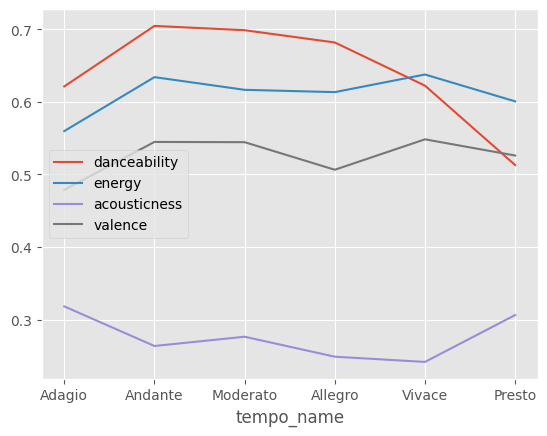

In [76]:
song_means_modified.plot(kind='line', y=['danceability', 'energy', 'acousticness', 'valence']);
plt.show()

<!-- END QUESTION -->



You should notice that `'energy'` and `'valence'` seem to move together. This means these variables are _positively associated_. 

<a id='section4'></a>

## Section 4: Crazy in Love 💕

<small>(<a href="#outline">return to the outline</a>)</small>

Now that we've developed an understanding of how a song's `'tempo_name'` relates to its audio features, let's turn our attention to the relationship between a song's `'track_name'` and its audio features. We'll start by looking at songs that contain `'love'` in the `'track_name'` and learning about what makes them special relative to other songs. By the end of this section, we'll be able to build an interactive tool to explore what makes certain songs stand out musically!

**Question 4.1.** Create a DataFrame called `love_and_not` that has all the same rows and columns as `songs`, plus one extra column, called `'has_love'`. This column should contain either the **string** `'True'` or `'False'`, corresponding to whether or not  the string `'love'` is part of the song's `'track_name'`. 

We consider `'love'` to be a part of a song's `'track_name'` even in the following scenarios:
- `'love'` is part of another word, e.g. `'track_name'` contains `'lovely'`.
- The capitalization is different, e.g. the `'track_name'` contains `'LoVE'`.

_Note_: It may seem strange that we're asking you to use the strings `'True'` and `'False'` rather than the Boolean values `True` and `False` directly; this will make more sense in the coming questions.

In [77]:
songs

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  danceability  energy  key  \
0                                Cody Johnson         0.501   0.815  1.0   
1                           Eminem, Nate Dogg         0.548   0.847  1.0   
2                            Blue Öyster Cult         0.333   0.927  9.0   
3                                   Kay Starr         0.739   0.317  0.0   
4                                  Perry Como         0.478   0.341  5.0   
...                                       ...           ...     ...  ...   
2549                               Tate McRae         0.667   0.373  4.0   
2550                             Juan Gabriel         0.647   0.477  0.0   
2551                      MC Davo, Calibre 50         0.747   0.780  9.0   
2552  Millonario & W. Corona, Cartel De Santa         0.937   0.791  0.0   
2553                 Camilo, Evaluna Montaner         0.748   0.779  0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      1.0    -4.865       0.0436       0.05130          0.000000    0.1060   
1      1.0    -3.237       0.1860       0.06220          0.000000    0.0816   
2      0.0    -8.550       0.0733       0.00290          0.000208    0.2970   
3      1.0    -8.668       0.0905       0.39100          0.004870    0.2430   
4      1.0   -12.556       0.0511       0.89700          0.000000    0.2580   
...    ...       ...          ...           ...               ...       ...   
2549   1.0    -9.389       0.0500       0.78500          0.000000    0.0906   
2550   1.0    -8.157       0.0342       0.03740          0.000010    0.1270   
2551   0.0    -5.302       0.2160       0.05830          0.000000    0.1640   
2552   1.0    -5.242       0.0871       0.02050          0.000232    0.0433   
2553   1.0    -6.659       0.0342       0.00884          0.000040    0.1130   

      valence    tempo  duration_min tempo_name  
0      0.4600  160.087      3.736883     Vivace  
1      0.1000  171.447      4.963117     Vivace  
2      0.3850  141.466      5.135333    Allegro  
3      0.8060   71.165      2.706217     Adagio  
4      0.4740  143.736      2.931550    Allegro  
...       ...      ...           ...        ...  
2549   0.0823  124.148      2.821100    Allegro  
2550   0.7930  112.041      3.048000   Moderato  
2551   0.5380   82.524      3.091550     Adagio  
2552   0.9740  119.967      4.816883   Moderato  
2553   0.9280  128.910      3.582217    Allegro  

[2554 rows x 15 columns]

In [78]:
df_has_love_in_track = songs[songs.get('track_name').str.contains('love', case=False)]
df_has_love_in_track

track_name  \
6     ...And to Those I Love, Thanks for Sticking Ar...   
151                                        Another Love   
159                                 Anyone Who Loves Me   
344                  California Love - Original Version   
459                              Crazy What Love Can Do   
...                                                 ...   
2488                                              love.   
2489                               lovely (with Khalid)   
2528            this is what falling in love feels like   
2537                         u love u (with Tate McRae)   
2540                         we fell in love in october   

                                  artist_names  danceability  energy   key  \
6                                  $uicideboy$         0.792   0.511   2.0   
151                                  Tom Odell         0.442   0.538   4.0   
159                           Charlotte Cardin         0.718   0.165  11.0   
344                       2Pac, Roger, Dr. Dre         0.763   0.850   7.0   
459   David Guetta, Becky Hill, Ella Henderson         0.601   0.713   4.0   
...                                        ...           ...     ...   ...   
2488                                  Kid Cudi         0.574   0.736   5.0   
2489                     Billie Eilish, Khalid         0.351   0.296   4.0   
2528                                      JVKE         0.424   0.438  11.0   
2537                     blackbear, Tate McRae         0.544   0.704   4.0   
2540                               girl in red         0.566   0.366   7.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
6      1.0    -6.876       0.0409        0.1240          0.000090    0.1400   
151    0.0    -8.550       0.0451        0.7170          0.000029    0.0900   
159    1.0    -8.335       0.0354        0.8660          0.000000    0.1420   
344    1.0    -3.052       0.0417        0.0304          0.000001    0.3710   
459    0.0    -3.758       0.0449        0.0282          0.000000    0.1580   
...    ...       ...          ...           ...               ...       ...   
2488   1.0    -4.743       0.0465        0.1460          0.000017    0.4070   
2489   0.0   -10.109       0.0333        0.9340          0.000000    0.0950   
2528   1.0    -5.530       0.0553        0.6170          0.000000    0.0837   
2537   0.0    -5.678       0.0435        0.0156          0.000000    0.1640   
2540   1.0   -12.808       0.0280        0.1130          0.181000    0.1550   

      valence    tempo  duration_min tempo_name  
6       0.111  113.983      2.808167   Moderato  
151     0.139  122.758      4.072667    Allegro  
159     0.447   82.629      3.942217     Adagio  
344     0.761   91.519      4.748450    Andante  
459     0.464  122.872      2.829267    Allegro  
...       ...      ...           ...        ...  
2488    0.344  138.501      5.476217    Allegro  
2489    0.120  115.284      3.336433   Moderato  
2528    0.325  128.983      2.005133    Allegro  
2537    0.265   80.029      3.151033     Adagio  
2540    0.237  129.959      3.069233    Allegro  

[71 rows x 15 columns]

In [79]:
has_love_in_track = songs.get('track_name').str.contains('love', case=False)
has_love_in_track

0       False
1       False
2       False
3       False
4       False
        ...  
2549    False
2550    False
2551    False
2552    False
2553    False
Name: track_name, Length: 2554, dtype: bool

In [80]:
def bool_to_str(value):
    if value == True:
        return 'True'
    else: 
        return 'False'

In [81]:
love_and_not = songs.assign(has_love=has_love_in_track.apply(bool_to_str))
love_and_not 

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  danceability  energy  key  \
0                                Cody Johnson         0.501   0.815  1.0   
1                           Eminem, Nate Dogg         0.548   0.847  1.0   
2                            Blue Öyster Cult         0.333   0.927  9.0   
3                                   Kay Starr         0.739   0.317  0.0   
4                                  Perry Como         0.478   0.341  5.0   
...                                       ...           ...     ...  ...   
2549                               Tate McRae         0.667   0.373  4.0   
2550                             Juan Gabriel         0.647   0.477  0.0   
2551                      MC Davo, Calibre 50         0.747   0.780  9.0   
2552  Millonario & W. Corona, Cartel De Santa         0.937   0.791  0.0   
2553                 Camilo, Evaluna Montaner         0.748   0.779  0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      1.0    -4.865       0.0436       0.05130          0.000000    0.1060   
1      1.0    -3.237       0.1860       0.06220          0.000000    0.0816   
2      0.0    -8.550       0.0733       0.00290          0.000208    0.2970   
3      1.0    -8.668       0.0905       0.39100          0.004870    0.2430   
4      1.0   -12.556       0.0511       0.89700          0.000000    0.2580   
...    ...       ...          ...           ...               ...       ...   
2549   1.0    -9.389       0.0500       0.78500          0.000000    0.0906   
2550   1.0    -8.157       0.0342       0.03740          0.000010    0.1270   
2551   0.0    -5.302       0.2160       0.05830          0.000000    0.1640   
2552   1.0    -5.242       0.0871       0.02050          0.000232    0.0433   
2553   1.0    -6.659       0.0342       0.00884          0.000040    0.1130   

      valence    tempo  duration_min tempo_name has_love  
0      0.4600  160.087      3.736883     Vivace    False  
1      0.1000  171.447      4.963117     Vivace    False  
2      0.3850  141.466      5.135333    Allegro    False  
3      0.8060   71.165      2.706217     Adagio    False  
4      0.4740  143.736      2.931550    Allegro    False  
...       ...      ...           ...        ...      ...  
2549   0.0823  124.148      2.821100    Allegro    False  
2550   0.7930  112.041      3.048000   Moderato    False  
2551   0.5380   82.524      3.091550     Adagio    False  
2552   0.9740  119.967      4.816883   Moderato    False  
2553   0.9280  128.910      3.582217    Allegro    False  

[2554 rows x 16 columns]

In [82]:
love_and_not.get('has_love').unique()

array(['False', 'True'], dtype=object)

In [83]:
test_has_love = love_and_not.set_index('track_name')
test_has_love.loc['lovely (with Khalid)']

artist_names    Billie Eilish, Khalid
danceability                    0.351
energy                          0.296
key                               4.0
mode                              0.0
                        ...          
valence                          0.12
tempo                         115.284
duration_min                 3.336433
tempo_name                   Moderato
has_love                         True
Name: lovely (with Khalid), Length: 15, dtype: object

**Question 4.2.** Let's compare the `'loudness'` of songs whose `'track_name'`s include `'love'` with the songs whose `'track_name'`s don't include `'love'`. Calculate the mean `'loudness'` of all songs containing the word `'love'` and store that in `average_love_song_loudness`. Similarly, calculate the mean `'loudness'` of all songs not containing the word `'love'` and store that in `average_non_love_song_loudness`.

_Note_: `'loudness'` is represented as a negative number; smaller numbers correspond to quieter songs.

In [84]:
has_love_mean_df = love_and_not[love_and_not.get('has_love') == 'True']
has_love_mean = has_love_mean_df.get('loudness').mean()
has_love_mean

-6.488507042253519

In [85]:
hasnt_love_mean_df = love_and_not[love_and_not.get('has_love') == 'False']
hasnt_love_mean = hasnt_love_mean_df.get('loudness').mean()
hasnt_love_mean

-6.745551751913009

In [86]:
average_love_song_loudness = has_love_mean
average_non_love_song_loudness = hasnt_love_mean

print('The average loudness of songs whose titles include "love" is ' + str(round(average_love_song_loudness, 2)) + '.')
print('The average loudness of songs whose titles don\'t include "love" is ' + str(round(average_non_love_song_loudness, 2)) + '.')

The average loudness of songs whose titles include "love" is -6.49.
The average loudness of songs whose titles don't include "love" is -6.75.


**Question 4.3.** The audio features listed below are all measured on a 0 to 1 scale.
- `'danceability'`
- `'energy'`
- `'speechiness'`
- `'acousticness'`
- `'instrumentalness'`
- `'liveness'`
- `'valence'`

Let's try and understand how these features differ between songs with and without `'love'` in the `'track_name'`.

Create a DataFrame called `love_means`, indexed by `'has_love'`, that contains the mean value of each of the 7 features above, separately for songs with `'love'` in the `'track_name'` and songs without `'love'` in the `'track_name'`. `love_means` should have 2 rows – one where `'has_love'` is `'False'` and one where `'has_love'` is `'True'` – and 7 columns. 

For instance, `love_means.get('energy').loc['False']` should be the mean `'energy'` among songs that don't have `'love'` in the `'track_name'`.

In [87]:
love_means = love_and_not.groupby('has_love').mean().get(['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'])
love_means

danceability    energy  speechiness  acousticness  instrumentalness  \
has_love                                                                        
False         0.669461  0.612243     0.119282      0.266987          0.012123   
True          0.616239  0.603620     0.070163      0.286026          0.009477   

          liveness   valence  
has_love                      
False     0.179766  0.522467  
True      0.161449  0.441172

In [88]:
love_means.get('energy').loc['False']

0.6122428513894482

`love_means` has all the information we need. However, for the purposes of creating visualizations, we need to change its format so that the columns become the rows and the rows become the columns. This is called *transposing* the DataFrame, and it's very easy to accomplish in `babypandas` by typing `.T` after the name of a DataFrame. Run the next cell to see what happens when we transpose `love_means`.

In [89]:
transposed_love = love_means.T 
transposed_love

has_love             False      True
danceability      0.669461  0.616239
energy            0.612243  0.603620
speechiness       0.119282  0.070163
acousticness      0.266987  0.286026
instrumentalness  0.012123  0.009477
liveness          0.179766  0.161449
valence           0.522467  0.441172

`transposed_love` has the same information that `love_means` does, it's just presented differently.

**Question 4.4.** Add a column called `'AbsDiff'` to `transposed_love` containing the absolute difference between the `'False'` and `'True'` columns.

In [90]:
transposed_love = transposed_love.assign(AbsDiff = (transposed_love.get('False') - transposed_love.get('True')).abs())
transposed_love

has_love             False      True   AbsDiff
danceability      0.669461  0.616239  0.053222
energy            0.612243  0.603620  0.008623
speechiness       0.119282  0.070163  0.049119
acousticness      0.266987  0.286026  0.019039
instrumentalness  0.012123  0.009477  0.002645
liveness          0.179766  0.161449  0.018317
valence           0.522467  0.441172  0.081295

**Question 4.5.** Using `transposed_love`, create a horizontal bar chart comparing the mean values of each of the 7 audio features for songs with and without `'love'` in the `'track_name'`. Your bar chart should have 14 bars total, 7 for songs with `'love'` and 7 for songs without `'love'`.

Use the `'AbsDiff'` column to arrange the bars in the chart such that the audio feature which is most affected by the presence of the word `'love'` appears at the top and the one that's least affected is at the bottom.

Title your chart `"What's So Special About Love?"`.

In [91]:
transposed_love = transposed_love.sort_values(by='AbsDiff')
transposed_love

has_love             False      True   AbsDiff
instrumentalness  0.012123  0.009477  0.002645
energy            0.612243  0.603620  0.008623
liveness          0.179766  0.161449  0.018317
acousticness      0.266987  0.286026  0.019039
speechiness       0.119282  0.070163  0.049119
danceability      0.669461  0.616239  0.053222
valence           0.522467  0.441172  0.081295

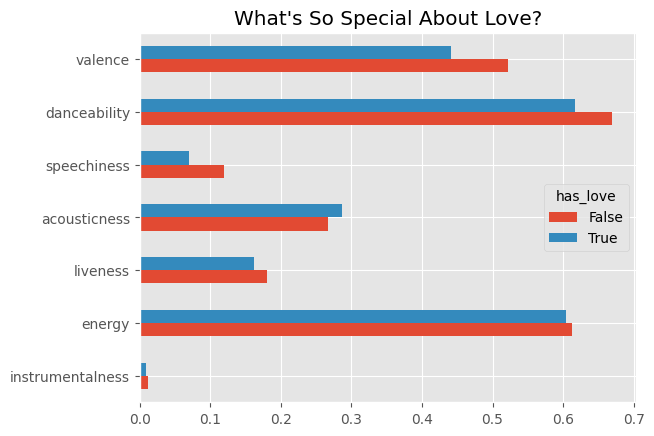

In [92]:
transposed_love.get(['False', 'True']).plot(kind='barh', title="What's So Special About Love?");
plt.show()

<!-- END QUESTION -->



**Question 4.6. ⭐️⭐️** Let's generalize this analysis to any word, not just `'love'`. Define a function called `word_analysis` that takes two arguments:
- `word`, which can be any word that appears in at least one `'track_name'`. The input word can be capitalized any way; the function should not be case sensitive.
- `draw_plot`, which should be a Boolean value corresponding to whether or not a bar chart should be drawn. By setting `draw_plot=False` in the parameter list in the function definition, we make `draw_plot` an optional argument whose default value is `False`. If not `draw_plot` is not specified by the caller of the function, the function will not draw the plot.

If `draw_plot` is `True`, this function should produce a horizontal bar chart similar to the one you produced in the last question, except it will group songs based on whether or not their `'track_name'` contains the input word (as opposed to `'love'`). The bars should be ordered in the same way as described in the previous question, and the title of the plot should be of the same format, with just the first letter of the input word capitalized.

In all cases, `word_analysis` should return a DataFrame with 7 rows, in any order, representing the 7 audio features, and 3 columns:
- The `'False'` column should contain the mean values of all audio features, among songs that do not contain the given word in the `'track_name'`.
- The `'True'` column should contain the mean values of all audio features, among songs that do contain the given word in the `'track_name'`.
- `'AbsDiff'` should contain the absolute difference between the `'False'` and `'True'` columns.

For example, `word_analysis('rEVENge', True)` should return the following DataFrame:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>has_word</th>
      <th>False</th>
      <th>True</th>
      <th>AbsDiff</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>instrumentalness</th>
      <td>0.012053</td>
      <td>0.00203</td>
      <td>0.010023</td>
    </tr>
    <tr>
      <th>liveness</th>
      <td>0.179285</td>
      <td>0.10600</td>
      <td>0.073285</td>
    </tr>
    <tr>
      <th>danceability</th>
      <td>0.667951</td>
      <td>0.74600</td>
      <td>0.078049</td>
    </tr>
    <tr>
      <th>speechiness</th>
      <td>0.117862</td>
      <td>0.25900</td>
      <td>0.141138</td>
    </tr>
    <tr>
      <th>valence</th>
      <td>0.520340</td>
      <td>0.18000</td>
      <td>0.340340</td>
    </tr>
    <tr>
      <th>energy</th>
      <td>0.612145</td>
      <td>0.25100</td>
      <td>0.361145</td>
    </tr>
    <tr>
      <th>acousticness</th>
      <td>0.267314</td>
      <td>0.78200</td>
      <td>0.514686</td>
    </tr>
  </tbody>
</table>

and display the following plot:

<img src='revenge.png'>


*Notes*: 
- Your function does not need to work on input words not in the title of some song in `songs`. For example, it's okay if `word_analysis('znvlox')` errors.
- When checking whether a song title contains the input word, add the optional second argument `regex=False` inside your call to the method `.str.contains()`. You don't need to understand what this does, but please include it, as it will be important later on!

*Hint*: To make sure that the first letter of the input word is capitalized when setting the title of your plot, use one of the string methods [detailed here](https://docs.python.org/3/library/stdtypes.html#string-methods).

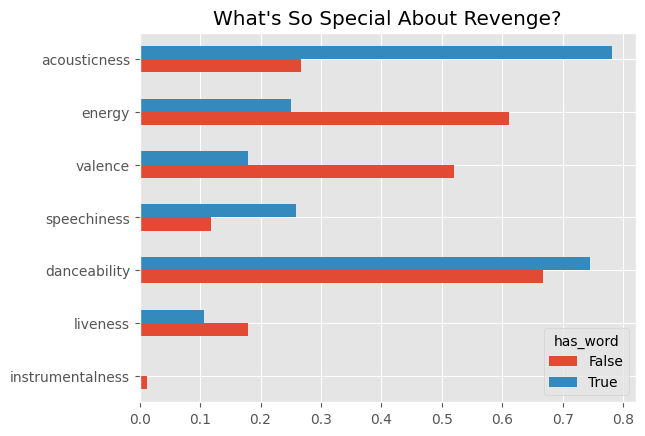

has_word             False     True   AbsDiff
instrumentalness  0.012053  0.00203  0.010023
liveness          0.179285  0.10600  0.073285
danceability      0.667951  0.74600  0.078049
speechiness       0.117862  0.25900  0.141138
valence           0.520340  0.18000  0.340340
energy            0.612145  0.25100  0.361145
acousticness      0.267314  0.78200  0.514686

In [93]:
def word_analysis(word, draw_plot=False):
    has_word_in_track = songs.get('track_name').str.contains(word, case=False, regex=False)
    has_word_df = songs.assign(has_word=has_word_in_track.apply(bool_to_str))
    word_means = has_word_df.groupby('has_word').mean().get(['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'])
    transposed_word = word_means.T 
    transposed_word = transposed_word.assign(AbsDiff = (transposed_word.get('False') - transposed_word.get('True')).abs())
    transposed_word = transposed_word.sort_values(by='AbsDiff')
    
    if draw_plot==True:
        transposed_word.get(['False', 'True']).plot(kind='barh', title="What's So Special About " + word.title() + "?");
        plt.show()
    
    return transposed_word #word_means #has_word_df 


# Test out your function. Feel free to change these inputs.
word_analysis('rEVENge', True) 

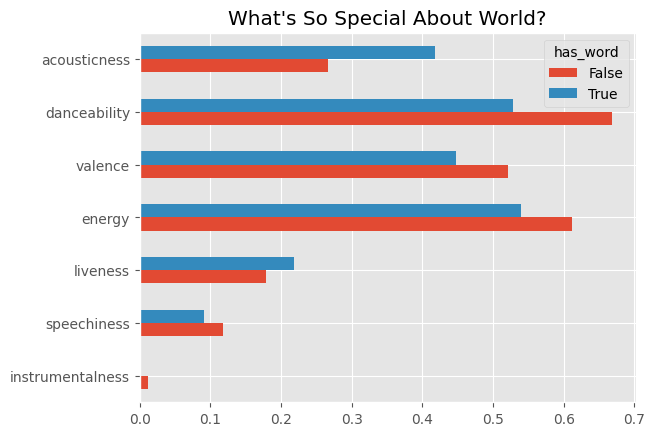

has_word             False      True   AbsDiff
instrumentalness  0.012083  0.002451  0.009632
speechiness       0.118014  0.090422  0.027592
liveness          0.179117  0.218844  0.039728
energy            0.612257  0.540222  0.072035
valence           0.520466  0.447089  0.073377
danceability      0.668475  0.528333  0.140142
acousticness      0.266984  0.417944  0.150960

In [94]:
word_analysis('WoRlD', True) 

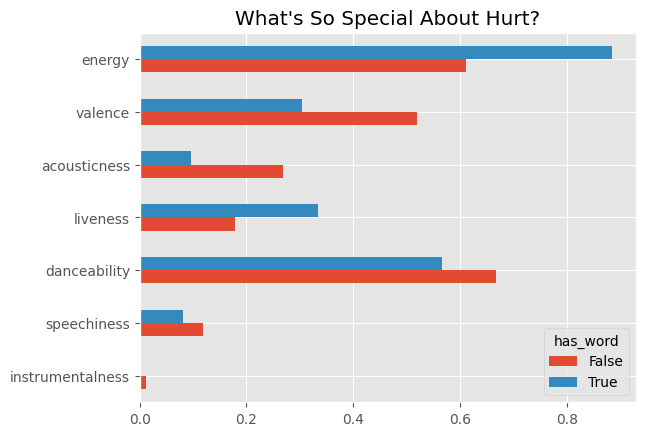

has_word             False    True   AbsDiff
instrumentalness  0.012054  0.0001  0.011954
speechiness       0.117931  0.0818  0.036131
danceability      0.668022  0.5660  0.102022
liveness          0.179196  0.3340  0.154804
acousticness      0.267583  0.0958  0.171783
valence           0.520292  0.3040  0.216292
energy            0.611896  0.8850  0.273104

In [95]:
word_analysis('huRt', True)

<!-- END QUESTION -->



Let's define the *polarity* of a word as the total absolute difference between the `'True'` and `'False'` columns, across all 7 audio features. If a word has high polarity, it means songs containing that word in the `'track_name'` are very musically different from songs without that word in the `'track_name'`. If a word has low polarity, it means songs containing that word and not containing that word in the `'track_name'` are musically similar.

**Question 4.7.** Define a function `polarity` that takes one input, a string representing a word that that appears in at least one `'track_name'` in `songs`, and returns the polarity of that word.

In [96]:
def polarity(word):
    has_word_in_track = songs.get('track_name').str.contains(word, case=False, regex=False)
    has_word_df = songs.assign(has_word=has_word_in_track.apply(bool_to_str))
    word_means = has_word_df.groupby('has_word').mean().get(['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'])
    transposed_word = word_means.T 
    transposed_word = transposed_word.assign(AbsDiff = (transposed_word.get('False') - transposed_word.get('True')).abs())
    get_total_abs_dif = transposed_word.get('AbsDiff').sum()
    
    return get_total_abs_dif

# Test out your function. Feel free to change the input.
polarity('hate')

0.5100413712521734

In [97]:
polarity('LOVe')

0.2322598118124654

In [98]:
polarity('worlD')

0.5134655445345994

On its own, the polarity of a single word doesn't tell us much. Instead, we need to look at the polarities of several words and compare them, to see which words are more polarizing than others.

Run the cell below to load in an array of words.

In [99]:
polarity_words = np.array(['love', 'hate', 'miracle', 'dead', 'feel', 'hold', 'about', 'and', 'christmas',
                           'you', 'wonder', 'hello', 'work', 'hurt', 'where', 'quiero', 'revenge', 'was'])

**Question 4.8.** Create an array called `polarity_words_ranked` containing the same words as `polarity_words` but ordered in descending order of polarity.

In [100]:
word_and_polarity = bpd.DataFrame().assign(
    word = polarity_words,
)
word_and_polarity = word_and_polarity.assign(word_polarity = word_and_polarity.get('word').apply(polarity))
word_and_polarity = word_and_polarity.sort_values(by='word_polarity', ascending=False)
word_and_polarity

word  word_polarity
15   quiero       1.573003
16  revenge       1.518666
2   miracle       1.080644
13     hurt       0.966089
10   wonder       0.698051
..      ...            ...
4      feel       0.314147
11    hello       0.307629
0      love       0.232260
9       you       0.162968
7       and       0.081709

[18 rows x 2 columns]

In [101]:
polarity_values = np.array([])

for word in polarity_words:
      polarity_values  = np.sort(np.append(polarity_values, polarity(word)))
#     if polarity(polarity_words[word]) == polarity_values[word]:
#         print(polarity_words[word])
    #    sorted_polarity_words = np.append(sorted_polarity_words, polarity_words[word])
      print('Word = ' + word + ', Polarity = ' + str(polarity(word)))

Word = love, Polarity = 0.2322598118124654
Word = hate, Polarity = 0.5100413712521734
Word = miracle, Polarity = 1.0806437221218652
Word = dead, Polarity = 0.4356702954938513
Word = feel, Polarity = 0.3141467677909294
Word = hold, Polarity = 0.3792832449182367
Word = about, Polarity = 0.3893369877932521
Word = and, Polarity = 0.0817088926407154
Word = christmas, Polarity = 0.5722064518391483
Word = you, Polarity = 0.16296845605539892
Word = wonder, Polarity = 0.6980512186681809
Word = hello, Polarity = 0.3076285652234419
Word = work, Polarity = 0.6401551606132444
Word = hurt, Polarity = 0.9660893600019584
Word = where, Polarity = 0.388239526682091
Word = quiero, Polarity = 1.573002714498629
Word = revenge, Polarity = 1.5186661574951035
Word = was, Polarity = 0.3364510842546454


In [102]:
polarity_values

array([0.08170889, 0.16296846, 0.23225981, 0.30762857, 0.31414677,
       0.33645108, 0.37928324, 0.38823953, 0.38933699, 0.4356703 ,
       0.51004137, 0.57220645, 0.64015516, 0.69805122, 0.96608936,
       1.08064372, 1.51866616, 1.57300271])

In [103]:
polarity_words_ranked = word_and_polarity.get('word').to_numpy()
polarity_words_ranked

array(['quiero', 'revenge', 'miracle', 'hurt', 'wonder', 'work',
       'christmas', 'hate', 'dead', 'about', 'where', 'hold', 'was',
       'feel', 'hello', 'love', 'you', 'and'], dtype=object)

You may notice that very common words, like `'and'` and `'was'`, aren't very polarizing. See if you can come up with other words that are either very polarizing or very "neutral," relative to the words in the array above.

Before we conclude this section, let's stop and notice something we did inadvertently. It turns out we can use some of the analysis we've done here to see how individual songs compare to the rest of the songs in the dataset. For example, let's see how `'The Weeknd'`'s song `'A Tale By Quincy'` stacks up against the rest of the songs in the weekly top 200. Our `word_analysis` function should work even if we pass in phrases, so we can use it to compare songs with `'A Tale By Quincy'` in the title to songs without that string in the title. As you might expect, the only song in the dataset with `'A Tale By Quincy'` as part of the title is `'A Tale By Quincy'` itself. 

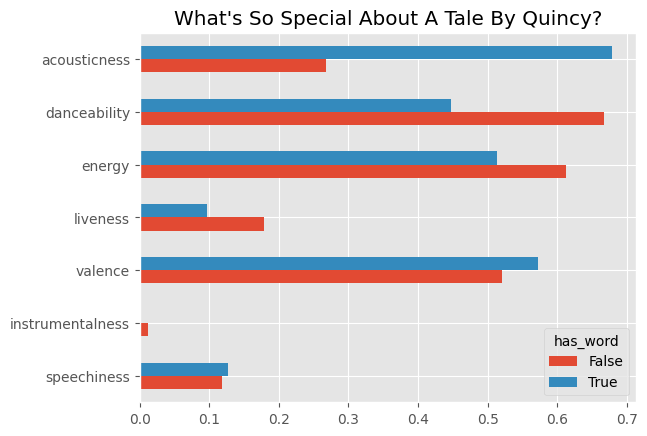

has_word             False     True   AbsDiff
speechiness       0.117913  0.12700  0.009087
instrumentalness  0.012054  0.00003  0.012024
valence           0.520187  0.57200  0.051813
liveness          0.179289  0.09600  0.083289
energy            0.612042  0.51300  0.099042
danceability      0.668068  0.44700  0.221068
acousticness      0.267355  0.67900  0.411645

In [104]:
word_analysis('A Tale By Quincy', True)

The resulting analysis shows, for example, that `'A Tale By Quincy'` is much more acoustic than a typical song on the weekly top 200. Run the cell below to listen for yourself and see if you agree.

In [105]:
play_spotify('spotify:track:759ndr57jb0URg4j9YSWml')

Of course, we wouldn't be able to isolate specific songs by name like this if multiple artists have a song by the same name, or if the full song title is included in other song titles. But for most songs, this does work! 

The cell below sets up an interactive widget, which allows you to choose popular songs in `charts` from a dropdown menu, lets you listen to a clip of that song, and displays the plot from your `word_analysis` function showing what makes that song stand out from others in our dataset.

Run the cell below to check it out and try changing the song. Songs are sorted first by artist name in alphabetical order, then by song name in alphabetical order.

Dropdown(description='Song', index=118, layout=Layout(width='525px'), options=('Mood (feat. iann dior), by 24k…

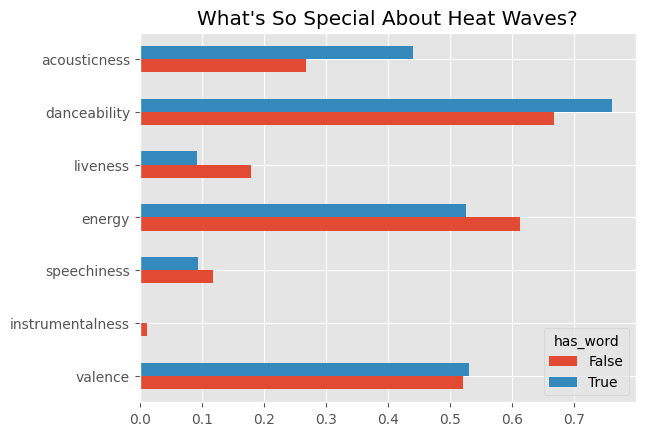

In [106]:
# Run this cell. Don't change any of the code.
default_song = 'Heat Waves, by Glass Animals'

song_options = (charts[(charts.get('country') == 'United States') & (charts.get('rank') < 20)]
                .groupby(['track_name', 'artist_names']).median()
                .reset_index()
                .sort_values(by=['artist_names', 'track_name'])
                )
song_options = np.array(song_options.get('track_name') + ', by ' + song_options.get('artist_names'))
song_widget_spotify = widgets.Dropdown(options=song_options, description='Song', layout={'width': '525px'}, value=default_song)

def format_analysis(song_string):
    title, artist = song_string.split(', by ')
    filtered = charts[(charts.get('track_name') == title) & (charts.get('artist_names') == artist)]
    uri = filtered.get('uri').iloc[0]
    absorb = word_analysis(title, True)
    display(HTML(f'<h3>Below, preview the song {song_string} and see what makes this song special compared to other top songs!</h3>'))
    play_spotify(uri)

def change_analysis(change):
    if change['name'] == 'value' and change['new'] != change['old']:
        clear_output()
        display(song_widget_spotify)
        format_analysis(song_widget_spotify.value)

display(song_widget_spotify)
format_analysis(default_song)
song_widget_spotify.observe(change_analysis)

<a id='section5'></a>
## Section 5: The Test of Time ⌛️

<small>(<a href="#outline">return to the outline</a>)</small>

In the last three sections, we've worked with the audio features of songs. We haven't yet used any of the date information we have available – that is, we haven't looked at the `'week'` or `'release_date'` columns in `charts`.  In this section, we'll switch our attention to these columns, to study how the "age" of top songs in `charts` has changed over time.

Run the cell below to load in the `charts` DataFrame again. 

In [107]:
charts = bpd.read_csv('weekly_charts.csv')
charts

week  rank              track_name  \
0      2021-02-04     1         drivers license   
1      2021-02-04     2               Good Days   
2      2021-02-04     3         Save Your Tears   
3      2021-02-04     4  Mood (feat. iann dior)   
4      2021-02-04     4  Mood (feat. iann dior)   
...           ...   ...                     ...   
70178  2022-07-14   196       Get Into It (Yuh)   
70179  2022-07-14   197              Fancy Like   
70180  2022-07-14   198            Stick Season   
70181  2022-07-14   199        Call Out My Name   
70182  2022-07-14   200               Good Days   

                                        uri release_date  streams  \
0      spotify:track:7lPN2DXiMsVn7XUKtOW1CS   2021-01-08  2054319   
1      spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   916516   
2      spotify:track:5QO79kh1waicV47BqGRL3g   2020-03-20   866067   
3      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
4      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
...                                     ...          ...      ...   
70178  spotify:track:0W6I02J9xcqK8MtSeosEXb   2021-06-25  1592100   
70179  spotify:track:58UKC45GPNTflCN6nwCUeF   2022-01-21  1590126   
70180  spotify:track:0GNVXNz7Jkicfk2mp5OyG5   2022-07-08  1583302   
70181  spotify:track:09mEdoA6zrmBPgTEN5qXmN   2018-03-30  1583235   
70182  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25  1579212   

              artist_names artist_individual  \
0           Olivia Rodrigo    Olivia Rodrigo   
1                      SZA               SZA   
2               The Weeknd        The Weeknd   
3      24kGoldn, iann dior          24kGoldn   
4      24kGoldn, iann dior         iann dior   
...                    ...               ...   
70178             Doja Cat          Doja Cat   
70179         Walker Hayes      Walker Hayes   
70180           Noah Kahan        Noah Kahan   
70181           The Weeknd        The Weeknd   
70182                  SZA               SZA   

                                   artist_id               artist_genre  ...  \
0      spotify:artist:1McMsnEElThX1knmY4oliG                        pop  ...   
1      spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   
2      spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
3      spotify:artist:6fWVd57NKTalqvmjRd2t8Z                   cali rap  ...   
4      spotify:artist:6ASri4ePR7RlsvIQgWPJpS                melodic rap  ...   
...                                      ...                        ...  ...   
70178  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                  dance pop  ...   
70179  spotify:artist:7sKxqpSqbIzphAKAhrqvlf        modern country rock  ...   
70180  spotify:artist:2RQXRUsr4IW1f3mKyKsy4B                        pop  ...   
70181  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
70182  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0        1    -8.761       0.0601        0.7210          0.000013    0.1050   
1        0    -8.370       0.0583        0.4990          0.000008    0.6880   
2        1    -5.487       0.0309        0.0212          0.000012    0.5430   
3        0    -3.558       0.0369        0.2210          0.000000    0.2720   
4        0    -3.558       0.0369        0.2210          0.000000    0.2720   
...    ...       ...          ...           ...               ...       ...   
70178    0    -6.029       0.1620        0.3150          0.000034    0.0894   
70179    1    -6.459       0.0600        0.1110          0.000000    0.3150   
70180    1    -6.935       0.0651        0.7990          0.000000    0.0966   
70181    1    -4.954       0.0356        0.1700          0.000000    0.3070   
70182    0    -8.370       0.0583        0.4990          0.000008    0.6880   

       valence    tempo  duration        country  
0        0.132  143.874    242014

From the DataFrame preview, it looks like `'week'` and `'release_date'` are given as strings in `'YYYY-MM-DD'` format. Unfortunately, some tracks have an incomplete `'release_date'`, in the form `'YYYY'` or `'YYYY-MM'`. 

**Question 5.1.** What proportion of the rows of `charts` have a `'release_date'` of the form `'YYYY'`, with just a year? Save your result as `year_only`. Similarly, what proportion of the rows of `charts` have a `'release_date'` of the form `'YYYY-MM'`, with just a year and month? Save your result as `year_month_only`.

In [108]:
all_release_dates = charts.get('release_date').shape[0] 
all_release_dates

70183

In [109]:
just_year = charts[(charts.get('release_date').str.len()==4)]
just_year

week  rank                                         track_name  \
158    2021-02-04   104                               Don't Stop Believin'   
244    2021-02-04   165                                      Star Shopping   
261    2021-02-04   178                                     Mr. Brightside   
284    2021-02-04   195                                  Thinking out Loud   
448    2021-02-11   105                               Don't Stop Believin'   
...           ...   ...                                                ...   
69912  2022-07-14     1  Running Up That Hill (A Deal With God) - 2018 ...   
70021  2022-07-14    78                                     Mr. Brightside   
70044  2022-07-14    92                                        Money Trees   
70045  2022-07-14    92                                        Money Trees   
70116  2022-07-14   147                               Don't Stop Believin'   

                                        uri release_date   streams  \
158    spotify:track:4bHsxqR3GMrXTxEPLuK5ue         1981    271519   
244    spotify:track:30bqVoKjX479ab90a8Pafp         2015    222561   
261    spotify:track:003vvx7Niy0yvhvHt4a68B         2004    215816   
284    spotify:track:1Slwb6dOYkBlWal1PGtnNg         2013    206765   
448    spotify:track:4bHsxqR3GMrXTxEPLuK5ue         1981    266157   
...                                     ...          ...       ...   
69912  spotify:track:75FEaRjZTKLhTrFGsfMUXR         1985  10934427   
70021  spotify:track:003vvx7Niy0yvhvHt4a68B         2004   2219982   
70044  spotify:track:2HbKqm4o0w5wEeEFXm2sD4         2012   2134265   
70045  spotify:track:2HbKqm4o0w5wEeEFXm2sD4         2012   2134265   
70116  spotify:track:4bHsxqR3GMrXTxEPLuK5ue         1981   1734645   

                   artist_names artist_individual  \
158                     Journey           Journey   
244                    Lil Peep          Lil Peep   
261                 The Killers       The Killers   
284                  Ed Sheeran        Ed Sheeran   
448                     Journey           Journey   
...                         ...               ...   
69912                 Kate Bush         Kate Bush   
70021               The Killers       The Killers   
70044  Kendrick Lamar, Jay Rock    Kendrick Lamar   
70045  Kendrick Lamar, Jay Rock          Jay Rock   
70116                   Journey           Journey   

                                   artist_id      artist_genre  ... mode  \
158    spotify:artist:0rvjqX7ttXeg3mTy8Xscbt       mellow gold  ...    1   
244    spotify:artist:2kCcBybjl3SAtIcwdWpUe3    lgbtq+ hip hop  ...    0   
261    spotify:artist:0C0XlULifJtAgn6ZNCW2eu       modern rock  ...    1   
284    spotify:artist:6eUKZXaKkcviH0Ku9w2n3V            uk pop  ...    1   
448    spotify:artist:0rvjqX7ttXeg3mTy8Xscbt      classic rock  ...    1   
...                                      ...               ...  ...  ...   
69912  spotify:artist:1aSxMhuvixZ8h9dK9jIDwL          art rock  ...    0   
70021  spotify:artist:0C0XlULifJtAgn6ZNCW2eu  alternative rock  ...    1   
70044  spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg    west coast rap  ...    1   
70045  spotify:artist:28ExwzUQsvgJooOI0X1mr3               rap  ...    1   
70116  spotify:artist:0rvjqX7ttXeg3mTy8Xscbt        album rock  ...    1   

       loudness  speechiness  acousticness  instrumentalness  liveness  \
158      -9.072       0.0363       0.12700           0.00000    0.4470   
244      -9.934       0.0616       0.09670           0.01840    0.1150   
261      -5.230       0.0747       0.00121           0.00000    0.0995   
284      -6.061       0.0295       0.47400           0.00000    0.1840   
448      -9.072       0.0363       0.12700           0.00000    0.4470   
...         ...          ...           ...               ...       ...   
69912   -13.123       0.0550       0.72000           0.00314    0.0604   
70021    -5.230       0.0747       0.00121           0.00000    0.0995   
70044    -7.355    

In [110]:
count_just_year = just_year.shape[0]
count_just_year

1010

In [111]:
year_and_month = charts[(charts.get('release_date').str.len()==7)]
year_and_month

week  rank                             track_name  \
6391   2021-06-24   187                        Brown Eyed Girl   
6713   2021-07-01   193                        Brown Eyed Girl   
6988   2021-07-08   169                        Brown Eyed Girl   
7303   2021-07-15   171                        Brown Eyed Girl   
7650   2021-07-22   191                        Brown Eyed Girl   
...           ...   ...                                    ...   
61590  2021-12-23    36         Jingle Bells - Remastered 1999   
61648  2021-12-23    76  Mistletoe And Holly - Remastered 1999   
61867  2021-12-30    37         Jingle Bells - Remastered 1999   
61923  2021-12-30    78  Mistletoe And Holly - Remastered 1999   
69824  2022-07-07   135                        Brown Eyed Girl   

                                        uri release_date  streams  \
6391   spotify:track:3yrSvpt2l1xhsV9Em88Pul      1967-09   225169   
6713   spotify:track:3yrSvpt2l1xhsV9Em88Pul      1967-09   231085   
6988   spotify:track:3yrSvpt2l1xhsV9Em88Pul      1967-09   225102   
7303   spotify:track:3yrSvpt2l1xhsV9Em88Pul      1967-09   226278   
7650   spotify:track:3yrSvpt2l1xhsV9Em88Pul      1967-09   225639   
...                                     ...          ...      ...   
61590  spotify:track:4HEOgBHRCExyYVeTyrXsnL      1957-09  3960486   
61648  spotify:track:7faDzZnZYqTyYThx2sbHVQ      1957-09  2895088   
61867  spotify:track:4HEOgBHRCExyYVeTyrXsnL      1957-09  3379395   
61923  spotify:track:7faDzZnZYqTyYThx2sbHVQ      1957-09  2461442   
69824  spotify:track:3yrSvpt2l1xhsV9Em88Pul      1967-09  1749389   

        artist_names artist_individual                              artist_id  \
6391    Van Morrison      Van Morrison  spotify:artist:44NX2ffIYHr6D4n7RaZF7A   
6713    Van Morrison      Van Morrison  spotify:artist:44NX2ffIYHr6D4n7RaZF7A   
6988    Van Morrison      Van Morrison  spotify:artist:44NX2ffIYHr6D4n7RaZF7A   
7303    Van Morrison      Van Morrison  spotify:artist:44NX2ffIYHr6D4n7RaZF7A   
7650    Van Morrison      Van Morrison  spotify:artist:44NX2ffIYHr6D4n7RaZF7A   
...              ...               ...                                    ...   
61590  Frank Sinatra     Frank Sinatra  spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0   
61648  Frank Sinatra     Frank Sinatra  spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0   
61867  Frank Sinatra     Frank Sinatra  spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0   
61923  Frank Sinatra     Frank Sinatra  spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0   
69824   Van Morrison      Van Morrison  spotify:artist:44NX2ffIYHr6D4n7RaZF7A   

            artist_genre  ... mode  loudness  speechiness  acousticness  \
6391   singer-songwriter  ...    1   -10.964       0.0376         0.185   
6713                rock  ...    1   -10.964       0.0376         0.185   
6988   singer-songwriter  ...    1   -10.964       0.0376         0.185   
7303        classic rock  ...    1   -10.964       0.0376         0.185   
7650                folk  ...    1   -10.964       0.0376         0.185   
...                  ...  ...  ...       ...          ...           ...   
61590     easy listening  ...    1   -13.119       0.0498         0.727   
61648    adult standards  ...    1   -14.405       0.0404         0.804   
61867     easy listening  ...    1   -13.119       0.0498         0.727   
61923     easy listening  ...    1   -14.405       0.0404         0.804   
69824        mellow gold  ...    1   -10.964       0.0376         0.185   

       instrumentalness  liveness  valence    tempo  duration        country  
6391                0.0    0.4060    0.908  150.566    183307         Canada  
6713                0.0    0.4060    0.908  150.566    183307         Canada  
6988                0.0    0.4060    0.908  150.566    183307         Canada  
7303                0.0    0.4060    0.908  150.566    183307         Canada  
7650                0.0    0.4060    0.908  150.566    183307         Canada  
...                 ...       ...      ... 

In [112]:
year_only = just_year.shape[0]/charts.shape[0]
year_month_only = year_and_month.shape[0]/charts.shape[0]

print("The proportion of songs in `charts` that have a release_date in the form 'YYYY' is " + str(round(year_only, 7)) + ".")
print("The proportion of songs in `charts` that have a release_date in the form 'YYYY-MM' is " + str(round(year_month_only, 7)) + ".")

The proportion of songs in `charts` that have a release_date in the form 'YYYY' is 0.0143909.
The proportion of songs in `charts` that have a release_date in the form 'YYYY-MM' is 0.0004844.


For consistency, let's input the missing months and days where necessary, so that all dates in `charts` will be in the same format. We don't actually know when these songs were released, so we'll just choose to handle the missing months and days by replacing them with `'01'`. That is, if a song has just a year listed for its `'release_date'`, we'll assume it was released on January 1st of that year. Similarly, if a song has just a year and month listed, we'll assume it was released on the first of that month.

**Question 5.2.** Replace the missing months and days in the `'release_date'` column of `charts` with `'01'` as described.

In [113]:
def add_missing_values(year):
    if len(year)==7:
        year = year + '-01'
    elif len(year)==4:
        year = year + '-01-01'
    return year

In [114]:
add_missing_values('2010')

'2010-01-01'

In [115]:
add_missing_values('2010-05')

'2010-05-01'

In [116]:
dates_filled = charts.assign(release_date = charts.get('release_date').apply(add_missing_values))
dates_filled

week  rank              track_name  \
0      2021-02-04     1         drivers license   
1      2021-02-04     2               Good Days   
2      2021-02-04     3         Save Your Tears   
3      2021-02-04     4  Mood (feat. iann dior)   
4      2021-02-04     4  Mood (feat. iann dior)   
...           ...   ...                     ...   
70178  2022-07-14   196       Get Into It (Yuh)   
70179  2022-07-14   197              Fancy Like   
70180  2022-07-14   198            Stick Season   
70181  2022-07-14   199        Call Out My Name   
70182  2022-07-14   200               Good Days   

                                        uri release_date  streams  \
0      spotify:track:7lPN2DXiMsVn7XUKtOW1CS   2021-01-08  2054319   
1      spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   916516   
2      spotify:track:5QO79kh1waicV47BqGRL3g   2020-03-20   866067   
3      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
4      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
...                                     ...          ...      ...   
70178  spotify:track:0W6I02J9xcqK8MtSeosEXb   2021-06-25  1592100   
70179  spotify:track:58UKC45GPNTflCN6nwCUeF   2022-01-21  1590126   
70180  spotify:track:0GNVXNz7Jkicfk2mp5OyG5   2022-07-08  1583302   
70181  spotify:track:09mEdoA6zrmBPgTEN5qXmN   2018-03-30  1583235   
70182  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25  1579212   

              artist_names artist_individual  \
0           Olivia Rodrigo    Olivia Rodrigo   
1                      SZA               SZA   
2               The Weeknd        The Weeknd   
3      24kGoldn, iann dior          24kGoldn   
4      24kGoldn, iann dior         iann dior   
...                    ...               ...   
70178             Doja Cat          Doja Cat   
70179         Walker Hayes      Walker Hayes   
70180           Noah Kahan        Noah Kahan   
70181           The Weeknd        The Weeknd   
70182                  SZA               SZA   

                                   artist_id               artist_genre  ...  \
0      spotify:artist:1McMsnEElThX1knmY4oliG                        pop  ...   
1      spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   
2      spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
3      spotify:artist:6fWVd57NKTalqvmjRd2t8Z                   cali rap  ...   
4      spotify:artist:6ASri4ePR7RlsvIQgWPJpS                melodic rap  ...   
...                                      ...                        ...  ...   
70178  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                  dance pop  ...   
70179  spotify:artist:7sKxqpSqbIzphAKAhrqvlf        modern country rock  ...   
70180  spotify:artist:2RQXRUsr4IW1f3mKyKsy4B                        pop  ...   
70181  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
70182  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0        1    -8.761       0.0601        0.7210          0.000013    0.1050   
1        0    -8.370       0.0583        0.4990          0.000008    0.6880   
2        1    -5.487       0.0309        0.0212          0.000012    0.5430   
3        0    -3.558       0.0369        0.2210          0.000000    0.2720   
4        0    -3.558       0.0369        0.2210          0.000000    0.2720   
...    ...       ...          ...           ...               ...       ...   
70178    0    -6.029       0.1620        0.3150          0.000034    0.0894   
70179    1    -6.459       0.0600        0.1110          0.000000    0.3150   
70180    1    -6.935       0.0651        0.7990          0.000000    0.0966   
70181    1    -4.954       0.0356        0.1700          0.000000    0.3070   
70182    0    -8.370       0.0583        0.4990          0.000008    0.6880   

       valence    tempo  duration        country  
0        0.132  143.874    242014

In [117]:
charts = dates_filled
charts    

week  rank              track_name  \
0      2021-02-04     1         drivers license   
1      2021-02-04     2               Good Days   
2      2021-02-04     3         Save Your Tears   
3      2021-02-04     4  Mood (feat. iann dior)   
4      2021-02-04     4  Mood (feat. iann dior)   
...           ...   ...                     ...   
70178  2022-07-14   196       Get Into It (Yuh)   
70179  2022-07-14   197              Fancy Like   
70180  2022-07-14   198            Stick Season   
70181  2022-07-14   199        Call Out My Name   
70182  2022-07-14   200               Good Days   

                                        uri release_date  streams  \
0      spotify:track:7lPN2DXiMsVn7XUKtOW1CS   2021-01-08  2054319   
1      spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   916516   
2      spotify:track:5QO79kh1waicV47BqGRL3g   2020-03-20   866067   
3      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
4      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
...                                     ...          ...      ...   
70178  spotify:track:0W6I02J9xcqK8MtSeosEXb   2021-06-25  1592100   
70179  spotify:track:58UKC45GPNTflCN6nwCUeF   2022-01-21  1590126   
70180  spotify:track:0GNVXNz7Jkicfk2mp5OyG5   2022-07-08  1583302   
70181  spotify:track:09mEdoA6zrmBPgTEN5qXmN   2018-03-30  1583235   
70182  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25  1579212   

              artist_names artist_individual  \
0           Olivia Rodrigo    Olivia Rodrigo   
1                      SZA               SZA   
2               The Weeknd        The Weeknd   
3      24kGoldn, iann dior          24kGoldn   
4      24kGoldn, iann dior         iann dior   
...                    ...               ...   
70178             Doja Cat          Doja Cat   
70179         Walker Hayes      Walker Hayes   
70180           Noah Kahan        Noah Kahan   
70181           The Weeknd        The Weeknd   
70182                  SZA               SZA   

                                   artist_id               artist_genre  ...  \
0      spotify:artist:1McMsnEElThX1knmY4oliG                        pop  ...   
1      spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   
2      spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
3      spotify:artist:6fWVd57NKTalqvmjRd2t8Z                   cali rap  ...   
4      spotify:artist:6ASri4ePR7RlsvIQgWPJpS                melodic rap  ...   
...                                      ...                        ...  ...   
70178  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                  dance pop  ...   
70179  spotify:artist:7sKxqpSqbIzphAKAhrqvlf        modern country rock  ...   
70180  spotify:artist:2RQXRUsr4IW1f3mKyKsy4B                        pop  ...   
70181  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
70182  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0        1    -8.761       0.0601        0.7210          0.000013    0.1050   
1        0    -8.370       0.0583        0.4990          0.000008    0.6880   
2        1    -5.487       0.0309        0.0212          0.000012    0.5430   
3        0    -3.558       0.0369        0.2210          0.000000    0.2720   
4        0    -3.558       0.0369        0.2210          0.000000    0.2720   
...    ...       ...          ...           ...               ...       ...   
70178    0    -6.029       0.1620        0.3150          0.000034    0.0894   
70179    1    -6.459       0.0600        0.1110          0.000000    0.3150   
70180    1    -6.935       0.0651        0.7990          0.000000    0.0966   
70181    1    -4.954       0.0356        0.1700          0.000000    0.3070   
70182    0    -8.370       0.0583        0.4990          0.000008    0.6880   

       valence    tempo  duration        country  
0        0.132  143.874    242014

**Question 5.3.** Find the song in `charts` with the earliest `'release_date'`. Save the name of this song to `oldest_song` and save the `'artist_names'` associated with this song to `oldest_song_artists`.

This song has stood the test of time – you'll see why!

In [118]:
charts_by_date = charts.sort_values(by='release_date', ascending=True)
charts_by_date

week  rank                          track_name  \
13486  2021-12-09    16                     White Christmas   
13768  2021-12-16    15                     White Christmas   
60559  2021-11-25   106                     White Christmas   
60558  2021-11-25   106                     White Christmas   
13767  2021-12-16    15                     White Christmas   
...           ...   ...                                 ...   
69994  2022-07-14    59                      Paris to Tokyo   
22761  2022-07-14   132  GRAVITY (FEAT. TYLER, THE CREATOR)   
69966  2022-07-14    40  GRAVITY (FEAT. TYLER, THE CREATOR)   
70007  2022-07-14    68                       ROLLING STONE   
47954  2022-07-14   145                        Soy El Unico   

                                        uri release_date  streams  \
13486  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01   843088   
13768  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01   871364   
60559  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01  2026829   
60558  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01  2026829   
13767  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01   871364   
...                                     ...          ...      ...   
69994  spotify:track:5QvW5lK6mkfTegpAK9JOO7   2022-07-08  2519273   
22761  spotify:track:3zakx7RAwdkUQlOoQ7SJRt   2022-07-08   256131   
69966  spotify:track:3zakx7RAwdkUQlOoQ7SJRt   2022-07-08  2969222   
70007  spotify:track:0e0JshRej2NwT7jahEmv52   2022-07-08  2310205   
47954  spotify:track:4pKhxDtzoLPVy4GzW1ibAz   2022-07-13   932939   

                                            artist_names  \
13486  Bing Crosby, Ken Darby Singers, John Scott Tro...   
13768  Bing Crosby, Ken Darby Singers, John Scott Tro...   
60559  Bing Crosby, Ken Darby Singers, John Scott Tro...   
60558  Bing Crosby, Ken Darby Singers, John Scott Tro...   
13767  Bing Crosby, Ken Darby Singers, John Scott Tro...   
...                                                  ...   
69994                       Fivio Foreign, The Kid LAROI   
22761          Brent Faiyaz, DJ Dahi, Tyler, The Creator   
69966          Brent Faiyaz, DJ Dahi, Tyler, The Creator   
70007                                       Brent Faiyaz   
47954                              Yahritza Y Su Esencia   

                        artist_individual  \
13486                         Bing Crosby   
13768                   Ken Darby Singers   
60559  John Scott Trotter & His Orchestra   
60558                   Ken Darby Singers   
13767                         Bing Crosby   
...                                   ...   
69994                       Fivio Foreign   
22761                  Tyler, The Creator   
69966                             DJ Dahi   
70007                        Brent Faiyaz   
47954               Yahritza Y Su Esencia   

                                   artist_id     artist_genre  ... mode  \
13486  spotify:artist:6ZjFtWeHP9XN7FeKSUe80S   easy listening  ...    1   
13768  spotify:artist:69UfPJgUmFFAVT740qGVZi                0  ...    1   
60559  spotify:artist:735L650pvygCZZlPMyHqsN      light music  ...    1   
60558  spotify:artist:69UfPJgUmFFAVT740qGVZi                0  ...    1   
13767  spotify:artist:6ZjFtWeHP9XN7FeKSUe80S  adult standards  ...    1   
...                                      ...              ...  ...  ...   
69994  spotify:artist:14CHVeJGrR5xgUGQFV5BVM              rap  ...    0   
22761  spotify:artist:4V8LLVI7PbaPR0K2TGSxFF              rap  ...    0   
69966  spotify:artist:5BozIJTTNCufaZpjhy2der                0  ...    0   
70007  spotify:artist:3tlXnStJ1fFhdScmQeLpuG              pop  ...    0   
47954  spotify:artist:51ZSh80McCt7vbqHouzW0A                0  ...    0   

       loudness  speechiness  acousticness  instrumentalness  liveness  \
13486   -16.485       0.0381        0.6730          0.353000     0.338   
13768   -16.485       0.0381        0.6730          0.353000     0.338   
60559   -16.485       0.0381        0.6730

In [119]:
oldest_song = charts_by_date.get('track_name').iloc[0]
oldest_song_artists = charts_by_date.get('artist_names').iloc[0]

print('The oldest song in `charts` is ' + oldest_song + ' by ' + oldest_song_artists)

The oldest song in `charts` is White Christmas by Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra


Let’s try to calculate the time between when this song was first released and when this song was in the weekly top 200 most recently. To tackle this problem and others like it, we'll write a general function to calculate the time between any two dates.

**Question 5.4. ⭐️⭐️** Complete the implementation of the function `weeks_between`, which takes in two dates as lists in the form `[year, month, day]` and returns the number of **full weeks** between the two dates. You may assume the second date comes after the first.

Here, we'll define a full week as 7 days. For example, if there are 200 days between two dates, we'd say there are 28 *full* weeks between the two dates, since $\frac{200}{7} = 28.571$. 

Example behavior is given below.

```py
# There are 11 days between March 14th, 2022 and March 25th, 2022.
# This corresponds to 1 full week.
>>> weeks_between([2022, 3, 14], [2022, 3, 25])
1

# There are 805 days between November 26th, 1998 and February 9th, 2001, not counting leap year days.
# This corresponds to 115 full weeks.
>>> weeks_between([1998, 11, 26], [2001, 2, 9])
115
```

To help you, we've provided a function called `days_between` and a [video walkthrough of how it works](https://www.youtube.com/watch?v=6HOAk0GAqKU). Make sure you understand what this function does and how it works, because you'll want to make use of it inside `weeks_between`.

_Note_: **Don't factor in leap years** for the purposes of this question. We'll assume that every year has 365 days.

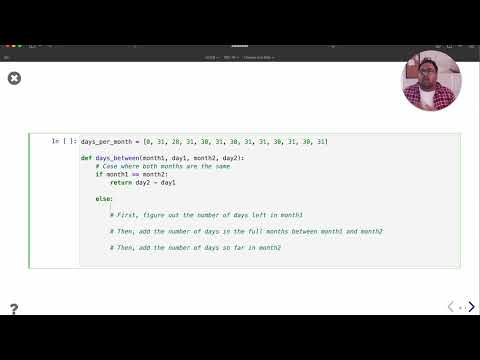

In [120]:
# Run this cell to view the walkthrough video.
YouTubeVideo('6HOAk0GAqKU')

In [121]:
# This function is provided. Watch the walkthrough video to understand what it does and how it works.
def days_between(month1, day1, month2, day2):
    
    # days_per_month[1] is the number of days in January, days_per_month[8] is the number of days in August, etc.
    days_per_month = np.array([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    
    # Case where both months are the same.
    if month1 == month2:
        return day2 - day1
    
    else:
        total_days = 0
        
        # First, figure out the number of days left in month1.
        total_days = total_days + days_per_month[month1] - day1
        
        # Then, add the number of days in the full months between month1 and month2.
        for full_month in np.arange(month1 + 1, month2):
            total_days = total_days + days_per_month[full_month]
            
        # Then, add the number of days so far in month2.
        total_days = total_days + day2
        
        return total_days

In [122]:
days_between(4, 28, 7, 14)

77

In [123]:
def weeks_between(date1, date2):
    # Store the year, day, and month for each date separately as ints.
    year1 = date1[0]
    month1 = date1[1]
    day1 = date1[2]
    year2 = date2[0]
    month2 = date2[1]
    day2 = date2[2]
   
    # Main idea: Find the total number of days between the two dates, then divide that by 7 and round down.
    total_days = 0
    month_to_days = np.array([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    month_difference = abs(month1 - month2)
    # Case 1: The dates are in the same year.
    if year1 == year2:
        if month1 != month2:
            # takes the difference between how many days are in month1 and how many have passed
            total_days_missing_in_month1 = month_to_days[month1] - day1
            # the number of days in month2 will of course be day2
            total_days_already_month2 = day2
            # takes the total number of days of the months in between
            total_days_between_months = month_to_days[month1+1:month2].sum()

            total_days = total_days_missing_in_month1 + total_days_already_month2 + total_days_between_months
        elif month1 == month2:
            total_days = abs(day1 - day2)

    # Case 2: The dates are in different years.
    if year1 != year2:
        ### difference in years, times 365
        total_days_between_years = (abs(year1 - year2)-1)*365
        ### takes the difference between the total ammount of days in the year and day1 + days up until the month before month1
        total_days_missing_in_year1 = 365 - (day1 + month_to_days[0:month1].sum())
        ### sums day2 + days up until the month before month2
        total_days_already_year2 = month_to_days[0:month2].sum() + day2 #365 - (day2 + month_to_days[month2+1:month_to_days[-1]].sum())

        total_days = total_days_missing_in_year1 + total_days_already_year2 + total_days_between_years
       
    # Convert to weeks and round down
    return int(total_days / 7)

In [124]:
date1 = [2021, 1, 8]
date2 = [2021, 2, 4]

year1 = date1[0]
month1 = date1[1]
day1 = date1[2]
year2 = date2[0]
month2 = date2[1]
day2 = date2[2]

   
# Main idea: Find the total number of days between the two dates, then divide that by 7 and round down.
total_days = 0
month_to_days = np.array([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

In [125]:
month1 = 1
month2 = 12

In [126]:
### takes the difference between the total ammount of days in the year and day1 + days up until the month before month1
total_days_missing_in_month1 = month_to_days[month1] - day1 #365 - (day1 + month_to_days[0:month1].sum())
### sums day2 + days up until the month before month2
total_days_already_month2 = day2 #month_to_days[0:month2].sum() + day2 - total_days_missing_in_month1 #365 - (day2 + month_to_days[month2+1:month_to_days[-1]].sum())

total_days_between_months = month_to_days[month1+1:month2].sum()


#total_days_missing_in_month1
total_days_missing_in_month1, total_days_already_month2, total_days_between_months

(23, 4, 303)

In [127]:
if year1 == year2:
        # Calculate the number of days between them.
        if month1 != month2:
            # takes the difference between how many days are in month1 and how many have passed
            total_days_missing_in_month1 = month_to_days[month1] - day1
            # the number of days in month2 will of course be day2
            total_days_already_month2 = day2
            # takes the total number of days of the months in between
            total_days_between_months = month_to_days[month1+1:month2].sum()

            total_days = total_days_missing_in_month1 + total_days_already_month2 + total_days_between_months
        elif month1 == month2:
            total_days = abs(day1 - day2)
        
total_days

330

In [128]:
abs(day1 - day2)

4

In [129]:
month_to_days[month1:month2].sum()

334

In [130]:
total_days_between_years = (abs(year1 - year2)-1) * 365
total_days_between_years

-365

In [131]:
total_days_missing_in_year1 = 365 - (day1 + month_to_days[0:month1].sum())
total_days_missing_in_year1

357

In [132]:
total_days_already_year2 = month_to_days[0:month2].sum() + day2
total_days_already_year2

338

In [133]:
total_days = total_days_missing_in_year1 + total_days_already_year2 + total_days_between_years
total_days       
    # Convert to weeks and round down
    #return int(total_days / 7)

330

In [134]:
total_weeks = int(total_days / 7)
total_weeks

47

In [135]:
weeks_between([2024, 4, 28], [2024, 7, 14])

11

In [136]:
weeks_between([2022, 3, 14], [2022, 3, 25])

1

In [137]:
weeks_between([1998, 11, 26], [2001, 2, 9])

115

In [138]:
weeks_between([2021, 1, 8], [2021, 2, 4])

3

Now that we have a function that can compute the number of weeks between any two dates, we can calculate the time between when `oldest_song` was first released and when it was in the weekly top 200 most recently.

Unfortunately, the dates in the `'release_date'` and `'week'` columns of `charts` are not lists in the form `[year, month, day]`, but are strings of the form `'YYYY-MM-DD'`. They need to be transformed before they can be used as input to `weeks_between`.  

We've done that work for you in the `convert_date_to_list` function below. It converts an input `date_str` of the form `'1998-11-26'` to a list of the form `[1998, 11, 26]`. Step by step, here's what it does:

1. Splits `date_str` by `'-'`. 
    - This takes `'1998-11-26'` and turns it into the list of strings `['1998', '11', '26']`.
    
2. Converts the list of strings into an array, and converts the data type of each element to an `int`. 
    - This takes `['1998', '11', '26']` and turns it into `np.array([1998, 11, 26])`.
    
3. Converts the array to a list and returns it.
    - The function returns the list `[1998, 11, 26]`.

In [139]:
def convert_date_to_list(date_str):
    return list(np.array(date_str.split('-')).astype(int))

convert_date_to_list('1998-11-26')

[1998, 11, 26]

**Question 5.5.** Calculate the time between the following two dates, in weeks: 
1. The release date of `oldest_song` by `oldest_song_artists`.
2. The most recent time in our dataset that `oldest_song` by `oldest_song_artists` was in the weekly top 200. 

Store the result in `weeks_since_release`. 

*Hint*: It's a good idea to check if your answer makes sense given the `'release_date'` of `oldest_song`.

In [140]:
charts_by_date.iloc[0]

week                                      2021-12-09
rank                                              16
track_name                           White Christmas
uri             spotify:track:4so0Wek9Ig1p6CRCHuINwW
release_date                              1942-01-01
                                ...                 
liveness                                       0.338
valence                                        0.247
tempo                                        130.503
duration                                      177480
country                                       Canada
Name: 13486, Length: 24, dtype: object

In [141]:
release_oldest_song = charts_by_date.get('release_date').iloc[0]
release_oldest_song_as_list = convert_date_to_list(release_oldest_song)
release_oldest_song_as_list

[1942, 1, 1]

In [142]:
first_release_df = charts_by_date[(charts_by_date.get('track_name') == oldest_song) & (charts_by_date.get('artist_names') == oldest_song_artists)]
first_release_df = first_release_df.sort_values(by='week') 
first_release_df

week  rank       track_name  \
60218  2021-11-18    70  White Christmas   
60217  2021-11-18    70  White Christmas   
12621  2021-11-18    36  White Christmas   
12620  2021-11-18    36  White Christmas   
12619  2021-11-18    36  White Christmas   
...           ...   ...              ...   
61826  2021-12-30    13  White Christmas   
14317  2021-12-30    12  White Christmas   
14318  2021-12-30    12  White Christmas   
14319  2021-12-30    12  White Christmas   
61825  2021-12-30    13  White Christmas   

                                        uri release_date  streams  \
60218  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01  3031376   
60217  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01  3031376   
12621  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01   584615   
12620  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01   584615   
12619  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01   584615   
...                                     ...          ...      ...   
61826  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01  5027647   
14317  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01  1022283   
14318  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01  1022283   
14319  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01  1022283   
61825  spotify:track:4so0Wek9Ig1p6CRCHuINwW   1942-01-01  5027647   

                                            artist_names  \
60218  Bing Crosby, Ken Darby Singers, John Scott Tro...   
60217  Bing Crosby, Ken Darby Singers, John Scott Tro...   
12621  Bing Crosby, Ken Darby Singers, John Scott Tro...   
12620  Bing Crosby, Ken Darby Singers, John Scott Tro...   
12619  Bing Crosby, Ken Darby Singers, John Scott Tro...   
...                                                  ...   
61826  Bing Crosby, Ken Darby Singers, John Scott Tro...   
14317  Bing Crosby, Ken Darby Singers, John Scott Tro...   
14318  Bing Crosby, Ken Darby Singers, John Scott Tro...   
14319  Bing Crosby, Ken Darby Singers, John Scott Tro...   
61825  Bing Crosby, Ken Darby Singers, John Scott Tro...   

                        artist_individual  \
60218  John Scott Trotter & His Orchestra   
60217                   Ken Darby Singers   
12621  John Scott Trotter & His Orchestra   
12620                   Ken Darby Singers   
12619                         Bing Crosby   
...                                   ...   
61826                   Ken Darby Singers   
14317                         Bing Crosby   
14318                   Ken Darby Singers   
14319  John Scott Trotter & His Orchestra   
61825                         Bing Crosby   

                                   artist_id     artist_genre  ... mode  \
60218  spotify:artist:735L650pvygCZZlPMyHqsN      light music  ...    1   
60217  spotify:artist:69UfPJgUmFFAVT740qGVZi                0  ...    1   
12621  spotify:artist:735L650pvygCZZlPMyHqsN      light music  ...    1   
12620  spotify:artist:69UfPJgUmFFAVT740qGVZi                0  ...    1   
12619  spotify:artist:6ZjFtWeHP9XN7FeKSUe80S           lounge  ...    1   
...                                      ...              ...  ...  ...   
61826  spotify:artist:69UfPJgUmFFAVT740qGVZi                0  ...    1   
14317  spotify:artist:6ZjFtWeHP9XN7FeKSUe80S           lounge  ...    1   
14318  spotify:artist:69UfPJgUmFFAVT740qGVZi                0  ...    1   
14319  spotify:artist:735L650pvygCZZlPMyHqsN      light music  ...    1   
61825  spotify:artist:6ZjFtWeHP9XN7FeKSUe80S  adult standards  ...    1   

       loudness  speechiness  acousticness  instrumentalness  liveness  \
60218   -16.485       0.0381         0.673             0.353     0.338   
60217   -16.485       0.0381         0.673             0.353     0.338   
12621   -16.485       0.0381         0.673             0.353     0.338   
12620   -16.485       0.0381         0.673             0.353     0.338   
12619   -16.485       0.0381         0.673             0.353     0.338   
...         ...          ...           ...      

In [143]:
last_time = first_release_df.get('week').iloc[-1]
last_time_as_list = convert_date_to_list(last_time)
last_time_as_list

[2021, 12, 30]

In [144]:
weeks_since_release = weeks_between(release_oldest_song_as_list, last_time_as_list)
weeks_since_release

4171

Since `weeks_between` is general enough to compute the number of weeks between any two dates, let's use it on the full `'release_date'` and `'week'` columns of `charts`, so that we can see how old each song was every time it was in the weekly top 200.

Unfortunately, the `.apply` method [as we learned it in class](https://dsc10.com/resources/lectures/lec09/lec09.html#.apply)  is a **Series** method, and it only works with functions of one parameter. Here, `weeks_between` has two parameters – specifically, two lists.

It turns out there's another version of `.apply` that works for **DataFrames**, and it works with functions of multiple parameters. Today is really your lucky day - we have implemented all the necessary code below!

The function `weeks_between_wrapper` takes in a single row of a DataFrame, and calls `'weeks_between'` on the `'release_date'` and `'week'` entries of the row. We haven't worked too much with rows of DataFrames, so you don't need to understand how this code works.

In [145]:
def weeks_between_wrapper(row):
    
    release_date = row.get('release_date')
    current_week = row.get('week')
    
    date1 = convert_date_to_list(release_date)
    date2 = convert_date_to_list(current_week)
    
    return weeks_between(date1, date2)

In [146]:
release_date = '2021-01-08'
current_week = '2021-02-04'

date1 = convert_date_to_list(release_date)
date2 = convert_date_to_list(current_week)

In [147]:
date1

[2021, 1, 8]

In [148]:
date2

[2021, 2, 4]

In [149]:
weeks_between(date1, date2)

3

Now, we'll use `.apply` with the `weeks_between_wrapper` function to determine how old each song on the charts was, at each time it was on the charts! The `axis=1` keyword argument in the line below is telling Python to use `weeks_between_wrapper` on each **row** of `charts`.

In [150]:
weeks_old = charts.apply(weeks_between_wrapper, axis=1)
weeks_old

0          3
1          5
2         45
3         27
4         27
        ... 
70178     54
70179     24
70180      0
70181    223
70182     80
Length: 70183, dtype: int64

Let's assign this Series back to the `charts` DataFrame. We'll call the resulting DataFrame `charts_with_ages`.

In [151]:
charts_with_ages = charts.assign(weeks_old=weeks_old)
charts_with_ages

week  rank              track_name  \
0      2021-02-04     1         drivers license   
1      2021-02-04     2               Good Days   
2      2021-02-04     3         Save Your Tears   
3      2021-02-04     4  Mood (feat. iann dior)   
4      2021-02-04     4  Mood (feat. iann dior)   
...           ...   ...                     ...   
70178  2022-07-14   196       Get Into It (Yuh)   
70179  2022-07-14   197              Fancy Like   
70180  2022-07-14   198            Stick Season   
70181  2022-07-14   199        Call Out My Name   
70182  2022-07-14   200               Good Days   

                                        uri release_date  streams  \
0      spotify:track:7lPN2DXiMsVn7XUKtOW1CS   2021-01-08  2054319   
1      spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   916516   
2      spotify:track:5QO79kh1waicV47BqGRL3g   2020-03-20   866067   
3      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
4      spotify:track:3tjFYV6RSFtuktYl3ZtYcq   2020-07-24   824789   
...                                     ...          ...      ...   
70178  spotify:track:0W6I02J9xcqK8MtSeosEXb   2021-06-25  1592100   
70179  spotify:track:58UKC45GPNTflCN6nwCUeF   2022-01-21  1590126   
70180  spotify:track:0GNVXNz7Jkicfk2mp5OyG5   2022-07-08  1583302   
70181  spotify:track:09mEdoA6zrmBPgTEN5qXmN   2018-03-30  1583235   
70182  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25  1579212   

              artist_names artist_individual  \
0           Olivia Rodrigo    Olivia Rodrigo   
1                      SZA               SZA   
2               The Weeknd        The Weeknd   
3      24kGoldn, iann dior          24kGoldn   
4      24kGoldn, iann dior         iann dior   
...                    ...               ...   
70178             Doja Cat          Doja Cat   
70179         Walker Hayes      Walker Hayes   
70180           Noah Kahan        Noah Kahan   
70181           The Weeknd        The Weeknd   
70182                  SZA               SZA   

                                   artist_id               artist_genre  ...  \
0      spotify:artist:1McMsnEElThX1knmY4oliG                        pop  ...   
1      spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   
2      spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
3      spotify:artist:6fWVd57NKTalqvmjRd2t8Z                   cali rap  ...   
4      spotify:artist:6ASri4ePR7RlsvIQgWPJpS                melodic rap  ...   
...                                      ...                        ...  ...   
70178  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                  dance pop  ...   
70179  spotify:artist:7sKxqpSqbIzphAKAhrqvlf        modern country rock  ...   
70180  spotify:artist:2RQXRUsr4IW1f3mKyKsy4B                        pop  ...   
70181  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
70182  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   

      loudness  speechiness  acousticness  instrumentalness  liveness  \
0       -8.761       0.0601        0.7210          0.000013    0.1050   
1       -8.370       0.0583        0.4990          0.000008    0.6880   
2       -5.487       0.0309        0.0212          0.000012    0.5430   
3       -3.558       0.0369        0.2210          0.000000    0.2720   
4       -3.558       0.0369        0.2210          0.000000    0.2720   
...        ...          ...           ...               ...       ...   
70178   -6.029       0.1620        0.3150          0.000034    0.0894   
70179   -6.459       0.0600        0.1110          0.000000    0.3150   
70180   -6.935       0.0651        0.7990          0.000000    0.0966   
70181   -4.954       0.0356        0.1700          0.000000    0.3070   
70182   -8.370       0.0583        0.4990          0.000008    0.6880   

       valence    tempo  duration        country  weeks_old  
0        0.132  143.874    242014         Canada          3  
1        0.412  121.002    27920

**Question 5.6.** Create a DataFrame named `top_us`, with one row for each week of data collection, indexed and sorted by `'week'`. The `top_us` DataFrame should have columns called `'track_name'`, `'artist_names'`, and `'release_date'`, containing the relevant information for the **top-ranked (number 1) song each week in the United States**, along with a column called `'weeks_old'` that contains the **age of the song in weeks at that time**.

For instance, the song  `'drivers license'` by `'Olivia Rodrigo'` was the top song in the US for the first two weeks of data collection, `'2021-02-04'` and `'2021-02-11'`, so this song should appear in the first two rows of `top_us`. The only difference between the first two rows, other than their indexes, is their values in the `'weeks_old'` column. Since `'drivers license'` was 3 weeks old on `'2021-02-04'` and 4 weeks old on `'2021-02-11'`, `top_us.get('weeks_old').iloc[0]` should be 3 and `top_us.get('weeks_old').iloc[1]` should be 4.

In [152]:
#groupby_useful = charts_with_ages.groupby(['week', 'track_name', 'artist_names', 'release_date', 'rank', 'weeks_old']).count().reset_index()
rank1 = charts_with_ages[(charts_with_ages.get('rank')==1) & (charts_with_ages.get('country')=='United States')]

#sorted_rank = rank1.sort_values(by='week')
useful_columns = rank1.get(['week', 'track_name', 'artist_names', 'release_date', 'weeks_old'])

top_us = useful_columns.groupby('week').min()
top_us

track_name  \
week                                                            
2021-02-04                                    drivers license   
2021-02-11                                    drivers license   
2021-02-18                                   Calling My Phone   
2021-02-25                                    drivers license   
2021-03-04                                    drivers license   
...                                                       ...   
2022-06-16  Running Up That Hill (A Deal With God) - 2018 ...   
2022-06-23                                      Glimpse of Us   
2022-06-30                                      Glimpse of Us   
2022-07-07  Running Up That Hill (A Deal With God) - 2018 ...   
2022-07-14  Running Up That Hill (A Deal With God) - 2018 ...   

               artist_names release_date  weeks_old  
week                                                 
2021-02-04   Olivia Rodrigo   2021-01-08          3  
2021-02-11   Olivia Rodrigo   2021-01-08          4  
2021-02-18  Lil Tjay, 6LACK   2021-02-12          0  
2021-02-25   Olivia Rodrigo   2021-01-08          6  
2021-03-04   Olivia Rodrigo   2021-01-08          7  
...                     ...          ...        ...  
2022-06-16        Kate Bush   1985-01-01       1953  
2022-06-23             Joji   2022-06-10          1  
2022-06-30             Joji   2022-06-10          2  
2022-07-07        Kate Bush   1985-01-01       1956  
2022-07-14        Kate Bush   1985-01-01       1957  

[76 rows x 4 columns]

In [153]:
top_us.shape

(76, 4)

Let's try to visualize the age of the number 1 song on the US charts each week. However, before we start plotting, there's something we should take into consideration: look at the values in the `'weeks_old'` column in the preview above. Some are relatively small, like 3 or 4, but some are really large, like 1957! Let's see what happens when we plot such a wide range of values together on the same axes.

**Question 5.7.** Make a line plot that shows the age of the top song on the US charts over time, throughout the period of data collection. Use the argument `figsize=(10, 5)` so you can read the horizontal axis.

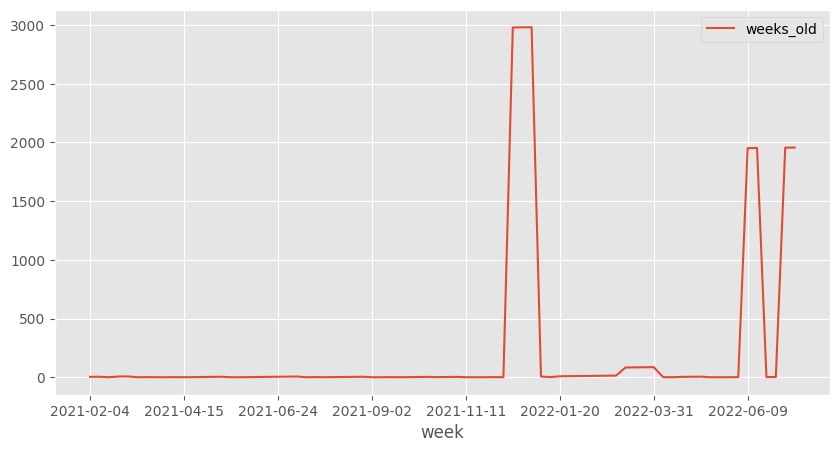

In [154]:
top_us.plot(kind='line', y=['weeks_old'], figsize=(10, 5));
plt.show()

<!-- END QUESTION -->



Since some songs are thousands of weeks old, plotting all the data together makes it hard to tell what the trends are for newer songs. To better see what's going on near 0 on the y-axis, we'll "clip", or chop off, the y-axis so that the oldest songs appear to only be 26 weeks (half a year) old.

We've done this for you. The plot we created is interactive, meaning that you can hover over any point on the line to see various pieces of information for each song. Try hovering over the line plot produced to see which songs were at the top of the charts each week, and how old they were when they got usurped by the next best thing.

<center><h3><a href="https://dsc-courses.github.io/dsc10-2024-sp/resources/midterm_project/q5-age-number-1.html">Access the plot by clicking here.</a></h3></center>

To test your understanding, see if you can answer these questions from the interactive plot:
 1. Why does the line plot shows a bunch of diagonal line segments? 
 - Diagonal lines happen when the age of the song increases linearly while the song remains in the Top 1. This will happen when the same song stays at Rank 1, but it also might happen when the top 1 song changes, but the new one has the same age as the prior. For example, between the week of April 15, 2021 and May 13, 2021, the song changes from RAPSTAR to Kiss Me More, however they were both released on the same day, therefore they are the same age.
 2. Why do some diagonal line segments start at the horizontal axis, and others don't?
 - The ones that start at the horizontal axis do so because the song became top 1 on it's week 0, and the ones that start off of the horizontal axis do so because they are already more than 0 weeks old, and so are the songs that came before them, which leaves the line above the horizontal axis. 
 3. Why does the line plot you made in Question 5.7 have three large spikes, while this one has four?
 - The reason is that when we limit the y-axis to just be 26 week old songs, anything above this line will appear as a spike. However, among the four spikes from the plot above, three are for songs around 2000 weeks old, give or take, while the other one is for a 83 week-old song. Due to the limit in y, all four of them will appear to be the same size, but looking above, we can find the 83 week-old song and see that it's y-value is very far from the rest. 
 4. How many different #1 songs were over 26 weeks old? Why did these songs become super popular? (You may have to do some research.)
 - Looking at the plot, we find out that only three songs over 26 weeks-old ranked #1. This is because the same song appeared twice. The first, "Rockin' Around the Christmas Tree", became very popular in 2021 because the song was turning 65 years old (https://www.npr.org/2023/12/05/1217387261/brenda-lee-rockin-around-the-christmas-tree-billboard-number-one#:~:text=Hourly%20News-,'Rockin'%20Around%20the%20Christmas%20Tree'%20is%20No.,for%20the%20first%20time%20ever.). The last, "Running Up That Hill", became famous due to it's use on the 4th season of Stranger Things, which can be noticed as the song played during two different episodes: the first of which aired around the last days of May, and being near the mid-season, would explain why it took a couple of days to get to #1. The second time was because the last episodes released on the first days of July, which explains it getting to the Top 1 once again a couple of weeks later (https://en.wikipedia.org/wiki/Stranger_Things_season_4#:~:text=were%20released%20online.-,Release,later%20on%20July%201%2C%202022.). For Heat Waves, it appears to have been a mix of endurance and virality, among some other factors, which led the song to reach Top 1 (https://www.billboard.com/music/chart-beat/glass-animals-heat-waves-chart-record-hot-100-1235040223/).

You don't have to turn in your answers to the questions above, but you should figure out how to answer them.

<a id='section6'></a>

## Section 6: Party in the USA 🎉

<small>(<a href="#outline">return to the outline</a>)</small>

We concluded Section 5 by looking at the age of the #1 song each week in the US. Let's continue our analysis of the songs that became extremely popular in the US.

Define a **US megahit** to be a song that has met all of the following criteria **in the US**:
- Has been at position 1 or 2 in the top 200 at some point.
- Spent at least 20 weeks in the top 200.
- Had a streak of at least 5 consecutive weeks of being in the top 10.

In this section, we'll work towards determining which songs fit this criteria, and in the next (and final!) section, we'll see how these songs stand apart from the rest musically.

**Question 6.1.** To start, create a DataFrame called `us_charts` with only one row for each week and each rank. That is, remove duplicate entries for songs with multiple artists. Keep only the `'track_name'`, `'artist_names'`, `'rank'`, and `'week'` columns.

Arrange the rows chronologically by week, and within each week, in ascending order of rank. Don't forget that we're only using data from the US.

*Hint*: `us_charts` should have a multiple of 200 rows, since there are 200 songs on the top 200 each week.

In [155]:
### Get's USA songs

in_usa = charts[charts.get('country') == 'United States']
in_usa

week  rank         track_name  \
48038  2021-02-04     1    drivers license   
48039  2021-02-04     2          Good Days   
48040  2021-02-04     3            Streets   
48041  2021-02-04     4    Save Your Tears   
48042  2021-02-04     5            Whoopty   
...           ...   ...                ...   
70178  2022-07-14   196  Get Into It (Yuh)   
70179  2022-07-14   197         Fancy Like   
70180  2022-07-14   198       Stick Season   
70181  2022-07-14   199   Call Out My Name   
70182  2022-07-14   200          Good Days   

                                        uri release_date   streams  \
48038  spotify:track:7lPN2DXiMsVn7XUKtOW1CS   2021-01-08  13880496   
48039  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   8128775   
48040  spotify:track:60ynsPSSKe6O3sfwRnIBRf   2019-11-07   6814883   
48041  spotify:track:5QO79kh1waicV47BqGRL3g   2020-03-20   5076773   
48042  spotify:track:5vGLcdRuSbUhD8ScwsGSdA   2020-08-20   5004925   
...                                     ...          ...       ...   
70178  spotify:track:0W6I02J9xcqK8MtSeosEXb   2021-06-25   1592100   
70179  spotify:track:58UKC45GPNTflCN6nwCUeF   2022-01-21   1590126   
70180  spotify:track:0GNVXNz7Jkicfk2mp5OyG5   2022-07-08   1583302   
70181  spotify:track:09mEdoA6zrmBPgTEN5qXmN   2018-03-30   1583235   
70182  spotify:track:3YJJjQPAbDT7mGpX3WtQ9A   2020-12-25   1579212   

         artist_names artist_individual  \
48038  Olivia Rodrigo    Olivia Rodrigo   
48039             SZA               SZA   
48040        Doja Cat          Doja Cat   
48041      The Weeknd        The Weeknd   
48042              CJ                CJ   
...               ...               ...   
70178        Doja Cat          Doja Cat   
70179    Walker Hayes      Walker Hayes   
70180      Noah Kahan        Noah Kahan   
70181      The Weeknd        The Weeknd   
70182             SZA               SZA   

                                   artist_id               artist_genre  ...  \
48038  spotify:artist:1McMsnEElThX1knmY4oliG                        pop  ...   
48039  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        pop  ...   
48040  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                        pop  ...   
48041  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ               canadian pop  ...   
48042  spotify:artist:7arQA31aZVS8yS6zUveWzb                    nyc rap  ...   
...                                      ...                        ...  ...   
70178  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5                  dance pop  ...   
70179  spotify:artist:7sKxqpSqbIzphAKAhrqvlf        modern country rock  ...   
70180  spotify:artist:2RQXRUsr4IW1f3mKyKsy4B                        pop  ...   
70181  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  canadian contemporary r&b  ...   
70182  spotify:artist:7tYKF4w9nC0nq9CsPZTHyP                        r&b  ...   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
48038    1    -8.761       0.0601        0.7210          0.000013    0.1050   
48039    0    -8.370       0.0583        0.4990          0.000008    0.6880   
48040    1    -8.433       0.0842        0.2100          0.038200    0.3380   
48041    1    -5.487       0.0309        0.0212          0.000012    0.5430   
48042    0    -7.600       0.1250        0.2000          0.000000    0.1270   
...    ...       ...          ...           ...               ...       ...   
70178    0    -6.029       0.1620        0.3150          0.000034    0.0894   
70179    1    -6.459       0.0600        0.1110          0.000000    0.3150   
70180    1    -6.935       0.0651        0.7990          0.000000    0.0966   
70181    1    -4.954       0.0356        0.1700          0.000000    0.3070   
70182    0    -8.370       0.0583        0.4990          0.000008    0.6880   

       valence    tempo  duration        country  
48038    0.132  143.874    242014  United States  
48039    0.412  121.002    279204  United States  
48040    0.189   90.035    226987  Unit

In [156]:
in_usa.get('rank').max()

200

In [157]:
groupby_week_and_rank = in_usa.groupby(['week', 'rank', 'track_name', 'artist_names']).count()
groupby_week_and_rank

uri  release_date  streams  \
week       rank track_name        artist_names                                 
2021-02-04 1    drivers license   Olivia Rodrigo    1             1        1   
           2    Good Days         SZA               1             1        1   
           3    Streets           Doja Cat          1             1        1   
           4    Save Your Tears   The Weeknd        1             1        1   
           5    Whoopty           CJ                1             1        1   
...                                               ...           ...      ...   
2022-07-14 196  Get Into It (Yuh) Doja Cat          1             1        1   
           197  Fancy Like        Walker Hayes      1             1        1   
           198  Stick Season      Noah Kahan        1             1        1   
           199  Call Out My Name  The Weeknd        1             1        1   
           200  Good Days         SZA               1             1        1   

                                                  artist_individual  \
week       rank track_name        artist_names                        
2021-02-04 1    drivers license   Olivia Rodrigo                  1   
           2    Good Days         SZA                             1   
           3    Streets           Doja Cat                        1   
           4    Save Your Tears   The Weeknd                      1   
           5    Whoopty           CJ                              1   
...                                                             ...   
2022-07-14 196  Get Into It (Yuh) Doja Cat                        1   
           197  Fancy Like        Walker Hayes                    1   
           198  Stick Season      Noah Kahan                      1   
           199  Call Out My Name  The Weeknd                      1   
           200  Good Days         SZA                             1   

                                                  artist_id  artist_genre  \
week       rank track_name        artist_names                              
2021-02-04 1    drivers license   Olivia Rodrigo          1             1   
           2    Good Days         SZA                     1             1   
           3    Streets           Doja Cat                1             1   
           4    Save Your Tears   The Weeknd              1             1   
           5    Whoopty           CJ                      1             1   
...                                                     ...           ...   
2022-07-14 196  Get Into It (Yuh) Doja Cat                1             1   
           197  Fancy Like        Walker Hayes            1             1   
           198  Stick Season      Noah Kahan              1             1   
           199  Call Out My Name  The Weeknd              1             1   
           200  Good Days         SZA                     1             1   

                                                  artist_img  danceability  \
week       rank track_name        artist_names                               
2021-02-04 1    drivers license   Olivia Rodrigo           1             1   
           2    Good Days         SZA                      1             1   
           3    Streets           Doja Cat                 1             1   
           4    Save Your Tears   The Weeknd               1             1   
           5    Whoopty           CJ                       1             1   
...                                                      ...           ...   
2022-07-14 196  Get Into It (Yuh) Doja Cat                 1             1   
           197  Fancy Like        Walker Hayes             1             1   
           198  Stick Season      Noah Kahan               1             1   
           199  Call Out My Name  The Weeknd               1             1   
           200  Good Days         SZA                      1             1   

                                                  energy  key  mode 

In [158]:
us_charts_test = groupby_week_and_rank.reset_index().get(['week', 'rank', 'track_name', 'artist_names'])
us_charts_test

week  rank         track_name    artist_names
0      2021-02-04     1    drivers license  Olivia Rodrigo
1      2021-02-04     2          Good Days             SZA
2      2021-02-04     3            Streets        Doja Cat
3      2021-02-04     4    Save Your Tears      The Weeknd
4      2021-02-04     5            Whoopty              CJ
...           ...   ...                ...             ...
15195  2022-07-14   196  Get Into It (Yuh)        Doja Cat
15196  2022-07-14   197         Fancy Like    Walker Hayes
15197  2022-07-14   198       Stick Season      Noah Kahan
15198  2022-07-14   199   Call Out My Name      The Weeknd
15199  2022-07-14   200          Good Days             SZA

[15200 rows x 4 columns]

In [159]:
counts = len(us_charts_test.get('track_name').unique())
counts

1631

In [160]:
us_charts = us_charts_test
us_charts

week  rank         track_name    artist_names
0      2021-02-04     1    drivers license  Olivia Rodrigo
1      2021-02-04     2          Good Days             SZA
2      2021-02-04     3            Streets        Doja Cat
3      2021-02-04     4    Save Your Tears      The Weeknd
4      2021-02-04     5            Whoopty              CJ
...           ...   ...                ...             ...
15195  2022-07-14   196  Get Into It (Yuh)        Doja Cat
15196  2022-07-14   197         Fancy Like    Walker Hayes
15197  2022-07-14   198       Stick Season      Noah Kahan
15198  2022-07-14   199   Call Out My Name      The Weeknd
15199  2022-07-14   200          Good Days             SZA

[15200 rows x 4 columns]

**Question 6.2.** How many distinct weeks was data collected for? Store your answer as an `int` in the variable `num_weeks`.

In [161]:
num_weeks = len(us_charts.get('week').unique())
num_weeks

76

In [162]:
weeks_between([2021, 2, 4], [2022, 7, 14])+1

76

**Question 6.3.** Rather than have the week listed as a date, we'd like to simply record it as a week number, between 1 and `num_weeks` (inclusive). For instance, since `'2021-02-18'` is the third week for which we have charts data, it is week number 3. 

Add a column called `'week_num'` to `us_charts` that contains the week number for each week.

*Hint*: With the functions [`np.repeat`](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html) and `np.arange`, you can do this in one line of code.

In [163]:
### This gives us an array of each value of week found in the dataframe
np.repeat(us_charts.get('week').unique(), 200)

array(['2021-02-04', '2021-02-04', '2021-02-04', ..., '2022-07-14',
       '2022-07-14', '2022-07-14'], dtype=object)

In [164]:
### This gives us the unique number of weeks
np.arange(1, num_weeks+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76])

In [165]:
### This repeats each value between 1 and 76 200 times
np.repeat(np.arange(1, num_weeks+1), 200)

array([ 1,  1,  1, ..., 76, 76, 76])

In [166]:
us_charts = us_charts.assign(week_num = np.repeat(np.arange(1, num_weeks+1), 200))
us_charts

week  rank         track_name    artist_names  week_num
0      2021-02-04     1    drivers license  Olivia Rodrigo         1
1      2021-02-04     2          Good Days             SZA         1
2      2021-02-04     3            Streets        Doja Cat         1
3      2021-02-04     4    Save Your Tears      The Weeknd         1
4      2021-02-04     5            Whoopty              CJ         1
...           ...   ...                ...             ...       ...
15195  2022-07-14   196  Get Into It (Yuh)        Doja Cat        76
15196  2022-07-14   197         Fancy Like    Walker Hayes        76
15197  2022-07-14   198       Stick Season      Noah Kahan        76
15198  2022-07-14   199   Call Out My Name      The Weeknd        76
15199  2022-07-14   200          Good Days             SZA        76

[15200 rows x 5 columns]

In [167]:
us_charts.get('week_num').iloc[199]

1

In [168]:
us_charts.get('week_num').iloc[200]

2

**Question 6.4.** Our first criteria for a US megahit was that the song has been at position 1 or 2 in the top 200 in the United States at some point. Create an array of the `'track_name'`s of all such songs, without duplicates, and save it as `been_top_two`.

In [169]:
get_top_2 = us_charts[us_charts.get('rank') <= 2]
get_top_2

week  rank                                         track_name  \
0      2021-02-04     1                                    drivers license   
1      2021-02-04     2                                          Good Days   
200    2021-02-11     1                                    drivers license   
201    2021-02-11     2                                    Save Your Tears   
400    2021-02-18     1                                   Calling My Phone   
...           ...   ...                                                ...   
14601  2022-06-30     2  Running Up That Hill (A Deal With God) - 2018 ...   
14800  2022-07-07     1  Running Up That Hill (A Deal With God) - 2018 ...   
14801  2022-07-07     2                                      Glimpse of Us   
15000  2022-07-14     1  Running Up That Hill (A Deal With God) - 2018 ...   
15001  2022-07-14     2                                      Glimpse of Us   

          artist_names  week_num  
0       Olivia Rodrigo         1  
1                  SZA         1  
200     Olivia Rodrigo         2  
201         The Weeknd         2  
400    Lil Tjay, 6LACK         3  
...                ...       ...  
14601        Kate Bush        74  
14800        Kate Bush        75  
14801             Joji        75  
15000        Kate Bush        76  
15001             Joji        76  

[152 rows x 5 columns]

In [170]:
get_top_2.get('track_name').unique()

array(['drivers license', 'Good Days', 'Save Your Tears',
       'Calling My Phone', 'What’s Next',
       'Wants and Needs (feat. Lil Baby)',
       'Peaches (feat. Daniel Caesar & Giveon)', 'As I Am (feat. Khalid)',
       'MONTERO (Call Me By Your Name)', 'RAPSTAR',
       'Kiss Me More (feat. SZA)', 'good 4 u',
       'm y . l i f e (with 21 Savage & Morray)', 'deja vu',
       'STAY (with Justin Bieber)', 'INDUSTRY BABY (feat. Jack Harlow)',
       'Hurricane', 'Girls Want Girls (with Lil Baby)',
       'Way 2 Sexy (with Future & Young Thug)',
       'Knife Talk (with 21 Savage ft. Project Pat)', 'Easy On Me',
       'One Right Now (with The Weeknd)',
       "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)",
       'Smokin Out The Window', 'I Hate U',
       "Rockin' Around The Christmas Tree",
       'All I Want for Christmas Is You', 'Jingle Bell Rock',
       "We Don't Talk About Bruno", 'Heat Waves', 'Sacrifice',
       'pushin P (feat. Young Thug)', 'Supe

In [171]:
len(get_top_2.get('track_name').unique())

42

In [172]:
been_top_two = get_top_2.get('track_name').unique()
been_top_two

array(['drivers license', 'Good Days', 'Save Your Tears',
       'Calling My Phone', 'What’s Next',
       'Wants and Needs (feat. Lil Baby)',
       'Peaches (feat. Daniel Caesar & Giveon)', 'As I Am (feat. Khalid)',
       'MONTERO (Call Me By Your Name)', 'RAPSTAR',
       'Kiss Me More (feat. SZA)', 'good 4 u',
       'm y . l i f e (with 21 Savage & Morray)', 'deja vu',
       'STAY (with Justin Bieber)', 'INDUSTRY BABY (feat. Jack Harlow)',
       'Hurricane', 'Girls Want Girls (with Lil Baby)',
       'Way 2 Sexy (with Future & Young Thug)',
       'Knife Talk (with 21 Savage ft. Project Pat)', 'Easy On Me',
       'One Right Now (with The Weeknd)',
       "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)",
       'Smokin Out The Window', 'I Hate U',
       "Rockin' Around The Christmas Tree",
       'All I Want for Christmas Is You', 'Jingle Bell Rock',
       "We Don't Talk About Bruno", 'Heat Waves', 'Sacrifice',
       'pushin P (feat. Young Thug)', 'Supe

Below, we check that none of the songs in `been_top_two` have the same `'track_name'` but different `'artist_names'` as another song in `us_charts`. 

In [173]:
# You don't need to edit this code, but you should understand how it works.
def diff_artists(track_name):
    '''Return the number of distinct 'artist_names' associated with a given track_name in us_charts.'''
    song_only = us_charts[us_charts.get('track_name') == track_name]
    return song_only.groupby('artist_names').count().shape[0]

num_diff_artists = np.array([])
for song in been_top_two:
    num_diff_artists = np.append(num_diff_artists, diff_artists(song))
max(num_diff_artists)

1.0

Since this set of songs doesn't have the potential for confusion with other songs with the same `'track_name'`, we can safely refer to these songs by their `'track_name'` for the remainder of this section (instead of having to also worry about their `'artist_names'`).

**Question 6.5.** Create a DataFrame called `possibly_mega` with the same columns as `us_charts`, but with only the rows of `us_charts` where the `'track_name'` is in `been_top_two`.

*Hints*: 
- Add a new column to filter by, then drop it after filtering (i.e. after Boolean indexing).
- Use the Python keyword `in` to determine whether a specific song name is in `been_top_two`.

In [174]:
us_charts.get('track_name')

0          drivers license
1                Good Days
2                  Streets
3          Save Your Tears
4                  Whoopty
               ...        
15195    Get Into It (Yuh)
15196           Fancy Like
15197         Stick Season
15198     Call Out My Name
15199            Good Days
Name: track_name, Length: 15200, dtype: object

In [175]:
get_top_2.get('track_name')

0                                          drivers license
1                                                Good Days
200                                        drivers license
201                                        Save Your Tears
400                                       Calling My Phone
                               ...                        
14601    Running Up That Hill (A Deal With God) - 2018 ...
14800    Running Up That Hill (A Deal With God) - 2018 ...
14801                                        Glimpse of Us
15000    Running Up That Hill (A Deal With God) - 2018 ...
15001                                        Glimpse of Us
Name: track_name, Length: 152, dtype: object

In [176]:
us_charts.get('track_name').iloc[0]

'drivers license'

In [177]:
get_top_2.get('track_name').iloc[0]

'drivers license'

In [178]:
us_charts.get('track_name').iloc[0] in been_top_two

True

In [179]:
def is_in_top2(track_name):
    if us_charts.get('track_name') == track_name in been_top_two:
        return True
    else:
        return False

In [180]:
is_in_top2('Good Days')

True

In [181]:
been_top_two

array(['drivers license', 'Good Days', 'Save Your Tears',
       'Calling My Phone', 'What’s Next',
       'Wants and Needs (feat. Lil Baby)',
       'Peaches (feat. Daniel Caesar & Giveon)', 'As I Am (feat. Khalid)',
       'MONTERO (Call Me By Your Name)', 'RAPSTAR',
       'Kiss Me More (feat. SZA)', 'good 4 u',
       'm y . l i f e (with 21 Savage & Morray)', 'deja vu',
       'STAY (with Justin Bieber)', 'INDUSTRY BABY (feat. Jack Harlow)',
       'Hurricane', 'Girls Want Girls (with Lil Baby)',
       'Way 2 Sexy (with Future & Young Thug)',
       'Knife Talk (with 21 Savage ft. Project Pat)', 'Easy On Me',
       'One Right Now (with The Weeknd)',
       "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)",
       'Smokin Out The Window', 'I Hate U',
       "Rockin' Around The Christmas Tree",
       'All I Want for Christmas Is You', 'Jingle Bell Rock',
       "We Don't Talk About Bruno", 'Heat Waves', 'Sacrifice',
       'pushin P (feat. Young Thug)', 'Supe

In [182]:
possibly_mega = us_charts.assign(is_in_top_2 = us_charts.get('track_name').apply(is_in_top2))
possibly_mega = possibly_mega[possibly_mega.get('is_in_top_2') == True].drop(columns = 'is_in_top_2')
possibly_mega

week  rank                       track_name  \
0      2021-02-04     1                  drivers license   
1      2021-02-04     2                        Good Days   
3      2021-02-04     4                  Save Your Tears   
25     2021-02-04    26                       Heat Waves   
200    2021-02-11     1                  drivers license   
...           ...   ...                              ...   
15137  2022-07-14   138                  drivers license   
15151  2022-07-14   152                          RAPSTAR   
15163  2022-07-14   164  One Right Now (with The Weeknd)   
15170  2022-07-14   171                  Save Your Tears   
15199  2022-07-14   200                        Good Days   

                  artist_names  week_num  
0               Olivia Rodrigo         1  
1                          SZA         1  
3                   The Weeknd         1  
25               Glass Animals         1  
200             Olivia Rodrigo         2  
...                        ...       ...  
15137           Olivia Rodrigo        76  
15151                   Polo G        76  
15163  Post Malone, The Weeknd        76  
15170               The Weeknd        76  
15199                      SZA        76  

[1395 rows x 5 columns]

In [183]:
possibly_mega.iloc[0]

week                 2021-02-04
rank                          1
track_name      drivers license
artist_names     Olivia Rodrigo
week_num                      1
Name: 0, dtype: object

In [184]:
drivers_license = possibly_mega[(possibly_mega.get('track_name') == 'drivers license')]
drivers_license

week  rank       track_name    artist_names  week_num
0      2021-02-04     1  drivers license  Olivia Rodrigo         1
200    2021-02-11     1  drivers license  Olivia Rodrigo         2
401    2021-02-18     2  drivers license  Olivia Rodrigo         3
600    2021-02-25     1  drivers license  Olivia Rodrigo         4
800    2021-03-04     1  drivers license  Olivia Rodrigo         5
...           ...   ...              ...             ...       ...
14346  2022-06-16   147  drivers license  Olivia Rodrigo        72
14552  2022-06-23   153  drivers license  Olivia Rodrigo        73
14746  2022-06-30   147  drivers license  Olivia Rodrigo        74
14938  2022-07-07   139  drivers license  Olivia Rodrigo        75
15137  2022-07-14   138  drivers license  Olivia Rodrigo        76

[76 rows x 5 columns]

In [185]:
good_days = possibly_mega[(possibly_mega.get('track_name') == 'Good Days')]
good_days

week  rank track_name artist_names  week_num
1      2021-02-04     2  Good Days          SZA         1
202    2021-02-11     3  Good Days          SZA         2
403    2021-02-18     4  Good Days          SZA         3
603    2021-02-25     4  Good Days          SZA         4
804    2021-03-04     5  Good Days          SZA         5
...           ...   ...        ...          ...       ...
14375  2022-06-16   176  Good Days          SZA        72
14587  2022-06-23   188  Good Days          SZA        73
14783  2022-06-30   184  Good Days          SZA        74
14987  2022-07-07   188  Good Days          SZA        75
15199  2022-07-14   200  Good Days          SZA        76

[71 rows x 5 columns]

**Question 6.6.** Our second criteria for a US megahit was that the song spent at least 20 weeks on the top 200 in the US.

Create a function called `calculate_weeks` that takes as input the `'track_name'` of a song in `possibly_mega` and returns the number of weeks the song spent on the top 200 charts in the US (during the period of data collection). Then `apply` the function to the `possibly_mega` DataFrame and add a column to `possibly_mega` called `'weeks_on_charts'` with this information. 

In [186]:
def calculate_weeks(track_name):
    count_weeks = possibly_mega[(possibly_mega.get('track_name') == track_name)].shape[0]
    return count_weeks

In [187]:
calculate_weeks('drivers license')

76

In [188]:
calculate_weeks('Good Days')

71

In [189]:
possibly_mega = possibly_mega.assign(weeks_on_charts = possibly_mega.get('track_name').apply(calculate_weeks))
possibly_mega

week  rank                       track_name  \
0      2021-02-04     1                  drivers license   
1      2021-02-04     2                        Good Days   
3      2021-02-04     4                  Save Your Tears   
25     2021-02-04    26                       Heat Waves   
200    2021-02-11     1                  drivers license   
...           ...   ...                              ...   
15137  2022-07-14   138                  drivers license   
15151  2022-07-14   152                          RAPSTAR   
15163  2022-07-14   164  One Right Now (with The Weeknd)   
15170  2022-07-14   171                  Save Your Tears   
15199  2022-07-14   200                        Good Days   

                  artist_names  week_num  weeks_on_charts  
0               Olivia Rodrigo         1               76  
1                          SZA         1               71  
3                   The Weeknd         1               74  
25               Glass Animals         1               76  
200             Olivia Rodrigo         2               76  
...                        ...       ...              ...  
15137           Olivia Rodrigo        76               76  
15151                   Polo G        76               66  
15163  Post Malone, The Weeknd        76               36  
15170               The Weeknd        76               74  
15199                      SZA        76               71  

[1395 rows x 6 columns]

Our third criteria for a US megahit was that the song had a streak of at least 5 consecutive weeks of being in the top 10 on the charts in the US.

In order to identify these songs, we'll need to be able to calculate, for a given song, the longest streak of consecutive weeks spent in the top 10. The next few questions will help us get there.

**Question 6.7. ⭐️⭐️** Write a function called `calculate_rank_array` that takes as input the `'track_name'` of a song in `possibly_mega` and returns an array of that song's ranks for each week of data collection. The array should be of length `num_weeks` for every possible input song, regardless of whether the song actually appeared in the top 200 for all weeks. If the song is not on the chart in a given week, substitute 201 for its rank that week.

For example, `'As It Was'` by `'Harry Styles'` first appeared in the top 200 in week 62. As a result, the first 61 elements of `calculate_rank_array('As It Was')` should be 201. In weeks 62 through 65, it was at positions 1, 2, 1, and 1, so those should be the next four elements in `calculate_rank_array('As It Was')`. The full expected output of `calculate_rank_array('As It Was')` is given below.

```py
>>> calculate_rank_array('As It Was')
array([201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201.,   1.,   2.,   1.,   1.,   1.,
         3.,   5.,   1.,   1.,   2.,   3.,   3.,   4.,   3.,   3.])
```

*Hint*: Our solution uses a `for`-loop and the `in` keyword.

In [190]:
num_weeks

76

In [191]:
as_it_was_df = possibly_mega[possibly_mega.get('track_name') == 'As It Was']
as_it_was_df

week  rank track_name  artist_names  week_num  weeks_on_charts
12200  2022-04-07     1  As It Was  Harry Styles        62               15
12401  2022-04-14     2  As It Was  Harry Styles        63               15
12600  2022-04-21     1  As It Was  Harry Styles        64               15
12800  2022-04-28     1  As It Was  Harry Styles        65               15
13000  2022-05-05     1  As It Was  Harry Styles        66               15
...           ...   ...        ...           ...       ...              ...
14202  2022-06-16     3  As It Was  Harry Styles        72               15
14402  2022-06-23     3  As It Was  Harry Styles        73               15
14603  2022-06-30     4  As It Was  Harry Styles        74               15
14802  2022-07-07     3  As It Was  Harry Styles        75               15
15002  2022-07-14     3  As It Was  Harry Styles        76               15

[15 rows x 6 columns]

In [192]:
as_it_was_df.get('week_num').iloc[0]

62

In [193]:
for week in possibly_mega.get('week_num').unique():
    if week in as_it_was_df.get('week_num').unique():
        print(week)

62
63
64
65
66
67
68
69
70
71
72
73
74
75
76


In [194]:
def calculate_rank_array(track_name):
    ranks_array = np.array([])
    song_df = possibly_mega[possibly_mega.get('track_name') == track_name]
    
    for week in possibly_mega.get('week_num').unique():
        if week not in song_df.get('week_num').unique():
            ranks_array = np.append(ranks_array, 201)
        #elif week in song_df.get('week_num').unique():
        else:
            rank = song_df[song_df.get('week_num') == week].get('rank').values[0]
            ranks_array = np.append(ranks_array, rank)
            #break
    return ranks_array

# Test out your function. Feel free to change this input.
calculate_rank_array('As It Was')

array([201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201.,   1.,   2.,   1.,   1.,   1.,
         3.,   5.,   1.,   1.,   2.,   3.,   3.,   4.,   3.,   3.])

In [195]:
calculate_rank_array('drivers license')

array([  1.,   1.,   2.,   1.,   1.,   5.,   3.,   9.,   8.,  11.,  14.,
        14.,  17.,  17.,  17.,  26.,   7.,   8.,  11.,  13.,  16.,  32.,
        22.,  24.,  21.,  25.,  35.,  27.,  28.,  33.,  57.,  66.,  54.,
        55.,  50.,  47.,  51.,  62.,  60.,  61.,  69., 117.,  92.,  66.,
        45.,  69.,  95.,  90.,  51.,  77.,  75.,  81.,  81.,  87., 101.,
        95.,  98.,  96.,  99., 102.,  76.,  45.,  50.,  56.,  69.,  81.,
       114., 128., 127., 135., 145., 147., 153., 147., 139., 138.])

In [196]:
calculate_rank_array('Save Your Tears')

array([  4.,   2.,   5.,   5.,   6.,  11.,  10.,  13.,  12.,  13.,  17.,
        16.,  28.,  39.,  43.,  59.,  69.,  62.,  68.,  88.,  85., 121.,
       106., 106., 115., 117., 129., 114., 113., 138., 162., 175., 181.,
       174., 179., 172., 186., 194., 176., 187., 162., 174., 154., 153.,
       141., 188., 201., 201., 131., 133., 127., 133., 144., 154., 171.,
       168., 131., 111., 113., 110., 117., 104., 103.,  97., 103., 122.,
       161., 170., 164., 171., 180., 183., 187., 176., 169., 171.])

In [197]:
calculate_rank_array('Save Your Tears').sum()

8878.0

**Question 6.8.** Now, write a function called `longest_streak` that takes two inputs:
- `track_name`, the `'track_name'` of a song in `possibly_mega`.
- `n`, an integer between 1 and 200 (inclusive). By setting `n=10` in the parameter list, we make `n` an optional argument with 10 as its default value if omitted.

The function should return the largest number of consecutive weeks for which the given song ranked in the top `n` songs in the US.

For example, `longest_streak('As It Was', 3)` should evaluate to 6 because the song `'As It Was'` had a 6-week streak of being in the top 3 in the US, and no longer streak.

*Note*: We've completed a good chunk of the implementation of `longest_streak` for you. A big part of your job is to understand what the role of each variable is. You only need to add the body of the `for`-loop; our solution only adds 5 lines to what is below.

In [198]:
def longest_streak(track_name, n=10):
    rank_array = calculate_rank_array(track_name)
    longest = 0 
    current = 0 
    ### num is the rank of the track in each week
    for num in rank_array:
        if num <= n:
            current = current + 1
        else:
            longest = max(longest, current)
            current = 0
                  
    return max(longest, current)

# Test out your function. Feel free to change these inputs.
longest_streak('As It Was', 3)

6

In [199]:
longest_streak('drivers license', 200)

76

In [200]:
longest_streak('drivers license', 100)

41

In [201]:
longest_streak('drivers license', 153)

76

In [202]:
longest_streak('drivers license', 152)

72

In [203]:
longest_streak('drivers license', 10)

9

In [204]:
longest_streak('drivers license', 1)

2

**Question 6.9.** Add a column called `'longest_streak_top_ten'` to `possibly_mega` that contains, for each song, the longest number of consecutive weeks that the song spent in the top 10 in the US.

In [205]:
possibly_mega

week  rank                       track_name  \
0      2021-02-04     1                  drivers license   
1      2021-02-04     2                        Good Days   
3      2021-02-04     4                  Save Your Tears   
25     2021-02-04    26                       Heat Waves   
200    2021-02-11     1                  drivers license   
...           ...   ...                              ...   
15137  2022-07-14   138                  drivers license   
15151  2022-07-14   152                          RAPSTAR   
15163  2022-07-14   164  One Right Now (with The Weeknd)   
15170  2022-07-14   171                  Save Your Tears   
15199  2022-07-14   200                        Good Days   

                  artist_names  week_num  weeks_on_charts  
0               Olivia Rodrigo         1               76  
1                          SZA         1               71  
3                   The Weeknd         1               74  
25               Glass Animals         1               76  
200             Olivia Rodrigo         2               76  
...                        ...       ...              ...  
15137           Olivia Rodrigo        76               76  
15151                   Polo G        76               66  
15163  Post Malone, The Weeknd        76               36  
15170               The Weeknd        76               74  
15199                      SZA        76               71  

[1395 rows x 6 columns]

In [206]:
possibly_mega = possibly_mega.assign(longest_streak_top_ten = possibly_mega.get('track_name').apply(longest_streak))
possibly_mega

week  rank                       track_name  \
0      2021-02-04     1                  drivers license   
1      2021-02-04     2                        Good Days   
3      2021-02-04     4                  Save Your Tears   
25     2021-02-04    26                       Heat Waves   
200    2021-02-11     1                  drivers license   
...           ...   ...                              ...   
15137  2022-07-14   138                  drivers license   
15151  2022-07-14   152                          RAPSTAR   
15163  2022-07-14   164  One Right Now (with The Weeknd)   
15170  2022-07-14   171                  Save Your Tears   
15199  2022-07-14   200                        Good Days   

                  artist_names  week_num  weeks_on_charts  \
0               Olivia Rodrigo         1               76   
1                          SZA         1               71   
3                   The Weeknd         1               74   
25               Glass Animals         1               76   
200             Olivia Rodrigo         2               76   
...                        ...       ...              ...   
15137           Olivia Rodrigo        76               76   
15151                   Polo G        76               66   
15163  Post Malone, The Weeknd        76               36   
15170               The Weeknd        76               74   
15199                      SZA        76               71   

       longest_streak_top_ten  
0                           9  
1                           7  
3                           5  
25                         19  
200                         9  
...                       ...  
15137                       9  
15151                       7  
15163                       1  
15170                       5  
15199                       7  

[1395 rows x 7 columns]

It took a lot of preparation, but now we can finally identify the songs that qualify as US megahits! As a reminder, we say a song is a US megahit if it has met all of the following criteria **in the US**:
- Has been at position 1 or 2 in the top 200 at some point.
- Spent at least 20 weeks in the top 200.
- Had a streak of at least 5 consecutive weeks of being in the top 10.

**Question 6.10.** Create a DataFrame called `us_megahits` that is indexed by `'track_name'`, has a single row for each song that qualifies as a US megahit, and has columns `'artist_names'`, `'weeks_on_charts'`, and `'longest_streak_top_ten'`.

In [207]:
unique_tracks = possibly_mega.groupby(['track_name']).min().reset_index()
unique_tracks

track_name        week  rank  \
0                     All I Want for Christmas Is You  2021-11-04     2   
1   All Too Well (10 Minute Version) (Taylor's Ver...  2021-11-18     1   
2                              As I Am (feat. Khalid)  2021-03-25     2   
3                                           As It Was  2022-04-07     1   
4                                    Calling My Phone  2021-02-18     1   
..                                                ...         ...   ...   
37                                            deja vu  2021-04-08     2   
38                                    drivers license  2021-02-04     1   
39                                           good 4 u  2021-05-20     1   
40            m y . l i f e (with 21 Savage & Morray)  2021-05-20     2   
41                        pushin P (feat. Young Thug)  2022-01-13     2   

                  artist_names  week_num  weeks_on_charts  \
0                 Mariah Carey        40                9   
1                 Taylor Swift        42               23   
2        Justin Bieber, Khalid         8                6   
3                 Harry Styles        62               15   
4              Lil Tjay, 6LACK         3               43   
..                         ...       ...              ...   
37              Olivia Rodrigo        10               67   
38              Olivia Rodrigo         1               76   
39              Olivia Rodrigo        16               61   
40  J. Cole, 21 Savage, Morray        16               24   
41   Gunna, Future, Young Thug        50               22   

    longest_streak_top_ten  
0                        5  
1                        3  
2                        1  
3                       15  
4                        9  
..                     ...  
37                       9  
38                       9  
39                      16  
40                       1  
41                      10  

[42 rows x 7 columns]

In [208]:
us_megahits = unique_tracks[((unique_tracks.get('rank')<=2) & 
                             (unique_tracks.get('weeks_on_charts')>=20) & 
                             (unique_tracks.get('longest_streak_top_ten')>=5))].set_index('track_name')
us_megahits = us_megahits.get(['artist_names', 'weeks_on_charts', 'longest_streak_top_ten'])
us_megahits

artist_names  \
track_name                                                                             
Calling My Phone                                                     Lil Tjay, 6LACK   
Easy On Me                                                                     Adele   
Good Days                                                                        SZA   
Heat Waves                                                             Glass Animals   
INDUSTRY BABY (feat. Jack Harlow)                             Lil Nas X, Jack Harlow   
...                                                                              ...   
We Don't Talk About Bruno          Carolina Gaitán - La Gaita, Mauro Castillo, Ad...   
deja vu                                                               Olivia Rodrigo   
drivers license                                                       Olivia Rodrigo   
good 4 u                                                              Olivia Rodrigo   
pushin P (feat. Young Thug)                                Gunna, Future, Young Thug   

                                   weeks_on_charts  longest_streak_top_ten  
track_name                                                                  
Calling My Phone                                43                       9  
Easy On Me                                      35                       8  
Good Days                                       71                       7  
Heat Waves                                      76                      19  
INDUSTRY BABY (feat. Jack Harlow)               51                      15  
...                                            ...                     ...  
We Don't Talk About Bruno                       28                      14  
deja vu                                         67                       9  
drivers license                                 76                       9  
good 4 u                                        61                      16  
pushin P (feat. Young Thug)                     22                      10  

[19 rows x 3 columns]

<a id='section7'></a>
## Section 7: Encore 🔂

<small>(<a href="#outline">return to the outline</a>)</small>

In this final section of the project, we'll analyze some of the audio features of US megahits. There's an issue, though: `us_megahits` doesn't contain any audio features. Fortunately, that information is available in `songs`, as we see below.

In [209]:
songs

track_name  \
0                                        'Til You Can't   
1                                      'Till I Collapse   
2                               (Don't Fear) The Reaper   
3     (Everybody's Waitin' For) The Man With The Bag...   
4     (There's No Place Like) Home for the Holidays ...   
...                                                 ...   
2549                                 you broke me first   
2550                          ¿Por Qué Me Haces Llorar?   
2551                                   ¿Quién Te Crees?   
2552                                            Éxtasis   
2553                                             Índigo   

                                 artist_names  danceability  energy  key  \
0                                Cody Johnson         0.501   0.815  1.0   
1                           Eminem, Nate Dogg         0.548   0.847  1.0   
2                            Blue Öyster Cult         0.333   0.927  9.0   
3                                   Kay Starr         0.739   0.317  0.0   
4                                  Perry Como         0.478   0.341  5.0   
...                                       ...           ...     ...  ...   
2549                               Tate McRae         0.667   0.373  4.0   
2550                             Juan Gabriel         0.647   0.477  0.0   
2551                      MC Davo, Calibre 50         0.747   0.780  9.0   
2552  Millonario & W. Corona, Cartel De Santa         0.937   0.791  0.0   
2553                 Camilo, Evaluna Montaner         0.748   0.779  0.0   

      mode  loudness  speechiness  acousticness  instrumentalness  liveness  \
0      1.0    -4.865       0.0436       0.05130          0.000000    0.1060   
1      1.0    -3.237       0.1860       0.06220          0.000000    0.0816   
2      0.0    -8.550       0.0733       0.00290          0.000208    0.2970   
3      1.0    -8.668       0.0905       0.39100          0.004870    0.2430   
4      1.0   -12.556       0.0511       0.89700          0.000000    0.2580   
...    ...       ...          ...           ...               ...       ...   
2549   1.0    -9.389       0.0500       0.78500          0.000000    0.0906   
2550   1.0    -8.157       0.0342       0.03740          0.000010    0.1270   
2551   0.0    -5.302       0.2160       0.05830          0.000000    0.1640   
2552   1.0    -5.242       0.0871       0.02050          0.000232    0.0433   
2553   1.0    -6.659       0.0342       0.00884          0.000040    0.1130   

      valence    tempo  duration_min tempo_name  
0      0.4600  160.087      3.736883     Vivace  
1      0.1000  171.447      4.963117     Vivace  
2      0.3850  141.466      5.135333    Allegro  
3      0.8060   71.165      2.706217     Adagio  
4      0.4740  143.736      2.931550    Allegro  
...       ...      ...           ...        ...  
2549   0.0823  124.148      2.821100    Allegro  
2550   0.7930  112.041      3.048000   Moderato  
2551   0.5380   82.524      3.091550     Adagio  
2552   0.9740  119.967      4.816883   Moderato  
2553   0.9280  128.910      3.582217    Allegro  

[2554 rows x 15 columns]

**Question 7.1.** Create a DataFrame called `megahits` that contains the same rows and columns as `us_megahits`, plus the additional columns below.
- `'danceability'`
- `'energy'`
- `'key'`
- `'mode'`
- `'loudness'`
- `'speechiness'`
- `'acousticness'`
- `'instrumentalness'`
- `'liveness'`
- `'valence'`
- `'tempo'`
- `'duration_min'`

`megahits`, like `us_megahits`, should be indexed by `'track_name'`.

In [210]:
reset_us_megahits = us_megahits.reset_index()
megahits = reset_us_megahits.merge(songs, on='track_name')
megahits = megahits.assign(artist_names = megahits.get('artist_names_x')).drop(columns=['artist_names_x', 'artist_names_y', 'tempo_name'])
megahits = megahits.set_index('track_name')
megahits = megahits.get(np.append(megahits.columns[-1], megahits.columns[:-1]))
megahits

artist_names  \
track_name                                                                             
Calling My Phone                                                     Lil Tjay, 6LACK   
Easy On Me                                                                     Adele   
Good Days                                                                        SZA   
Heat Waves                                                             Glass Animals   
INDUSTRY BABY (feat. Jack Harlow)                             Lil Nas X, Jack Harlow   
...                                                                              ...   
We Don't Talk About Bruno          Carolina Gaitán - La Gaita, Mauro Castillo, Ad...   
deja vu                                                               Olivia Rodrigo   
drivers license                                                       Olivia Rodrigo   
good 4 u                                                              Olivia Rodrigo   
pushin P (feat. Young Thug)                                Gunna, Future, Young Thug   

                                   weeks_on_charts  longest_streak_top_ten  \
track_name                                                                   
Calling My Phone                                43                       9   
Easy On Me                                      35                       8   
Good Days                                       71                       7   
Heat Waves                                      76                      19   
INDUSTRY BABY (feat. Jack Harlow)               51                      15   
...                                            ...                     ...   
We Don't Talk About Bruno                       28                      14   
deja vu                                         67                       9   
drivers license                                 76                       9   
good 4 u                                        61                      16   
pushin P (feat. Young Thug)                     22                      10   

                                   danceability  energy   key  mode  loudness  \
track_name                                                                      
Calling My Phone                          0.907   0.393   4.0   0.0    -7.636   
Easy On Me                                0.604   0.366   5.0   1.0    -7.519   
Good Days                                 0.436   0.655   1.0   0.0    -8.370   
Heat Waves                                0.761   0.525  11.0   1.0    -6.900   
INDUSTRY BABY (feat. Jack Harlow)         0.741   0.691  10.0   0.0    -7.395   
...                                         ...     ...   ...   ...       ...   
We Don't Talk About Bruno                 0.577   0.450   0.0   0.0    -8.516   
deja vu                                   0.442   0.612   2.0   1.0    -7.222   
drivers license                           0.561   0.431  10.0   1.0    -8.810   
good 4 u                                  0.563   0.664   9.0   1.0    -5.044   
pushin P (feat. Young Thug)               0.773   0.422   1.0   0.0    -4.572   

                                   speechiness  acousticness  \
track_name                                                     
Calling My Phone                        0.0539       0.45100   
Easy On Me                              0.0282       0.57800   
Good Days                               0.0583       0.49900   
Heat Waves                              0.0944       0.44000   
INDUSTRY BABY (feat. Jack Harlow)       0.0672       0.02210   
...                                        ...           ...   
We Don't Talk About Bruno               0.0834       0.35700   
deja vu                                 0.1120       0.58400   
drivers license                         0.0578       0.76800   
good 4 u                                0.1540       0.33500   
pushin P (feat. Young Thug)             0.1870       0.00783   

                         

**Question 7.2. ⭐️⭐️** Create a DataFrame named `megahit_comparison` that is indexed by `'audio_feature'` and contains the values given in the `audio_features` array below. Each row of `megahit_comparison` will therefore correspond to a different audio feature. `megahit_comparison` should have two columns:
- `'every_song_mean'` should contain the mean value of each feature, among all songs in `songs`.
- `'megahit_mean'` should contain the mean value of each feature, among all songs in `megahits`.

*Note*: Your solution should not use the transpose operation (`.T`).

In [211]:
audio_features = np.array(['danceability', 'energy', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo', 'duration_min'])

empty_df_for_comparison = bpd.DataFrame().assign(
    audio_feature = audio_features,
)

def get_mean_songs(audio_features):
    means_array = np.array([])
    for column in audio_features:
        column_mean = songs.loc[:, column].mean()
        means_array = np.append(means_array, column_mean)
    return means_array

def get_mean_megahits(audio_features):
    means_array = np.array([])
    for column in audio_features:
        column_mean = megahits.loc[:, column].mean()
        means_array = np.append(means_array, column_mean)
    return means_array

empty_df_for_comparison

audio_feature
0      danceability
1            energy
2       speechiness
3      acousticness
4  instrumentalness
5          liveness
6           valence
7          loudness
8             tempo
9      duration_min

In [212]:
songs.get(audio_features)

danceability  energy  speechiness  acousticness  instrumentalness  \
0            0.501   0.815       0.0436       0.05130          0.000000   
1            0.548   0.847       0.1860       0.06220          0.000000   
2            0.333   0.927       0.0733       0.00290          0.000208   
3            0.739   0.317       0.0905       0.39100          0.004870   
4            0.478   0.341       0.0511       0.89700          0.000000   
...            ...     ...          ...           ...               ...   
2549         0.667   0.373       0.0500       0.78500          0.000000   
2550         0.647   0.477       0.0342       0.03740          0.000010   
2551         0.747   0.780       0.2160       0.05830          0.000000   
2552         0.937   0.791       0.0871       0.02050          0.000232   
2553         0.748   0.779       0.0342       0.00884          0.000040   

      liveness  valence  loudness    tempo  duration_min  
0       0.1060   0.4600    -4.865  160.087      3.736883  
1       0.0816   0.1000    -3.237  171.447      4.963117  
2       0.2970   0.3850    -8.550  141.466      5.135333  
3       0.2430   0.8060    -8.668   71.165      2.706217  
4       0.2580   0.4740   -12.556  143.736      2.931550  
...        ...      ...       ...      ...           ...  
2549    0.0906   0.0823    -9.389  124.148      2.821100  
2550    0.1270   0.7930    -8.157  112.041      3.048000  
2551    0.1640   0.5380    -5.302   82.524      3.091550  
2552    0.0433   0.9740    -5.242  119.967      4.816883  
2553    0.1130   0.9280    -6.659  128.910      3.582217  

[2554 rows x 10 columns]

In [213]:
songs.get(audio_features).columns

Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo',
       'duration_min'],
      dtype='object')

In [214]:
get_mean_songs(audio_features)

array([ 6.67981597e-01,  6.12003132e-01,  1.17916875e-01,  2.67515965e-01,
        1.20491562e-02,  1.79256676e-01,  5.20207009e-01, -6.73840603e+00,
        1.21889499e+02,  3.36479807e+00])

In [215]:
songs_mean_df = bpd.DataFrame().assign(audio_feature = songs.get(audio_features).columns)


songs_mean_df = songs_mean_df.assign(
    every_song_mean = get_mean_songs(audio_features),
)

songs_mean_df

audio_feature  every_song_mean
0      danceability         0.667982
1            energy         0.612003
2       speechiness         0.117917
3      acousticness         0.267516
4  instrumentalness         0.012049
5          liveness         0.179257
6           valence         0.520207
7          loudness        -6.738406
8             tempo       121.889499
9      duration_min         3.364798

In [216]:
megahits.get(audio_features)

danceability  energy  speechiness  \
track_name                                                             
Calling My Phone                          0.907   0.393       0.0539   
Easy On Me                                0.604   0.366       0.0282   
Good Days                                 0.436   0.655       0.0583   
Heat Waves                                0.761   0.525       0.0944   
INDUSTRY BABY (feat. Jack Harlow)         0.741   0.691       0.0672   
...                                         ...     ...          ...   
We Don't Talk About Bruno                 0.577   0.450       0.0834   
deja vu                                   0.442   0.612       0.1120   
drivers license                           0.561   0.431       0.0578   
good 4 u                                  0.563   0.664       0.1540   
pushin P (feat. Young Thug)               0.773   0.422       0.1870   

                                   acousticness  instrumentalness  liveness  \
track_name                                                                    
Calling My Phone                        0.45100          0.000001    0.1350   
Easy On Me                              0.57800          0.000000    0.1330   
Good Days                               0.49900          0.000008    0.6880   
Heat Waves                              0.44000          0.000007    0.0921   
INDUSTRY BABY (feat. Jack Harlow)       0.02210          0.000000    0.0476   
...                                         ...               ...       ...   
We Don't Talk About Bruno               0.35700          0.000000    0.1110   
deja vu                                 0.58400          0.000006    0.3700   
drivers license                         0.76800          0.000014    0.1060   
good 4 u                                0.33500          0.000000    0.0849   
pushin P (feat. Young Thug)             0.00783          0.006930    0.1290   

                                   valence  loudness    tempo  duration_min  
track_name                                                                   
Calling My Phone                     0.202    -7.636  104.949      3.424300  
Easy On Me                           0.130    -7.519  141.981      3.744917  
Good Days                            0.412    -8.370  121.002      4.653400  
Heat Waves                           0.531    -6.900   80.870      3.980083  
INDUSTRY BABY (feat. Jack Harlow)    0.892    -7.395  150.087      3.539217  
...                                    ...       ...      ...           ...  
We Don't Talk About Bruno            0.830    -8.516  205.863      3.602000  
deja vu                              0.178    -7.222  180.917      3.591783  
drivers license                      0.137    -8.810  143.875      4.033550  
good 4 u                             0.688    -5.044  166.928      2.969117  
pushin P (feat. Young Thug)          0.488    -4.572   77.502      2.271117  

[19 rows x 10 columns]

In [217]:
get_mean_megahits(audio_features)

array([ 6.80842105e-01,  5.61789474e-01,  1.15463158e-01,  2.86905211e-01,
        3.72218421e-04,  2.30526316e-01,  4.52210526e-01, -6.75968421e+00,
        1.30403211e+02,  3.43640351e+00])

In [218]:
megahits_mean_df = bpd.DataFrame().assign(audio_feature = megahits.get(audio_features).columns)


megahits_mean_df = megahits_mean_df.assign(
    megahit_mean = get_mean_megahits(audio_features),
)

megahits_mean_df

audio_feature  megahit_mean
0      danceability      0.680842
1            energy      0.561789
2       speechiness      0.115463
3      acousticness      0.286905
4  instrumentalness      0.000372
5          liveness      0.230526
6           valence      0.452211
7          loudness     -6.759684
8             tempo    130.403211
9      duration_min      3.436404

In [219]:
megahit_comparison = empty_df_for_comparison.merge(songs_mean_df, on='audio_feature')
megahit_comparison = megahit_comparison.merge(megahits_mean_df, on='audio_feature')
megahit_comparison = megahit_comparison.set_index('audio_feature')
megahit_comparison

every_song_mean  megahit_mean
audio_feature                                  
danceability             0.667982      0.680842
energy                   0.612003      0.561789
speechiness              0.117917      0.115463
acousticness             0.267516      0.286905
instrumentalness         0.012049      0.000372
liveness                 0.179257      0.230526
valence                  0.520207      0.452211
loudness                -6.738406     -6.759684
tempo                  121.889499    130.403211
duration_min             3.364798      3.436404

**Question 7.3.** Finally, draw a horizontal bar chart showing the differences between megahits and all songs in each of the **first 7 features** in `audio_features`. These are the audio features that are measured on a 0 to 1 scale. As with the bar charts you made in Section 4, arrange the bars so that the top bar represents the audio feature which most distinguishes megahits from the rest of the songs on the top 200 charts. Make sure to give your plot an appropriate title.

*Hint*: Adapt the code you wrote in the `word_analysis` function.

In [220]:
megahit_comparison.iloc[:7]

every_song_mean  megahit_mean
audio_feature                                  
danceability             0.667982      0.680842
energy                   0.612003      0.561789
speechiness              0.117917      0.115463
acousticness             0.267516      0.286905
instrumentalness         0.012049      0.000372
liveness                 0.179257      0.230526
valence                  0.520207      0.452211

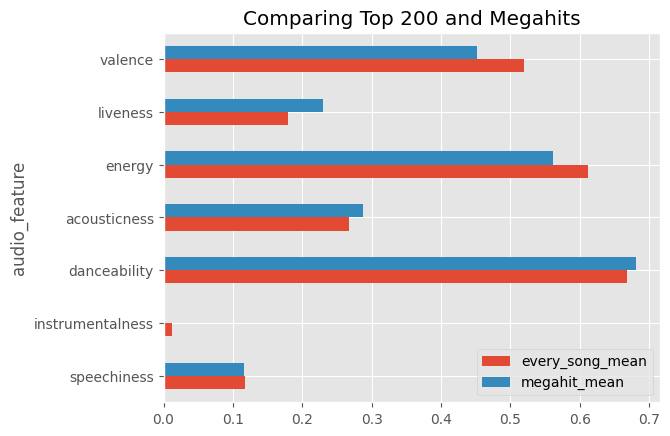

every_song_mean  megahit_mean   AbsDiff
audio_feature                                            
speechiness              0.117917      0.115463  0.002454
instrumentalness         0.012049      0.000372  0.011677
danceability             0.667982      0.680842  0.012861
acousticness             0.267516      0.286905  0.019389
energy                   0.612003      0.561789  0.050214
liveness                 0.179257      0.230526  0.051270
valence                  0.520207      0.452211  0.067996

In [221]:
def megahit_analysis(draw_plot=False):
    first_seven = megahit_comparison.iloc[:7]
    first_seven = first_seven.assign(AbsDiff = (first_seven.get('every_song_mean') - first_seven.get('megahit_mean')).abs())
    first_seven = first_seven.sort_values(by='AbsDiff')

    
    if draw_plot==True:
        first_seven.get(['every_song_mean', 'megahit_mean']).plot(kind='barh', title="Comparing Top 200 and Megahits");
        plt.show()
    
    return first_seven 

# Test out your function. Feel free to change these inputs.
megahit_analysis(True) 

### **Congratulations! 🎉 You've completed the Midterm Project!**